# GEOL0022 Coding Assignment
### Table of contents
1. Part 1: The zero-dimensional Energy Balance Model
2. Part 2: Analysing ERA5 flux data
3. Part 3: Ice Tethered Profilers & Argo floats
4. Part 6: Shallow Water Waves
5. Part 7: Stommel's Model

# 1. The zero-dimensional Energy Balance Model

1.a) Make sure you are able to run the jupyter notebook zero-dim-ebm.ipynb and copy into your assignment the parts that are relevant. 

1.b) Plot your analytical solution to the linearized energy balance model presented above against the numerical solution presented by Brian Rose. 

### 1.1 Simple greenhouse model

As discussed in class, **OLR** or Outgoing Longwave Radiation to space can be defined as:

$$ \text{OLR} = \tau \sigma T_s^4 $$

where $\tau$ is the **transmissivity** of the atmosphere, a number less than 1 that represents the greenhouse effect of Earth's atmosphere.

I used the OLR value from High Resolution Infrared Radiation Sounder (HIRS) from NCAR, which gave me a transmissivity value of $ \tau \approx 0.61$. 

More precisely:

In [1]:
OLRobserved = 238  # W/m2, data from HIRS OLR
sigma = 5.67E-8  # Stefan-Boltzmann constant
Tsobserved = 288  # global average surface temperature
tau = OLRobserved / sigma / Tsobserved**4  # solve for value of transmissivity
print(tau)

0.6101322020283061


In [2]:
#  define a reusable function of OLR
def OLR(Ts,tau):
    return Ts**4*tau*sigma

OLR_test = OLR(Tsobserved,tau)
print(OLR_test)

238.0


#### Global mean insolation

In the original code, they took the area-averaged incoming solar radiation or **insolation** from observations, at 341.3 W m$^{-2}$.
Gillian decided to go with an estimate of 341.75 W m$^{-2}$. <span style="color:green">Ha ha! You speak of yourself in the third person</span>



Let's denote this quantity by $Q$.

In [3]:
Q = 341.75  # insolation

#### Planetary albedo

Some of the incoming radiation is not absorbed at all but simply reflected back to space, denoted as $F_{reflected}$

From observations we have:

#### Planetary albedo

Some of the incoming radiation is not absorbed at all but simply reflected back to space, denoted as $F_{reflected}$

From observations we have:

In [6]:
Freflected = 101.9  #  reflected shortwave flux in W/m2

The **planetary albedo** is the fraction of $Q$ that is reflected.

We will denote the planetary albedo by $\alpha$.

From the observations:

In [7]:
alpha = Freflected / Q
print(alpha)

0.2981711777615216


This means that approximately 30% of  incoming radiation is reflected back to space.

#### Absorbed Shortwave Radiation

The **Absorbed Shortwave Radiation** or ASR is the part of the incoming sunlight that is *not* reflected back to space, i.e. that part that is absorbed somewhere within the Earth system.

Mathematically, it is defined as:

$$ \text{ASR} = Q - F_{reflected} = (1-\alpha) Q $$

From observations:

In [8]:
ASRobserved = Q - Freflected
print(ASRobserved)

239.85


This number is *just slightly greater* than the observed OLR of 238 W m$^{-2}$. 

This discrepancy could be attributed to precision error in measuring solar radiation and reflected shortwave flux (thus, underestimating the albedo slightly). I ran the code with various values of Freflected and found that to return a value closer to the observed OLR, Freflected would be closer to $\approx$ 103.8 W m$^{-2}$, returning an albedo of $\approx$ 0.30373

In [9]:
#  define a reusable function!
def ASR(alpha,Q):
    return (1-alpha)*Q

ASR_test = ASR(alpha,Q)
print(ASR_test)

239.85


### 1.2 Equilibrium Temperature

**Equilibrium temperature** as $T_{eq}$:

$$ T_{eq} = \left( \frac{(1-\alpha) Q}{\tau \sigma} \right)^\frac{1}{4} $$

Using the observed values above, we can compute:

In [10]:
#  define a reusable function
def equilibrium_temperature(alpha,Q,tau):
    return ((1-alpha)*Q/(tau*sigma))**(1/4)

Teq_observed = equilibrium_temperature(alpha,Q,tau)
print(Teq_observed)

288.5580398502649


This equilibrium temperature is *just slightly warmer* than 288 K.
While the equilibrium temperature is the temperature required to maintain this balance, the real observed values may differ due to error. For example, the values we used to compute ASR and OLR previously are based on observational data and estimates, and thus may not be precise or accurate enough. These values would thus affect the values of $\tau$ and $\alpha$. For example, I used HIRS data for OLR, but these values differ from other observations such as CERES OLR (value is closer to 238.5).

<span style="color:green">good</span>

In [11]:
Teq_new = equilibrium_temperature(0.32,Q,0.57)
#  an example of formatted print output, limiting to two or one decimal places
print('The new equilibrium temperature is {:.2f} K.'.format(Teq_new))
print('The equilibrium temperature increased by about {:.1f} K.'.format(Teq_new-Teq_observed))

The new equilibrium temperature is 291.20 K.
The equilibrium temperature increased by about 2.6 K.


### 1.3 Plotting Analytical Solution with Numerical Solution
First let's define some constants:

In [12]:
c_w = 4E3  #  Specific heat of water in J/kg/K
rho_w = 1E3  #  Density of water in kg/m3
H = 100.   #  Depth of water in m
C = c_w * rho_w * H   #  Heat capacity of the model 
print('The effective heat capacity is {:.1e} J/m2/K'.format(C))

The effective heat capacity is 4.0e+08 J/m2/K


#### Numerical Solution
Here, I have copied the code for the numerical solution from the zero-dim-ebm.ipynb file. We will use a timestep of 1 year.

In [13]:
dt = 60. * 60. * 24. * 365.   # one year expressed in seconds

def step_forward(T):
    return T + dt / C * ( ASR(0.32,Q) - OLR(T,0.57) )

In [14]:
import numpy as np

numsteps = 20
Tsteps = np.zeros(numsteps+1)
Years = np.zeros(numsteps+1)
Tsteps[0] = 288. 
for n in range(numsteps):
    Years[n+1] = n+1
    Tsteps[n+1] = step_forward( Tsteps[n] )
print(Tsteps)

[288.         288.7919277  289.39024958 289.84123712 290.18056512
 290.43553492 290.62692324 290.77047517 290.87808504 290.95871699
 291.01911477 291.06434502 291.09821054 291.1235634  291.14254146
 291.15674652 291.16737839 291.17533554 291.18129067 291.18574739
 291.18908265]


#### Analytical Solution

In [15]:
Tana=((Tsobserved-Teq_new)*np.exp((-4*tau*sigma*(Teq_new**3)*20*dt/C)))+Teq_new
print(Tana)

291.1843751652847


In [16]:
import numpy as np

numsteps = 20
Years = np.zeros(numsteps+1)
anaTs = np.zeros(numsteps+1)
anaTs[0] = 288. 
for n in range(numsteps):
    Years[n+1] = n+1
    anaTs[n+1] =(Tsobserved-Teq_new)*np.exp((-4*tau*sigma*(Teq_new**3)*(n+1)*dt/C))+Teq_new
print(anaTs)

[288.         288.75546177 289.33251705 289.77329753 290.10998525
 290.3671623  290.56360556 290.71365766 290.82827412 290.91582327
 290.9826972  291.03377848 291.07279663 291.10260043 291.1253659
 291.14275518 291.15603788 291.1661838  291.1739337  291.17985342
 291.18437517]


In [17]:
# a special instruction for the Jupyter notebook
#   Display all plots inline in the notebook
%matplotlib inline  
#  import the plotting package
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Figure 1: Numerical solution and Analytical solution')

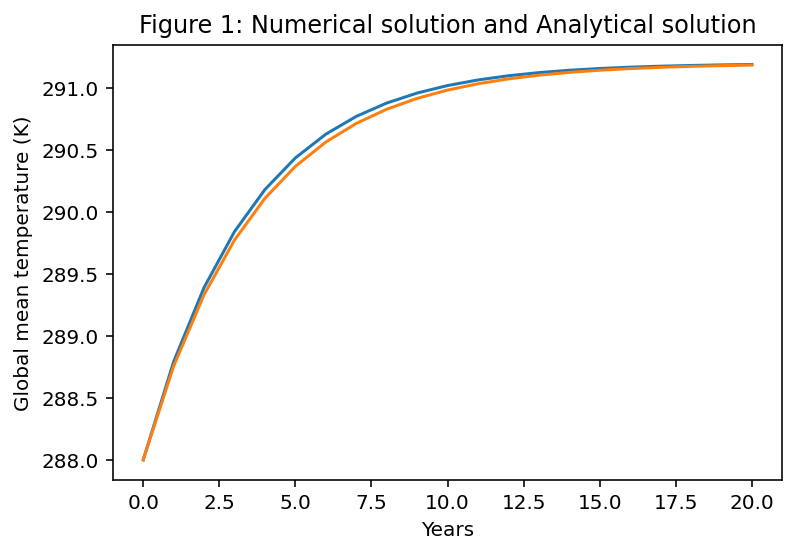

In [18]:
plt.plot(Years, Tsteps, Years, anaTs)
plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)');
plt.title('Figure 1: Numerical solution and Analytical solution')

As seen in the graph above, the analytical and numerical solutions are nearly identical. If you look closely, you will find that the graphs begin at the same value, deviate slightly, but converge again. 
This is because while the analytical solution is the exact solution, the numerical solution calculates the value for each next step and are therefore, approximate.

<span style="color:green">Code is compiling well. Good discussion of main results. Score = 3/3</span>

# 2. Analysing ERA5 flux data
In this chapter, I accomplish the following:

•	Plots as a function of latitude

•	Plots for different seasons

•	Plots over ocean only (land-sea mask)

•	Calculate area weighted averages 

•	Try different cartopy projections

In [4]:
from netCDF4 import Dataset as netcdf 
from scipy import signal
#import cdsapi
from pylab import *
import os
import matplotlib.pyplot as plt
import datetime
import scipy.stats as stats
import cftime
from cftime import utime
import zipfile




import warnings
import pandas as pd
import statsmodels.api as sm
warnings.simplefilter('ignore')
import matplotlib.dates as mdateschan
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import matplotlib.ticker as ticker
from matplotlib.pylab import rcParams
import matplotlib.dates as mdates
import cartopy.feature as cfeature
import zipfile
import xarray as xr

In [18]:
! ls ../Assignment_20210131/data

Fluxes_1979.nc	Fluxes_2019.nc	land_mask.nc


In [19]:
! pwd

/home/user/Assignment_20210131


In [5]:
# Load data into xarray
import xarray as xr
ds_2019 = xr.open_dataset('../../user/Assignment_20210131/data/Fluxes_2019.nc')
ds_1979 = xr.open_dataset('../../user/Assignment_20210131/data/Fluxes_1979.nc')
mask_2019 = xr.open_dataset('../../user/Assignment_20210131/data/land_mask.nc')
print(ds_2019)

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2019-12-01
Data variables:
    cdir       (time, latitude, longitude) float32 ...
    uvb        (time, latitude, longitude) float32 ...
    flsr       (time, latitude, longitude) float32 ...
    ishf       (time, latitude, longitude) float32 ...
    alnid      (time, latitude, longitude) float32 ...
    alnip      (time, latitude, longitude) float32 ...
    slhf       (time, latitude, longitude) float32 ...
    ssr        (time, latitude, longitude) float32 ...
    ssrc       (time, latitude, longitude) float32 ...
    str        (time, latitude, longitude) float32 ...
    strc       (time, latitude, longitude) float32 ...
    sshf       (time, latitude, longitude) float32 ...
  

In [6]:
#lons lats on a grid
[lons, lats] = meshgrid(ds_2019.longitude, ds_2019.latitude)

In [7]:
biasContDist=10
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-2*iMinMax,+0.0001,biasContDist)
print(clevsTD)

[-130. -120. -110. -100.  -90.  -80.  -70.  -60.  -50.  -40.  -30.  -20.
  -10.    0.]


## 2.1.1 Surface sensible heat flux (sshf) for July 2019

For this part of the coding practical, I decided to focus on the heat fluxes during boreal summer in July. 

In [5]:
import numpy as np
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import cartopy as cart

biasContDist=10
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-2*iMinMax,+0.0001,biasContDist)

plt.clf()
year_str='2019'
month_str='07'

field_test=(ds_2019.sshf).sel(time=year_str+'-'+month_str+'-07', method='nearest')


<Figure size 864x504 with 0 Axes>

Text(0.5, 1.0, 'Mercator Projection: Surface Sensible Heat Flux in July 2019 (W/m^2) ')

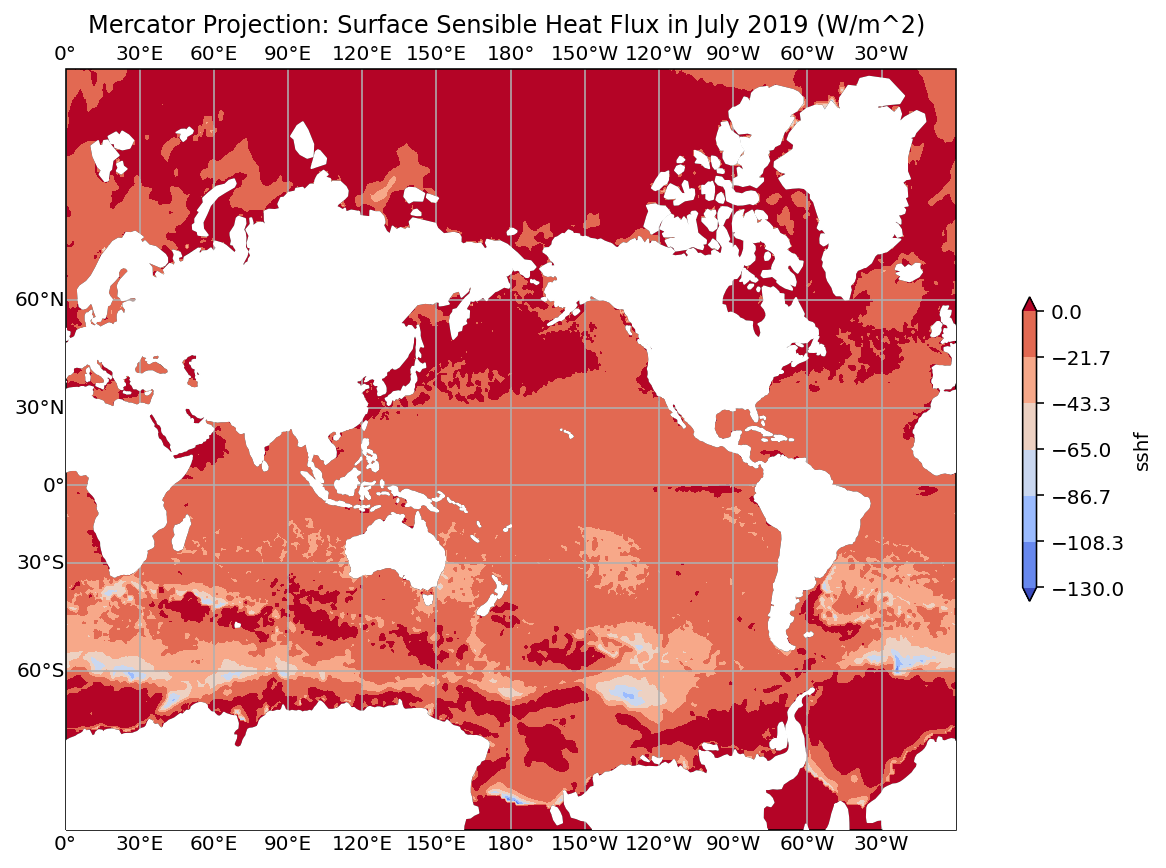

In [6]:
plt.figure()
ax = plt.axes(projection=ccrs.Mercator(central_longitude=180))
ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='k', color='white')
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-130, vmax=0, cbar_kwargs={'shrink': 0.4})

ax.set_title('Mercator Projection: Surface Sensible Heat Flux in July 2019 (W/m^2) ')

In [25]:
# t2m_test = ds.t2m.sel(time='1979-01-01', method='nearest')
# t2m_test = ds.t2m.sel(time='1979-01-01', method='nearest')
# field_test=(ds_2019.sshf).sel(time=year_str+'-'+month_str+'-01', method='nearest')
# field_test=ds_2019.slhf.mean(dim='time') #yearly average
# field_test=((ds_2019.sshf)/(31.*24.*3600.)).sel(time=year_str+'-'+month_str+'-01', method='nearest')

Text(0.5, 1.0, 'Orthographic Projection: Surface Sensible Heat Flux in July 2019 (W/m^2) ')

<Figure size 432x288 with 0 Axes>

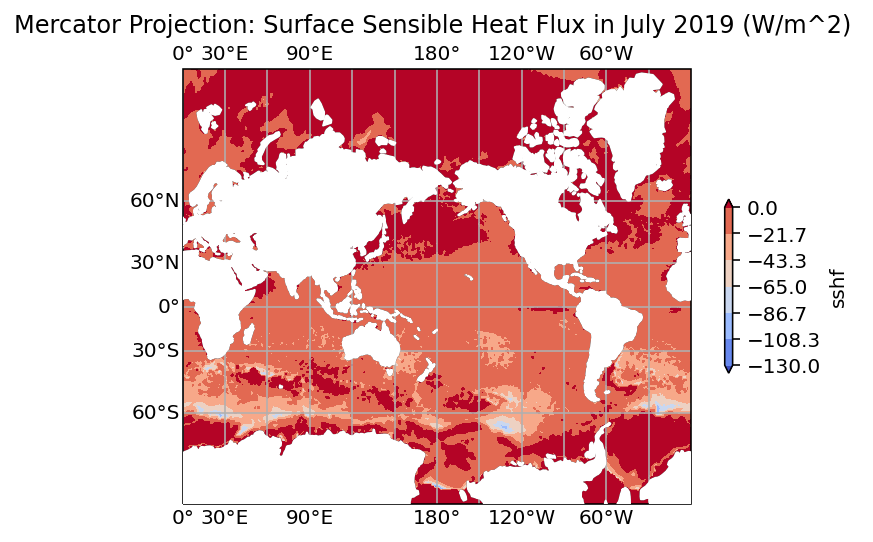

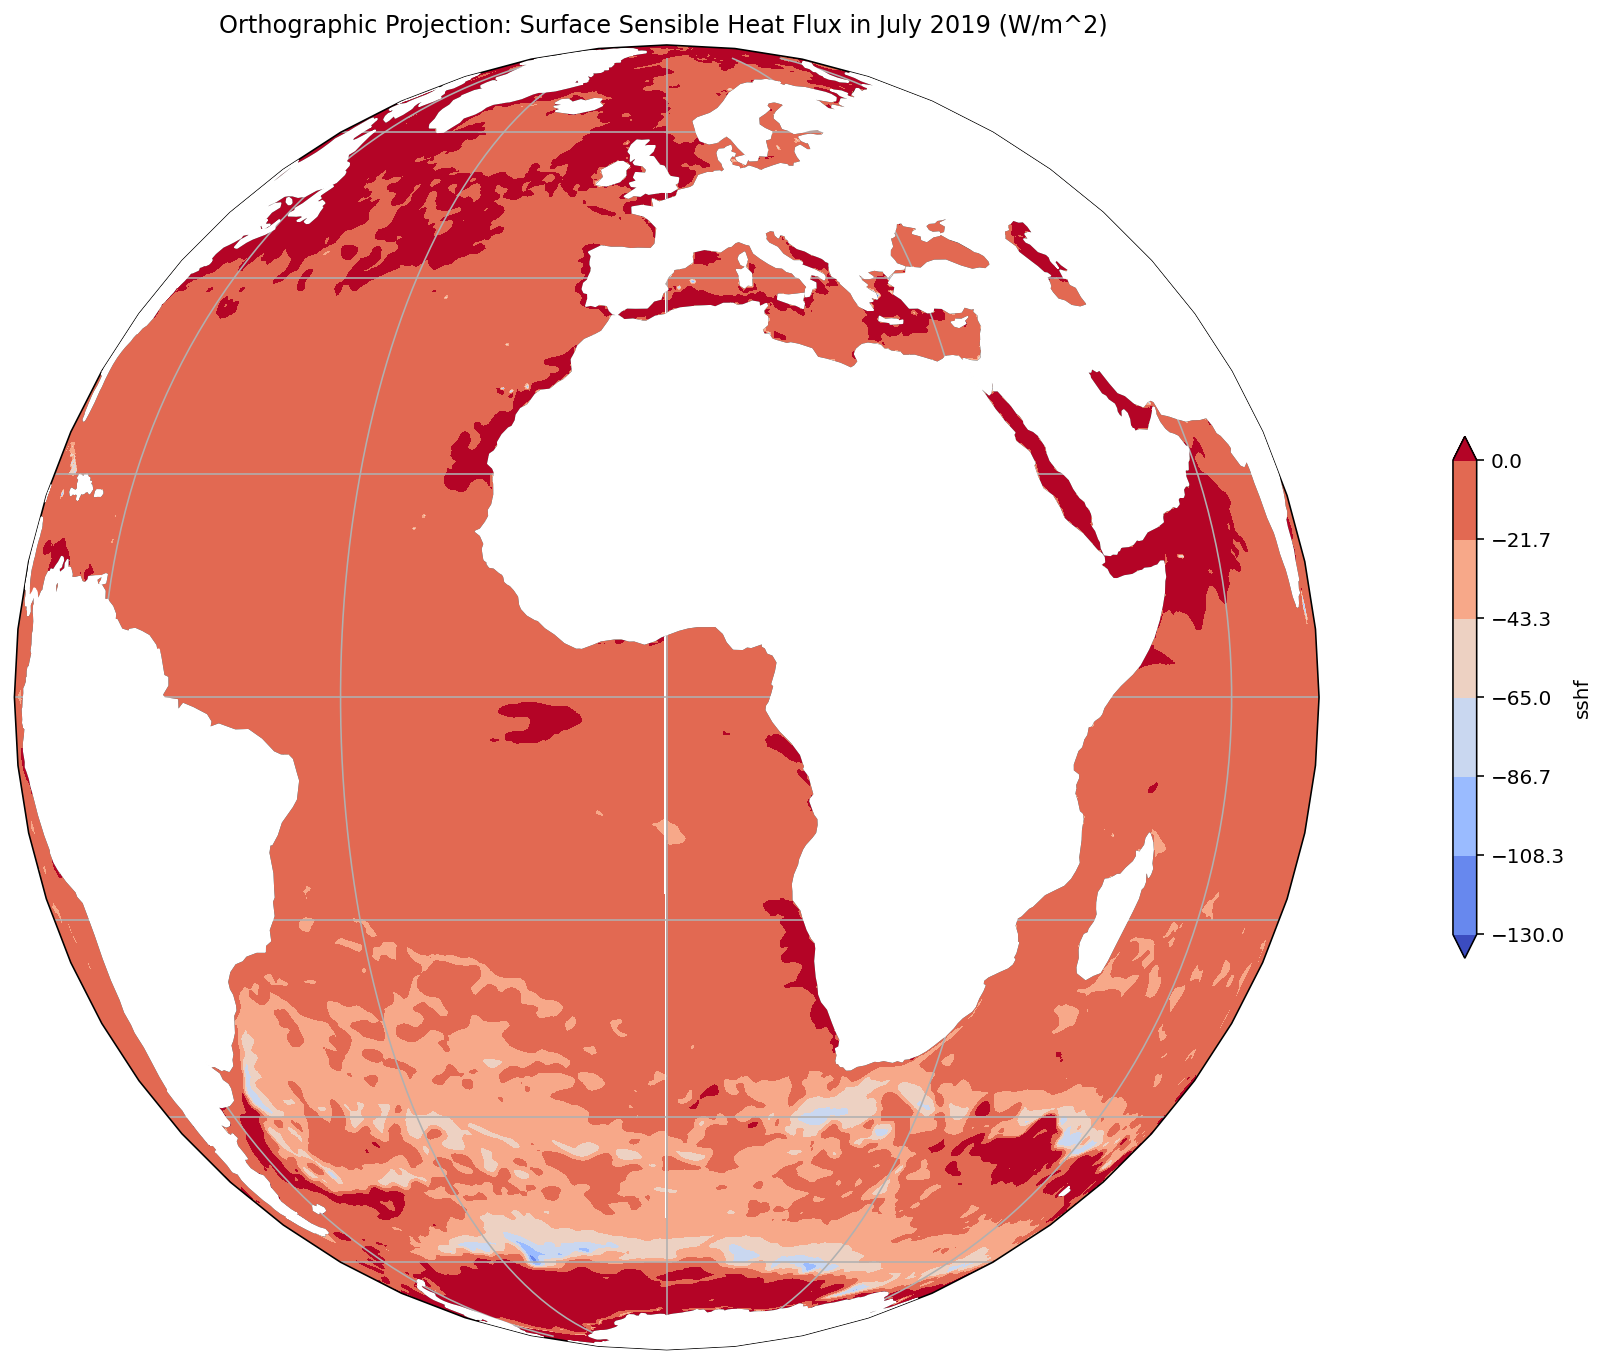

In [26]:
#plot data on other projections 
#https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

import numpy as np
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import cartopy as cart

biasContDist=10
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-2*iMinMax,+0.0001,biasContDist)

plt.clf()
year_str='2019'
month_str='07'

field_test=(ds_2019.sshf).sel(time=year_str+'-'+month_str+'-07', method='nearest')

plt.figure()
ax = plt.axes(projection=ccrs.Mercator(central_longitude=180))
ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='k', color='white')
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-130, vmax=0, cbar_kwargs={'shrink': 0.4})

ax.set_title('Mercator Projection: Surface Sensible Heat Flux in July 2019 (W/m^2) ')

fig = plt.figure(figsize=(24,12))
ax = plt.axes(projection=ccrs.Orthographic())
ax.coastlines()
ax.gridlines()
ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='k', color='white')
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-130, vmax=0, cbar_kwargs={'shrink': 0.4})

ax.set_title('Orthographic Projection: Surface Sensible Heat Flux in July 2019 (W/m^2) ')

## SEA - Regional look on sshf

I decided to take a regional look on the region I call home - Southeast Asia (SEA).

Text(0.5, 1.0, 'Mercator Projection: Surface Sensible Heat Flux in July 2019 (W/m^2) in Southeast Asia ')

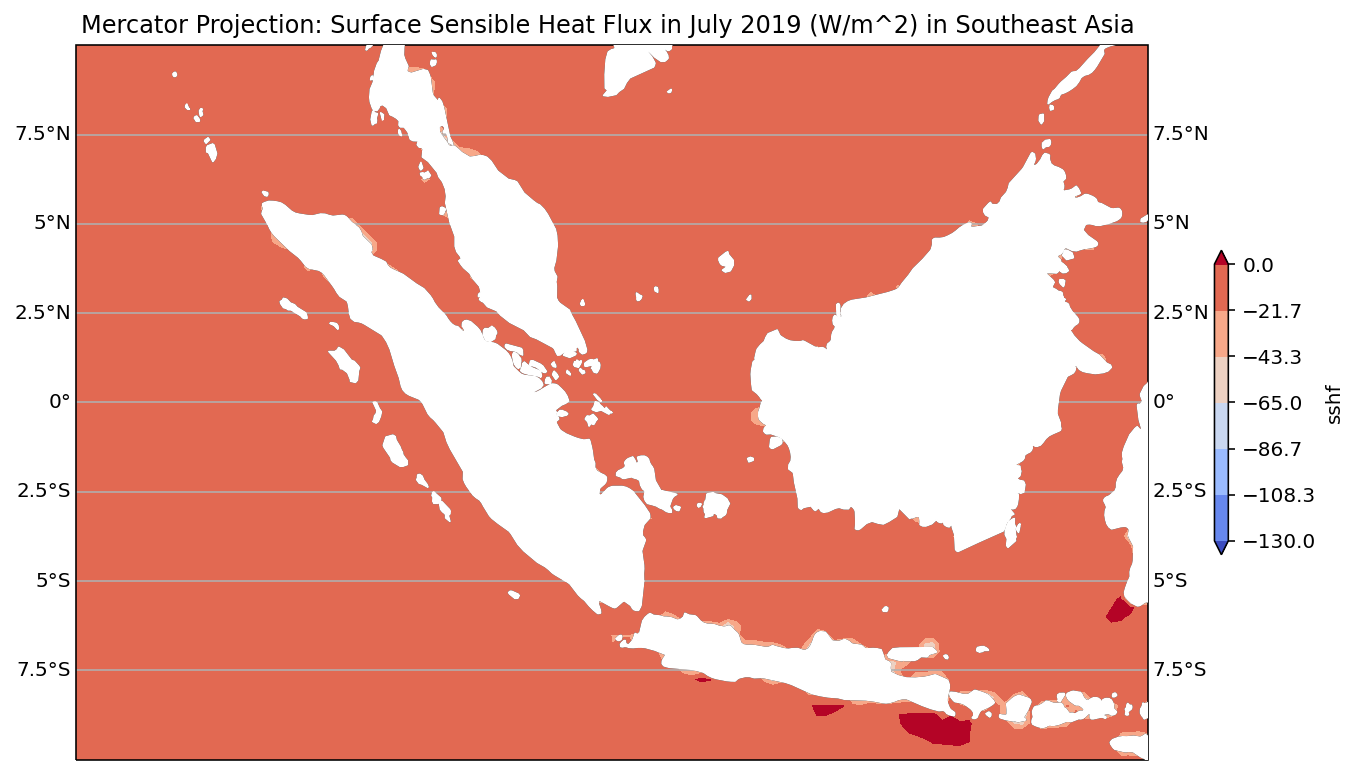

In [7]:
import numpy as np
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import cartopy as cart

biasContDist=10
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-2*iMinMax,+0.0001,biasContDist)

plt.clf()
year_str='2019'
month_str='07'

field_test=(ds_2019.sshf).sel(time=year_str+'-'+month_str+'-07', method='nearest')

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.set_extent([90,120,10,-10])
ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='k', color='white')
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-130, vmax=0, cbar_kwargs={'shrink': 0.4})

ax.set_title('Mercator Projection: Surface Sensible Heat Flux in July 2019 (W/m^2) in Southeast Asia ')

In [9]:
<span style="color:green">Would have been nice to change the  levels in the colourbar to show the patterns </span>

SyntaxError: invalid syntax (<ipython-input-9-e8da98af2ed5>, line 1)

## 2.1.2 Surface Latent Heat Flux (slhf) for July 2019

Text(0.5, 1.0, 'Mercator Projection: Surface Latent Heat Flux in July 2019 (W/m^2) ')

<Figure size 432x288 with 0 Axes>

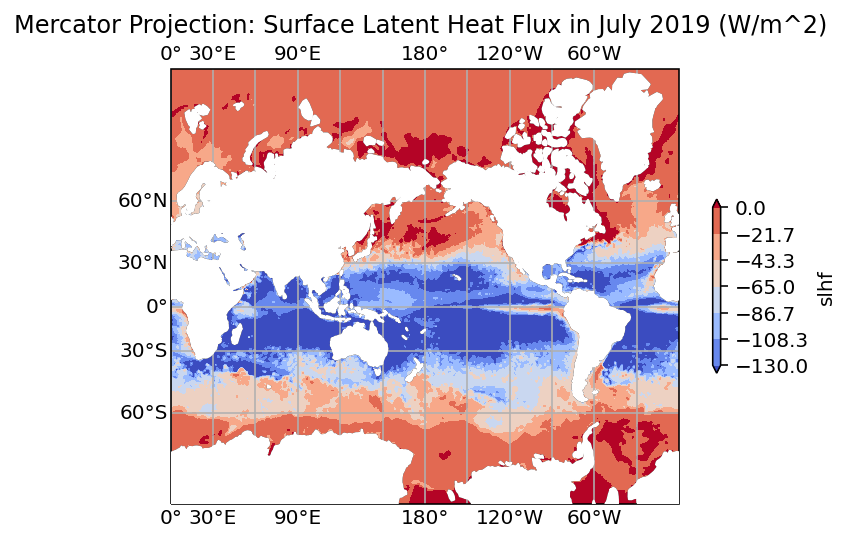

In [28]:
#plot data on other projections 
#https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
biasContDist=10
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-2*iMinMax,+0.0001,biasContDist)

plt.clf()
year_str='2019'
month_str='07'

field_test=(ds_2019.slhf).sel(time=year_str+'-'+month_str+'-07', method='nearest')
# t2m_test = ds.t2m.sel(time='1979-01-01', method='nearest')
# field_test=ds_2019.slhf.mean(dim='time') #yearly average

plt.figure()
ax = plt.axes(projection=ccrs.Mercator(central_longitude=180))
ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='k', color='white')
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-130, vmax=0, cbar_kwargs={'shrink': 0.4})

ax.set_title('Mercator Projection: Surface Latent Heat Flux in July 2019 (W/m^2) ')

## SEA - Regional look on slhf

Text(0.5, 1.0, 'Mercator Projection: Surface Latent Heat Flux in July 2019 (W/m^2) in Southeast Asia ')

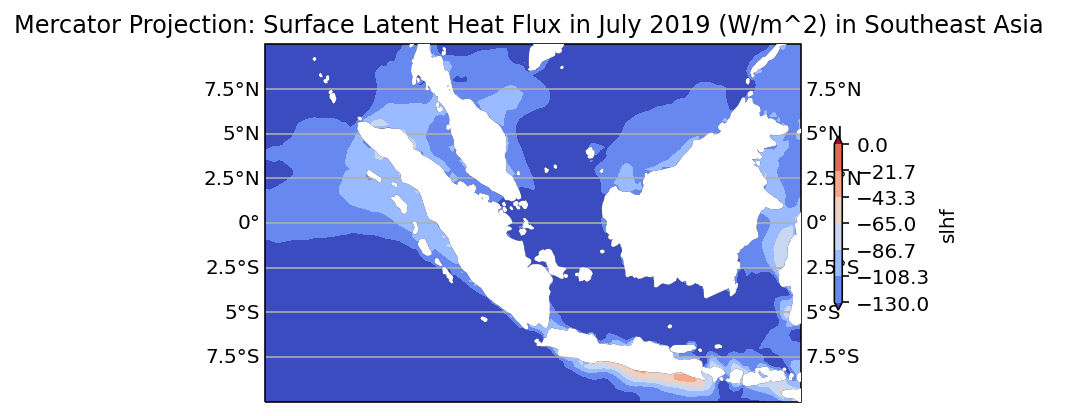

In [29]:
biasContDist=10
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-2*iMinMax,+0.0001,biasContDist)

plt.clf()
year_str='2019'
month_str='07'

field_test=(ds_2019.slhf).sel(time=year_str+'-'+month_str+'-07', method='nearest')

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.set_extent([90,120,10,-10])
ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='k', color='white')
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-130, vmax=0, cbar_kwargs={'shrink': 0.4})

ax.set_title('Mercator Projection: Surface Latent Heat Flux in July 2019 (W/m^2) in Southeast Asia ')

As seen in the graph above, latent heat flux is much larger (in magnitude) over the oceans, and lower along the coasts. Notably, latent heat flux is especially low at the southern coast of Java, Indonesia.

## 2.1.3 Net Solar Radiation
Here is a projection of the net solar radiation in July 2019, and January 2019 respectively. I decided to take a look at both the boreal and austral summers.

Text(0.5, 1.0, 'Robinson Projection: Net Solar Radiation for July 2019 (W/m^2)')

<Figure size 432x288 with 0 Axes>

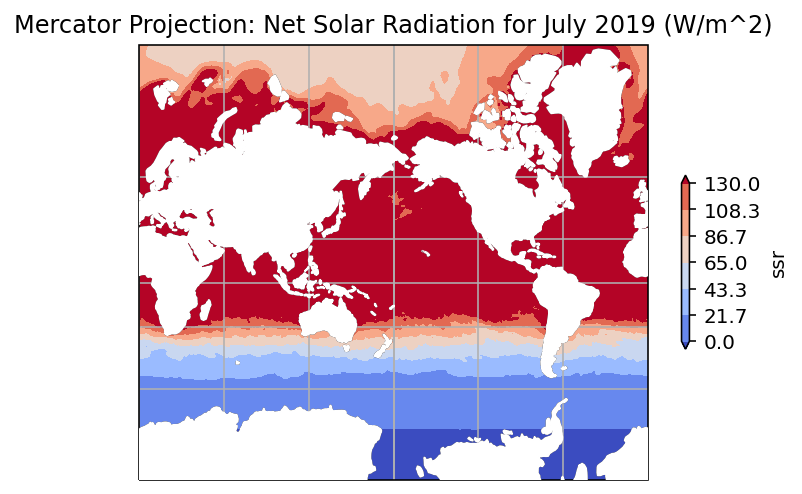

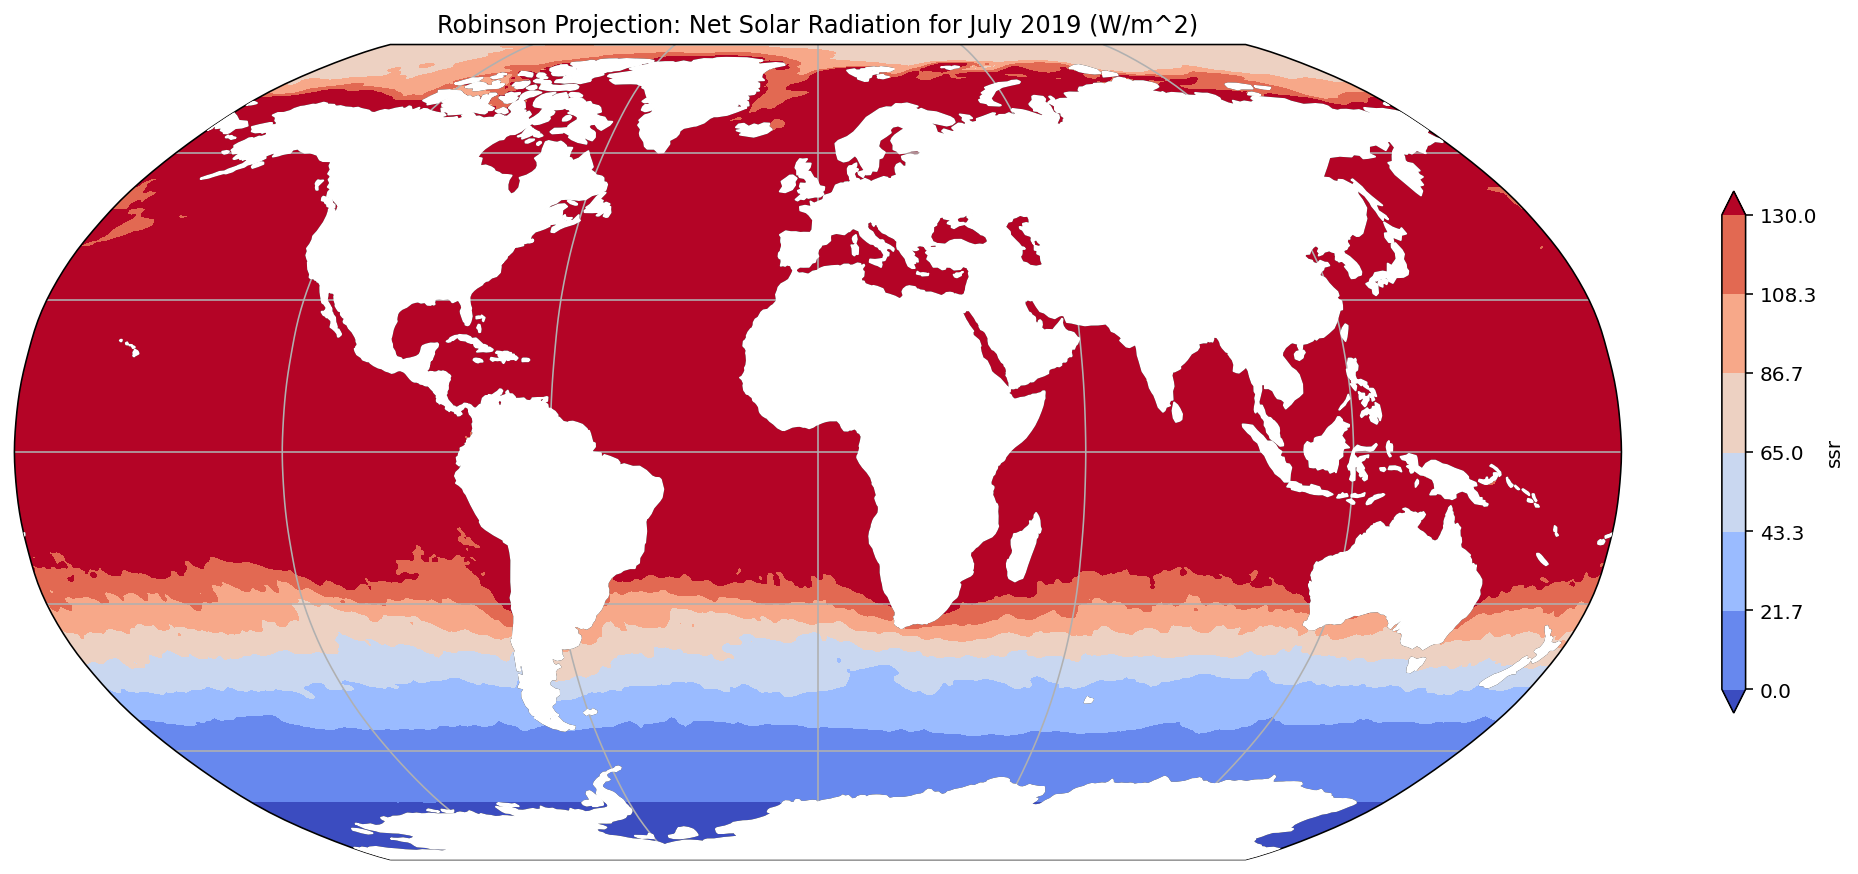

In [30]:
#plot data on other projections 
#https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
plt.clf()
year_str='2019'
month_str='07'

biasContDist=20

iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-2*iMinMax,+0.0001,biasContDist)

field_test=(ds_2019.ssr).sel(time=year_str+'-'+month_str+'-07', method='nearest')

plt.figure()
ax = plt.axes(projection=ccrs.Mercator(central_longitude=180))
ax.coastlines()
ax.gridlines()
ax.add_feature(cart.feature.LAND, zorder=100, color='white', edgecolor='k',)
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=0, vmax=130, cbar_kwargs={'shrink': 0.4})


ax.set_title('Mercator Projection: Net Solar Radiation for July 2019 (W/m^2)')

fig = plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
ax.add_feature(cart.feature.LAND, zorder=100, color='white', edgecolor='k',)
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-0, vmax=130, cbar_kwargs={'shrink': 0.4})


ax.set_title('Robinson Projection: Net Solar Radiation for July 2019 (W/m^2)')

Text(0.5, 1.0, 'Robinson Projection: Net Solar Radiation for January 2019 (W/m^2)')

<Figure size 432x288 with 0 Axes>

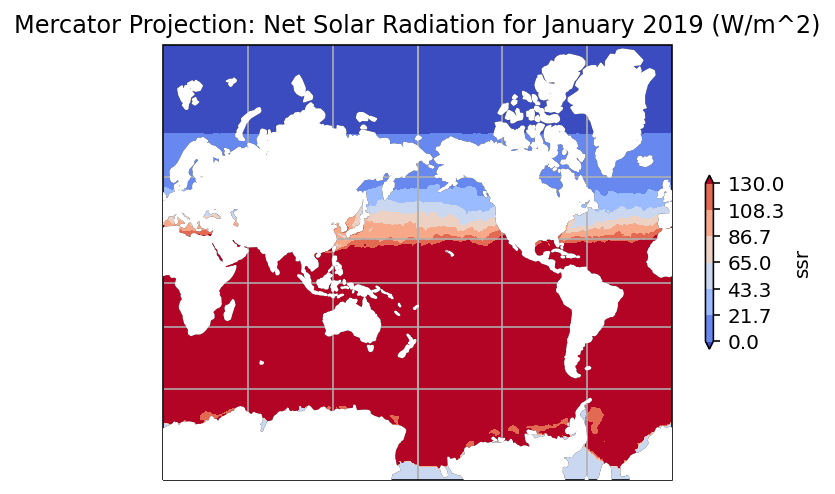

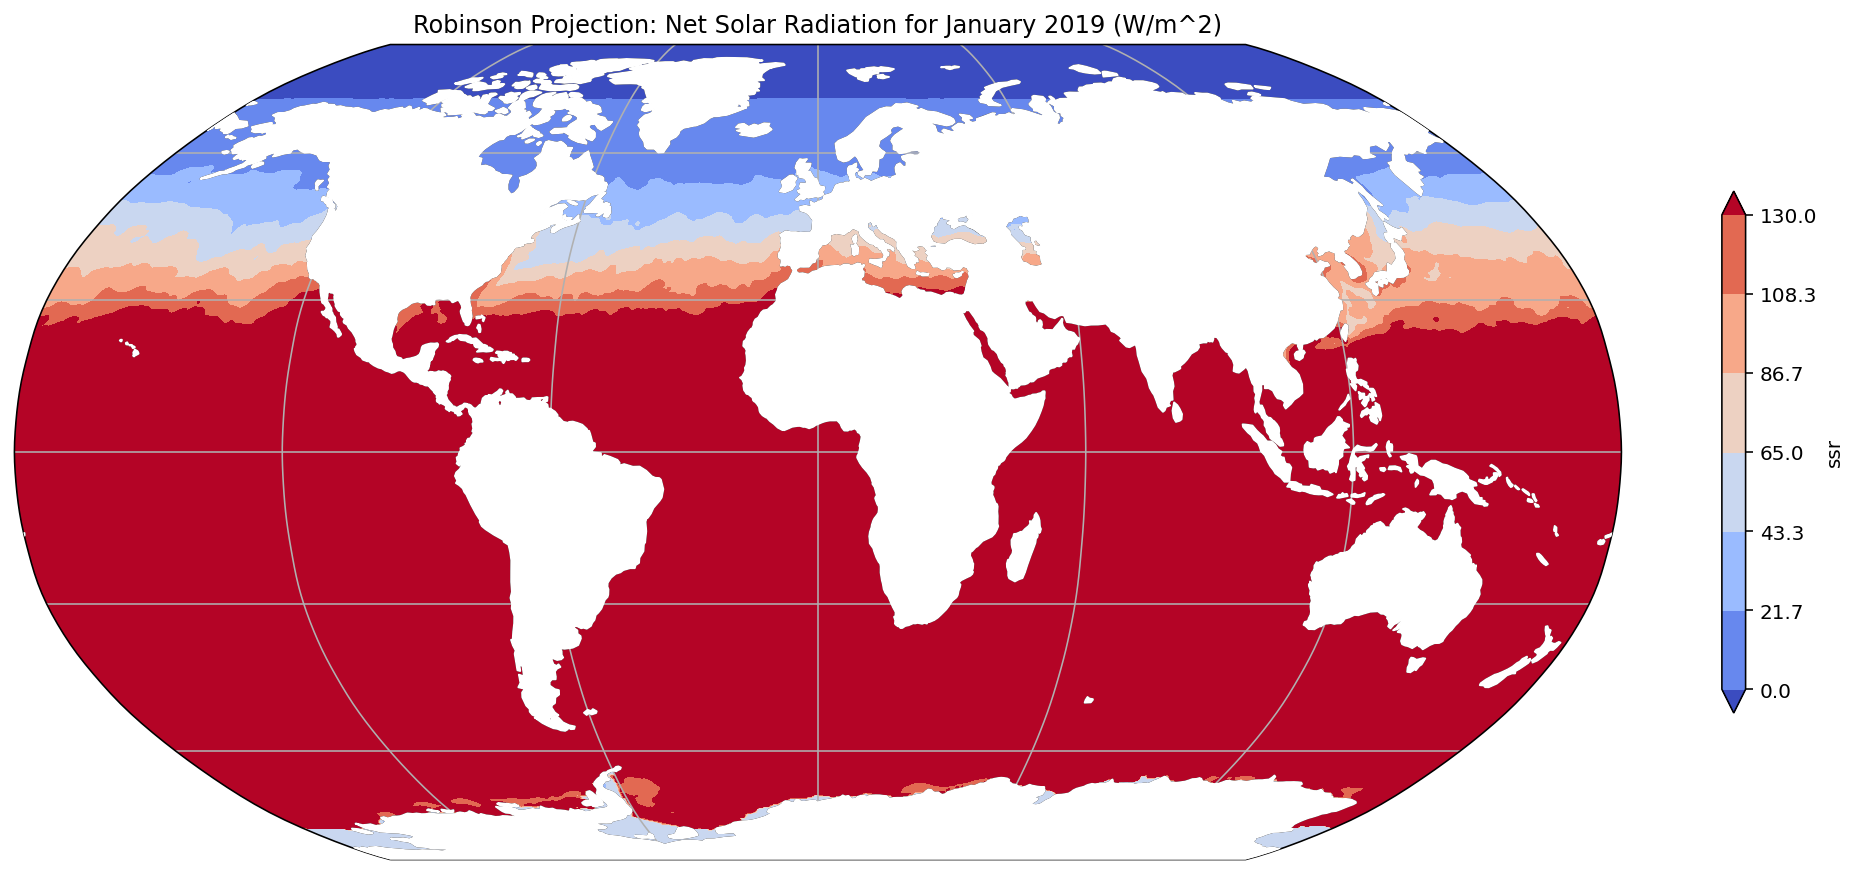

In [31]:
#plot data on other projections 
#https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
plt.clf()
year_str='2019'
month_str='01'

biasContDist=20

iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-2*iMinMax,+0.0001,biasContDist)

field_test=(ds_2019.ssr).sel(time=year_str+'-'+month_str+'-01', method='nearest')

plt.figure()
ax = plt.axes(projection=ccrs.Mercator(central_longitude=180))
ax.coastlines()
ax.gridlines()
ax.add_feature(cart.feature.LAND, zorder=100, color='white', edgecolor='k',)
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=0, vmax=130, cbar_kwargs={'shrink': 0.4})


ax.set_title('Mercator Projection: Net Solar Radiation for January 2019 (W/m^2)')

fig = plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
ax.add_feature(cart.feature.LAND, zorder=100, color='white', edgecolor='k',)
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-0, vmax=130, cbar_kwargs={'shrink': 0.4})


ax.set_title('Robinson Projection: Net Solar Radiation for January 2019 (W/m^2)')

As expected, net solar radiation is much higher in the northern hemisphere in July, the boreal summertime. Conversely, net solar radiation is much higher in the southern hemisphere in January, the austral summertime.

## SEA - Regional look on SSR
Living in the tropics all my life, I am curious to see if there are at least some subtle geographical variations over SEA. My hypothesis is that there should be equal solar radiation within the area, unless there are prominent areas that tend to be cloudier than others.

Text(0.5, 1.0, 'Mercator Projection: Surface Latent Heat Flux in July 2019 (W/m^2) in Southeast Asia ')

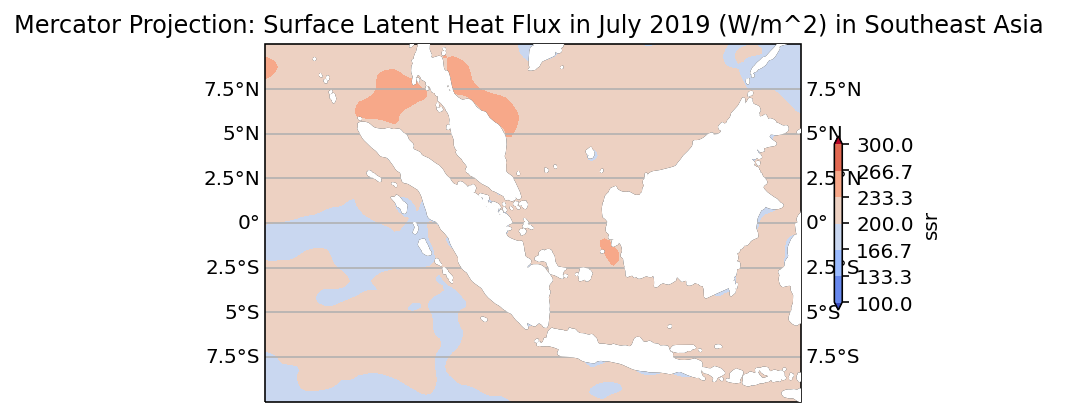

In [32]:
biasContDist=10
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-2*iMinMax,+0.0001,biasContDist)

plt.clf()
year_str='2019'
month_str='07'

field_test=(ds_2019.ssr).sel(time=year_str+'-'+month_str+'-07', method='nearest')

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.set_extent([90,120,10,-10])
ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='k', color='white')
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=100, vmax=300, cbar_kwargs={'shrink': 0.4})

ax.set_title('Mercator Projection: Surface Latent Heat Flux in July 2019 (W/m^2) in Southeast Asia ')

It is my humble opinion that these variations are too minor to draw any conclusions, and either way, my homeland Singapore seems to be perpetually nice and warm.

## 2.3 The Bowen ration = Qh / Qe = sshf / slhf

Text(0.5, 1.0, 'Robinson Projection: Bowen ratio R = Qh/Qe for July 2019 (W/m^2)')

<Figure size 432x288 with 0 Axes>

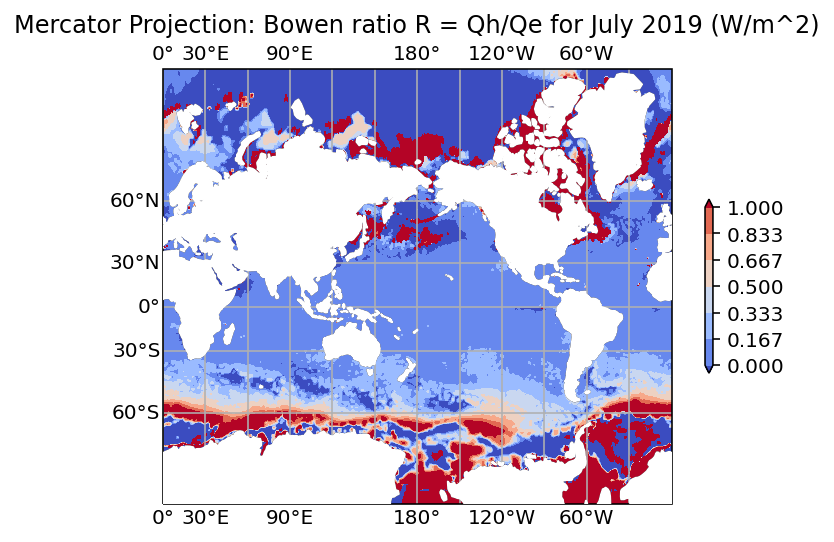

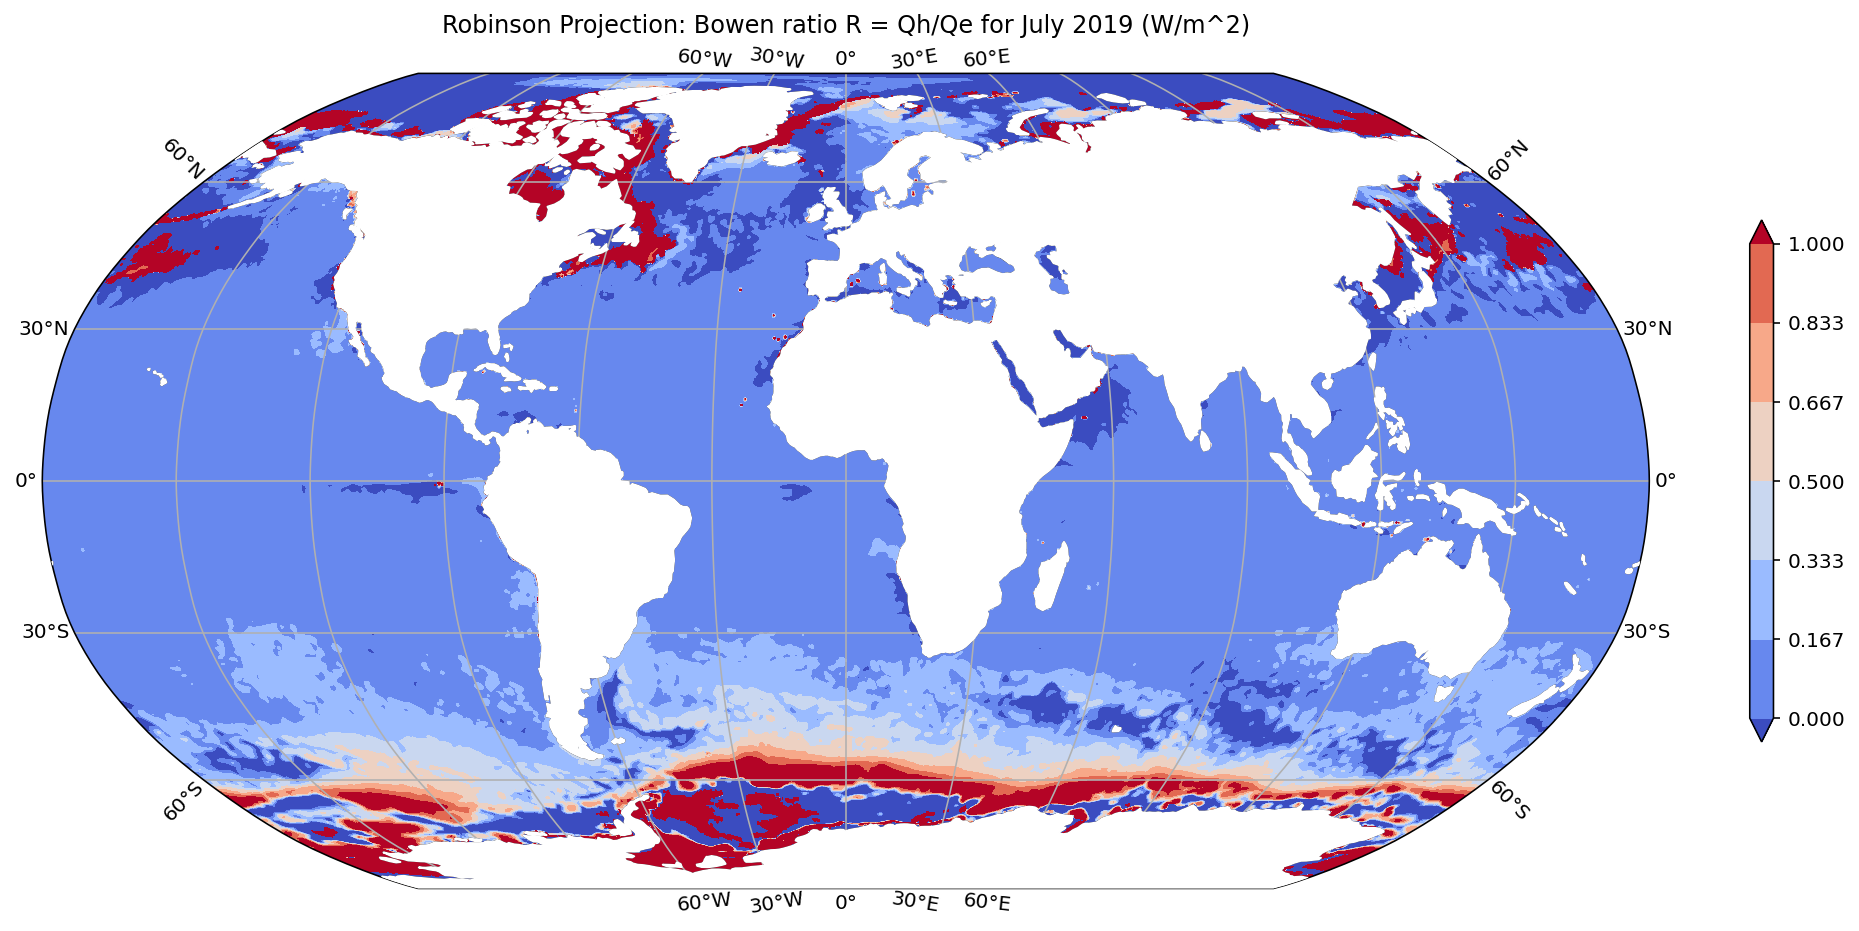

In [33]:
#plot data on other projections 
#https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

plt.clf()
year_str='2019'
month_str='07'

field_test1=(ds_2019.sshf).sel(time=year_str+'-'+month_str+'-01', method='nearest')
field_test2=(ds_2019.slhf).sel(time=year_str+'-'+month_str+'-01', method='nearest')

plt.figure()
ax = plt.axes(projection=ccrs.Mercator(central_longitude=180))
ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='k', color='white')
(field_test1/field_test2).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=0, vmax=1, cbar_kwargs={'shrink': 0.4})
ax.set_title('Mercator Projection: Bowen ratio R = Qh/Qe for July 2019 (W/m^2)')

biasContDist=0.1
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(0,2*iMinMax+0.0001,biasContDist)

fig = plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='k', color='white')
(field_test1/field_test2).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=0, vmax=1, cbar_kwargs={'shrink': 0.4})


ax.set_title('Robinson Projection: Bowen ratio R = Qh/Qe for July 2019 (W/m^2)')

Bowen ratio is used to describe the type of heat transfer - sensible or latent heat. It remains relatively constant over tropical oceans (at about 0.1), but varies more at the poles.

It can also be used to categorise types of surfaces - such as tropical oceans, grasslands, deserts and tropical rainforests.

## 2.4 Surface fluxes for the whole year 2019

Text(0.5, 1.0, 'Orthographic Projection: Surface Latent Heat Flux for 2019')

<Figure size 432x288 with 0 Axes>

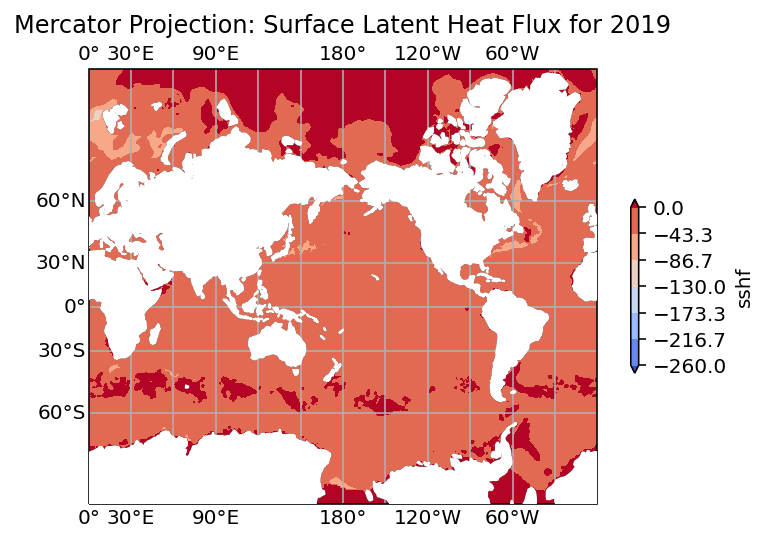

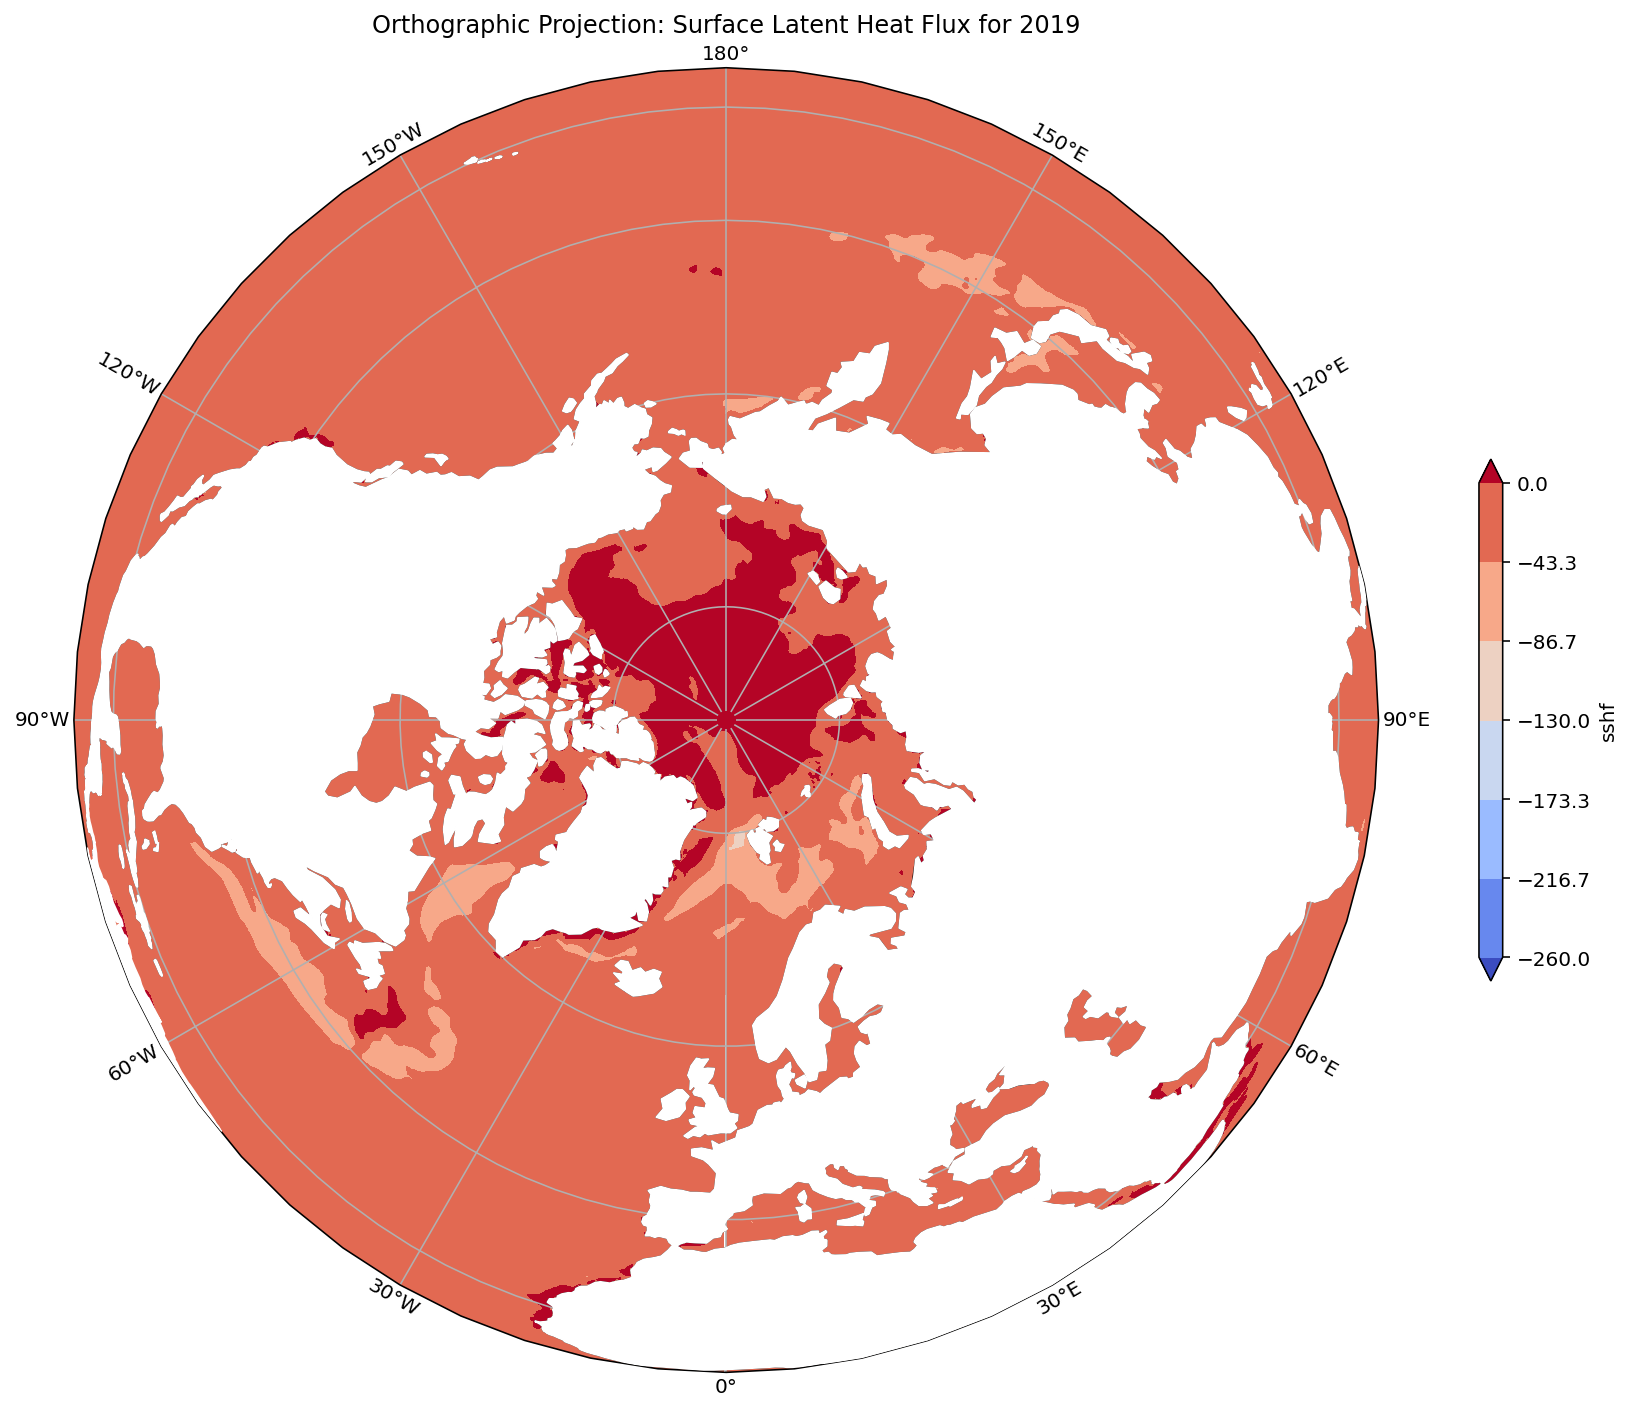

In [34]:
#plot data on other projections 
#https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
plt.clf()

field_test=ds_2019.sshf.mean(dim='time') #yearly average

plt.figure()
ax = plt.axes(projection=ccrs.Mercator(central_longitude=180))
ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='k', color='white')
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-260, vmax=0, cbar_kwargs={'shrink': 0.4})

ax.set_title('Mercator Projection: Surface Latent Heat Flux for 2019')


biasContDist=20
# iMinMax=-120
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-2*iMinMax,+0.0001,biasContDist)

fig = plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='k', color='white')
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-260, vmax=0, cbar_kwargs={'shrink': 0.4})


ax.set_title('Orthographic Projection: Surface Latent Heat Flux for 2019')
    

Text(0.5, 1.0, 'Robinson Projection: Average Surface Latent Heat Flux for 2019 (W/m^2)')

<Figure size 432x288 with 0 Axes>

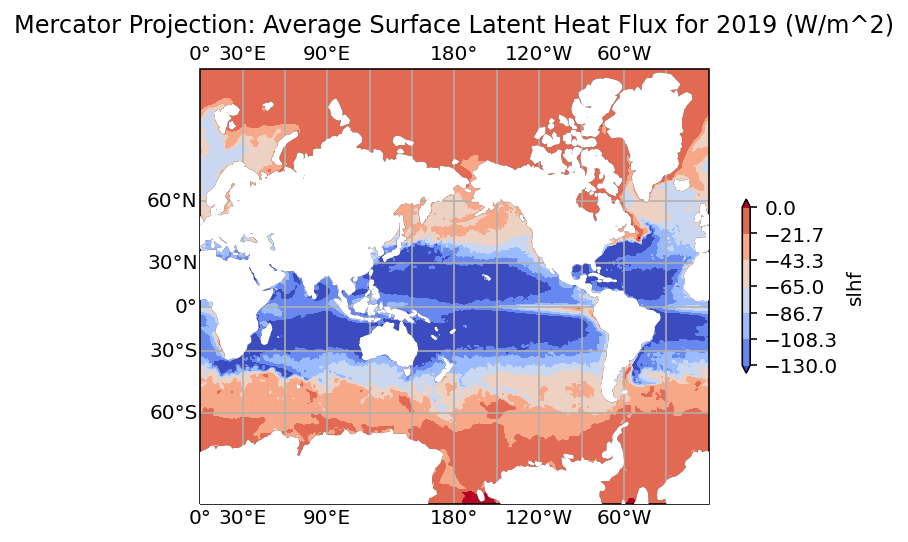

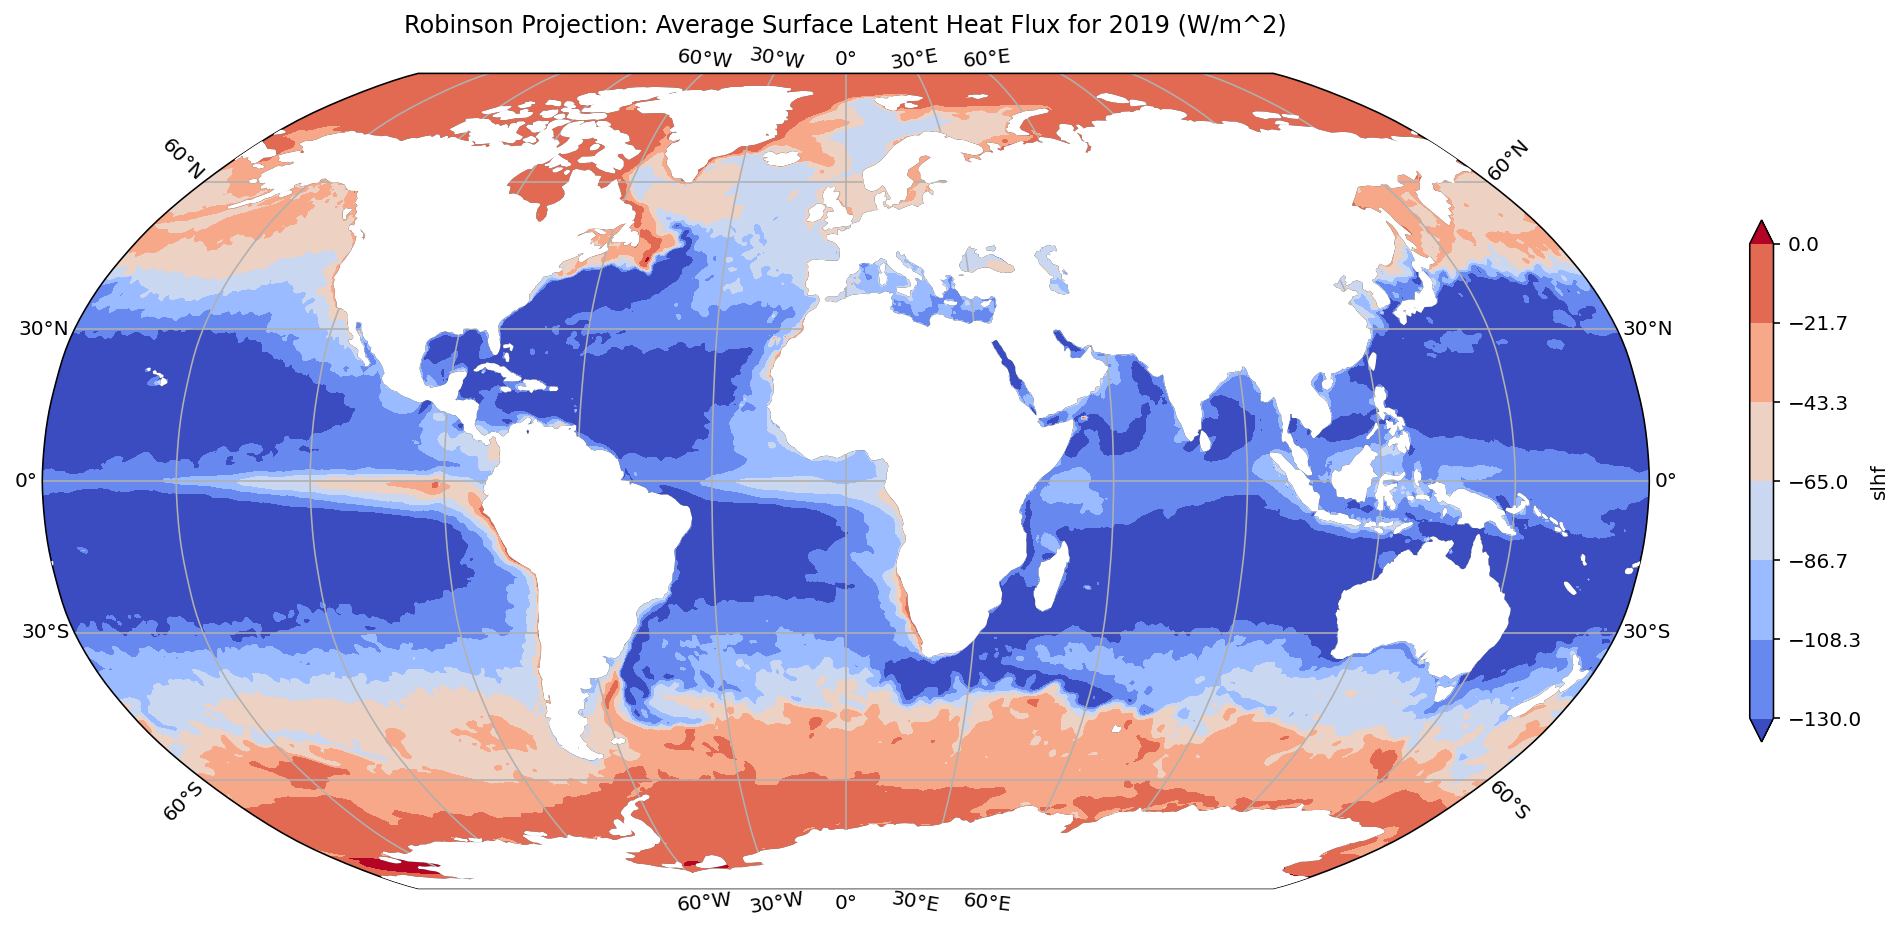

In [35]:
#plot data on other projections 
#https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
plt.clf()

biasContDist=20

iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-2*iMinMax,+0.0001,biasContDist)

field_test=ds_2019.slhf.mean(dim='time') #yearly average

plt.figure()
ax = plt.axes(projection=ccrs.Mercator(central_longitude=180))
ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, color='white', edgecolor='k',)
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-130, vmax=0, cbar_kwargs={'shrink': 0.4})


ax.set_title('Mercator Projection: Average Surface Latent Heat Flux for 2019 (W/m^2)')

fig = plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, color='white', edgecolor='k',)
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-130, vmax=0, cbar_kwargs={'shrink': 0.4})


ax.set_title('Robinson Projection: Average Surface Latent Heat Flux for 2019 (W/m^2)')

Text(0.5, 1.0, 'Robinson Projection: Average Solar Radiation for 2019 (W/m^2)')

<Figure size 432x288 with 0 Axes>

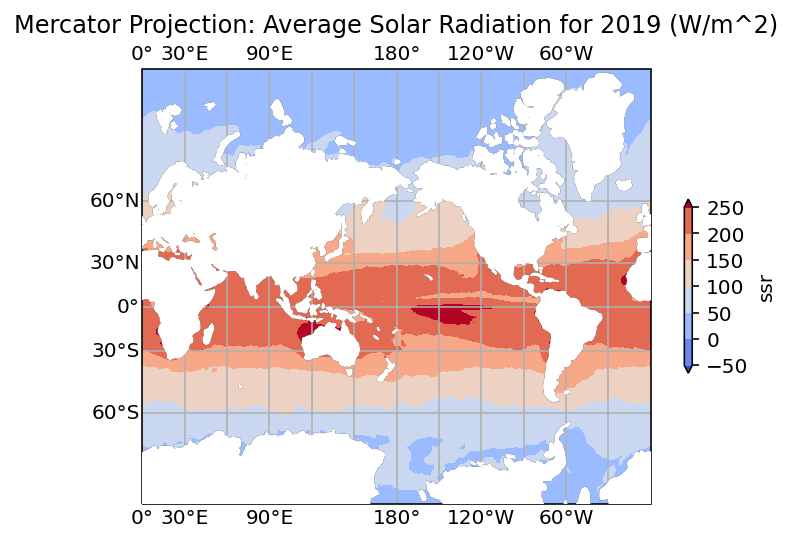

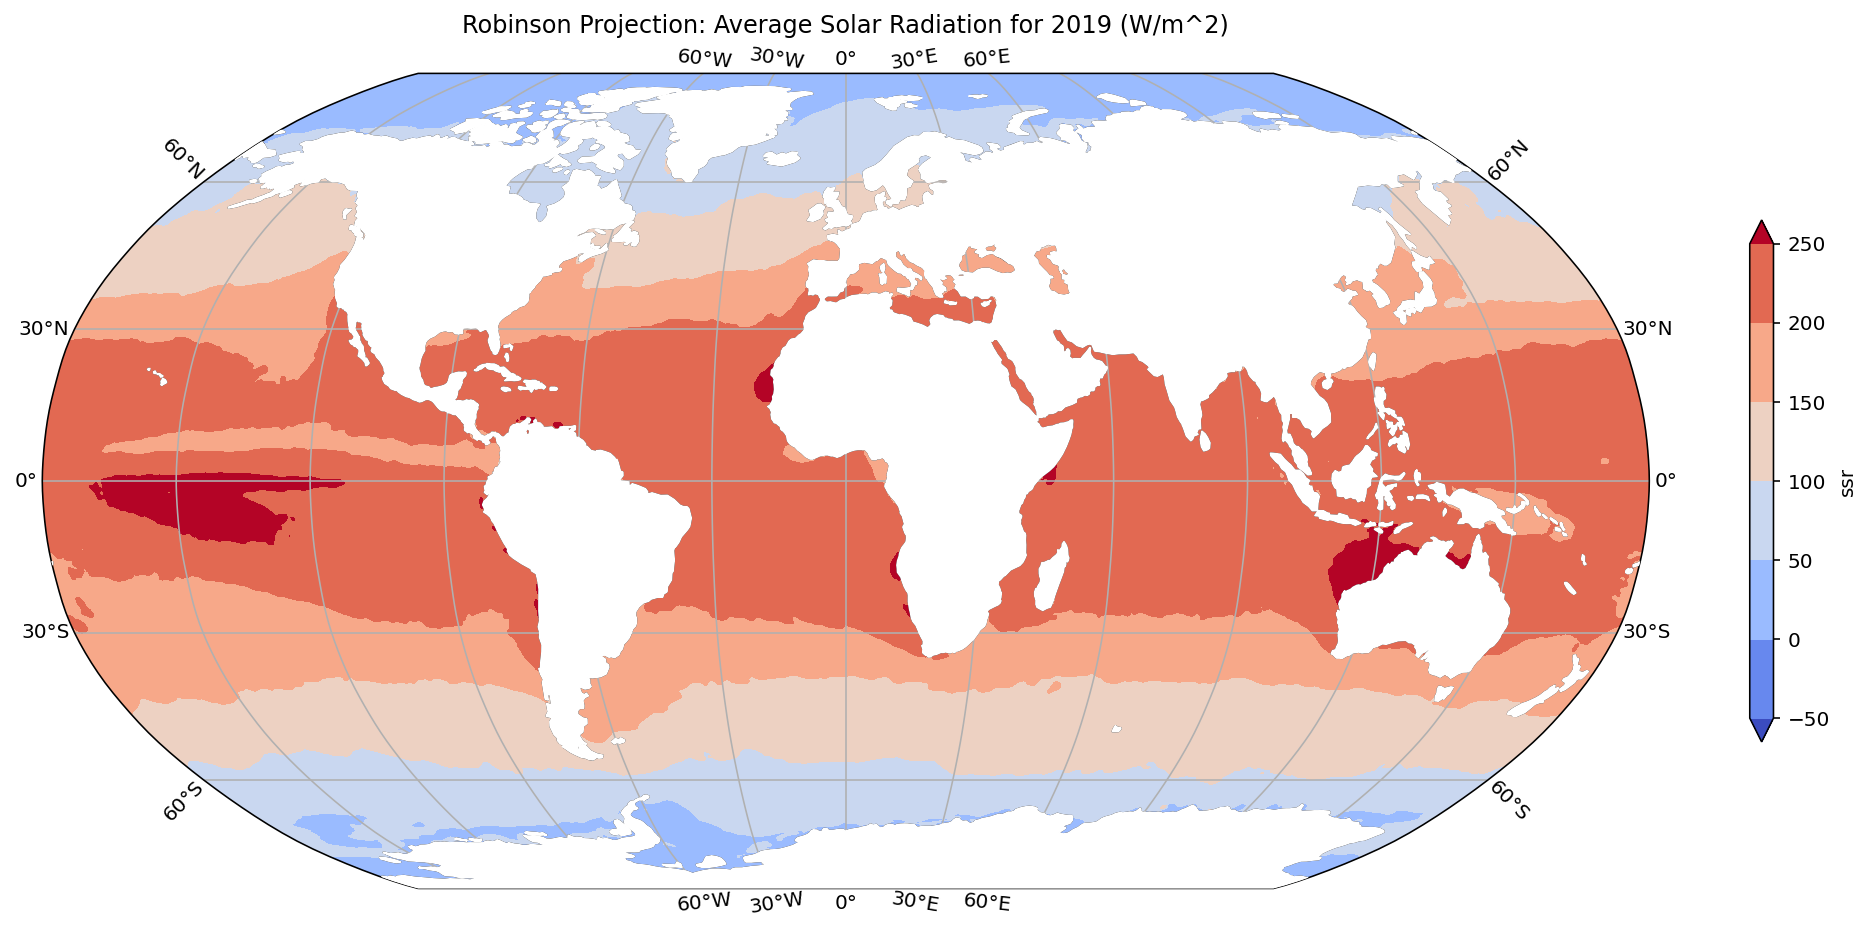

In [36]:
#plot data on other projections 
#https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
plt.clf()

biasContDist=20

iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-2*iMinMax,+0.0001,biasContDist)

field_test=ds_2019.ssr.mean(dim='time') #yearly average

plt.figure()
ax = plt.axes(projection=ccrs.Mercator(central_longitude=180))
ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, color='white', edgecolor='k',)
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-50, vmax=250, cbar_kwargs={'shrink': 0.4})


ax.set_title('Mercator Projection: Average Solar Radiation for 2019 (W/m^2)')

fig = plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, color='white', edgecolor='k',)
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-50, vmax=250, cbar_kwargs={'shrink': 0.4})


ax.set_title('Robinson Projection: Average Solar Radiation for 2019 (W/m^2)')


Text(0.5, 1.0, 'Robinson Projection: Average Surface Net Thermal Radiation for 2019 (W/m^2)')

<Figure size 432x288 with 0 Axes>

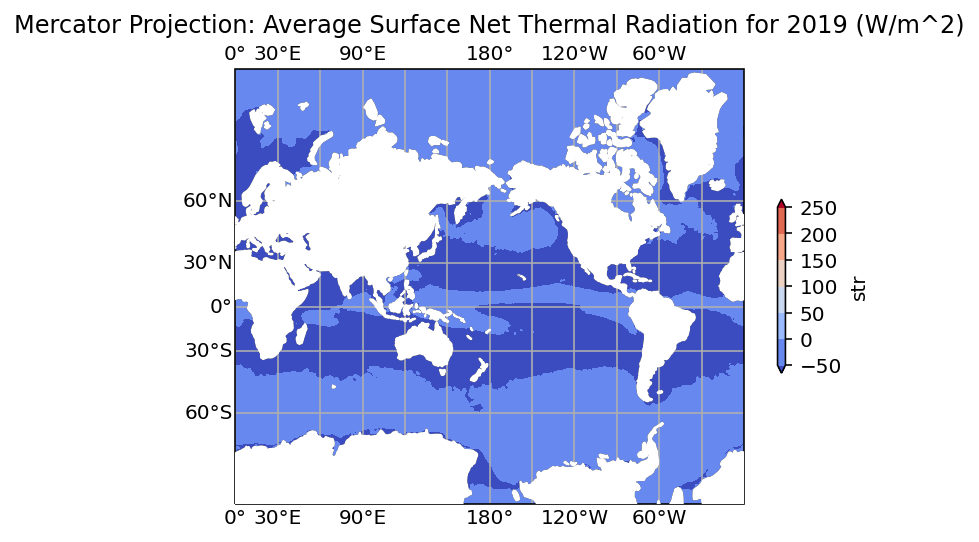

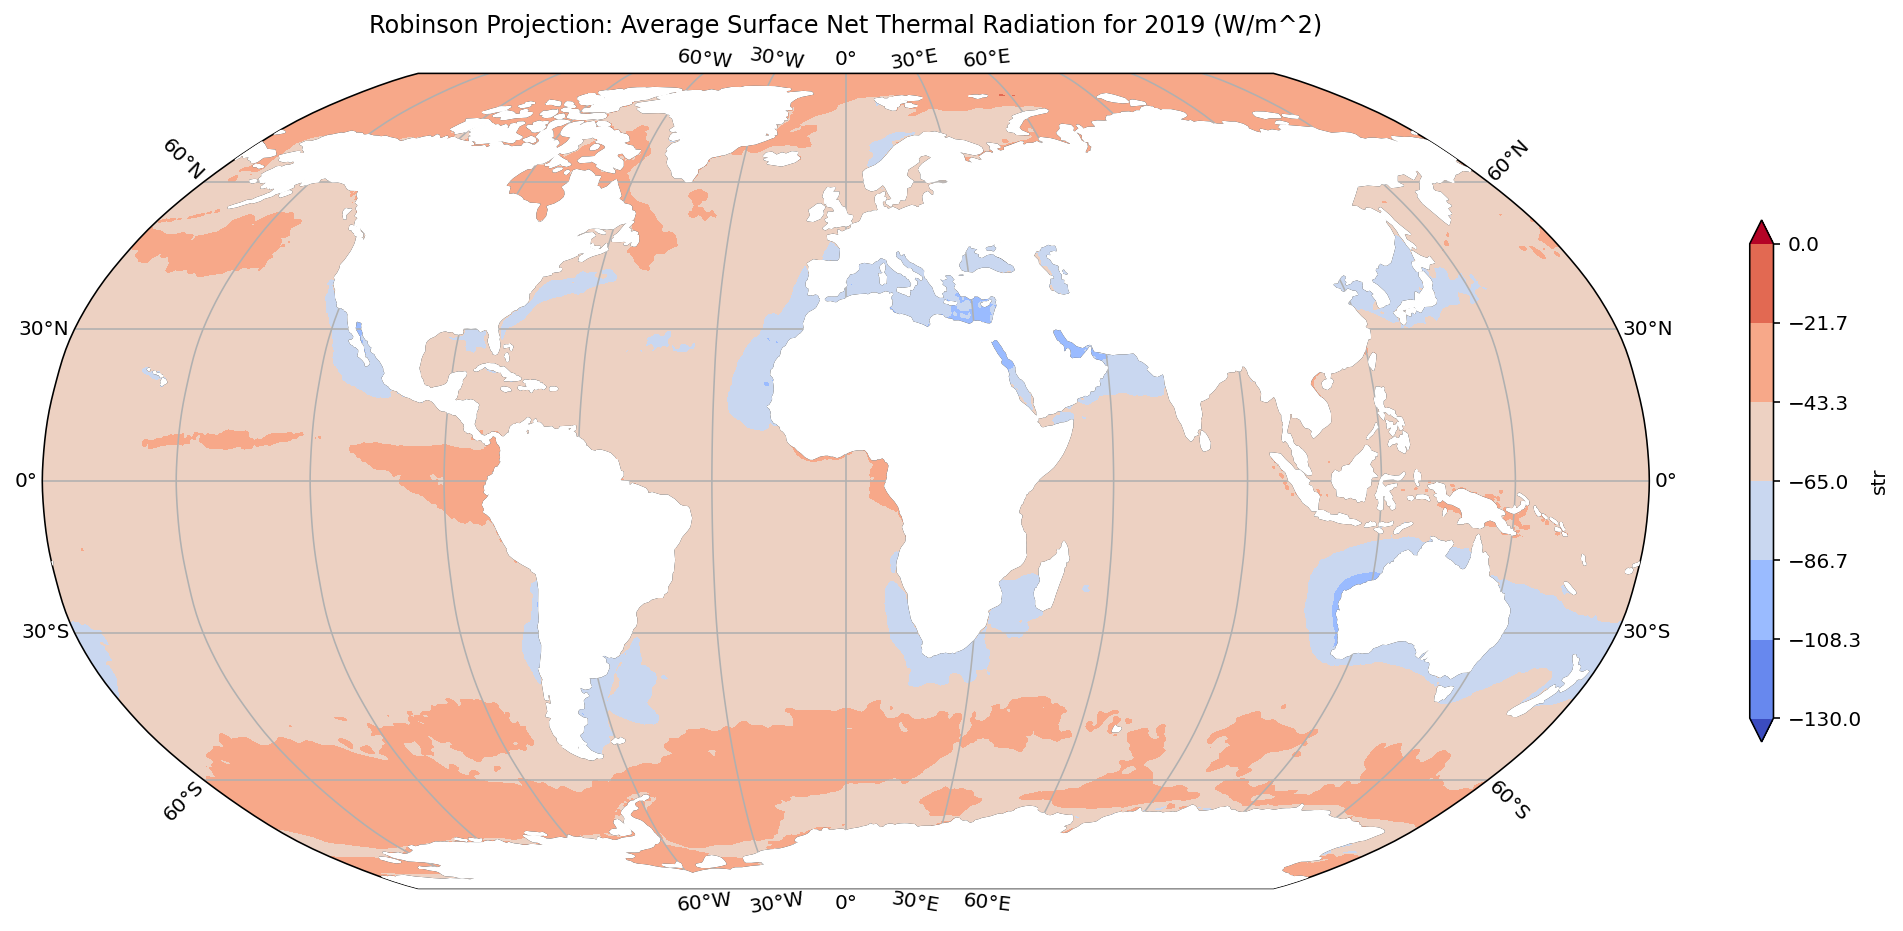

In [37]:
#plot data on other projections
plt.clf()

field_test=ds_2019.str.mean(dim='time') #yearly average
plt.figure()
ax = plt.axes(projection=ccrs.Mercator(central_longitude=180))
ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, color='white', edgecolor='k',)
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-50, vmax=250, cbar_kwargs={'shrink': 0.4})


ax.set_title('Mercator Projection: Average Surface Net Thermal Radiation for 2019 (W/m^2)')

fig = plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, color='white', edgecolor='k',)
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-130, vmax=0, cbar_kwargs={'shrink': 0.4})


ax.set_title('Robinson Projection: Average Surface Net Thermal Radiation for 2019 (W/m^2)')


Text(0.5, 1.0, 'Surface Net budget for 2019 (W/m^2)')

<Figure size 432x288 with 0 Axes>

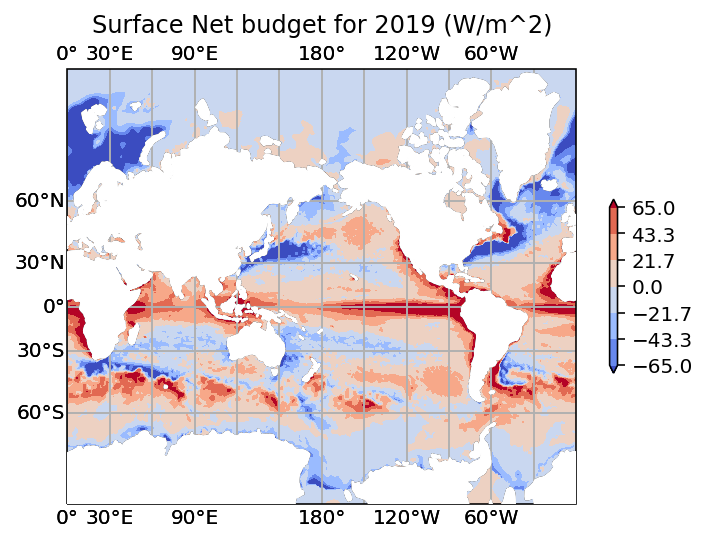

<Figure size 1296x864 with 0 Axes>

In [38]:
#plot data on other projections
plt.clf()

field_test=ds_2019.str.mean(dim='time')+ds_2019.ssr.mean(dim='time')+ds_2019.sshf.mean(dim='time')+ds_2019.slhf.mean(dim='time')

plt.figure()
ax = plt.axes(projection=ccrs.Mercator(central_longitude=180))
ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, color='white', edgecolor='k',)

biasContDist=10
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-iMinMax,iMinMax+0.0001,biasContDist)

fig = plt.figure(figsize=(18,12))

ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, color='white', edgecolor='k',)
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-65, vmax=65, cbar_kwargs={'shrink': 0.4})


ax.set_title('Surface Net budget for 2019 (W/m^2)')

Text(0.5, 1.0, 'Robinson Projection: Surface Net budget for 1979 (W/m^2)')

<Figure size 432x288 with 0 Axes>

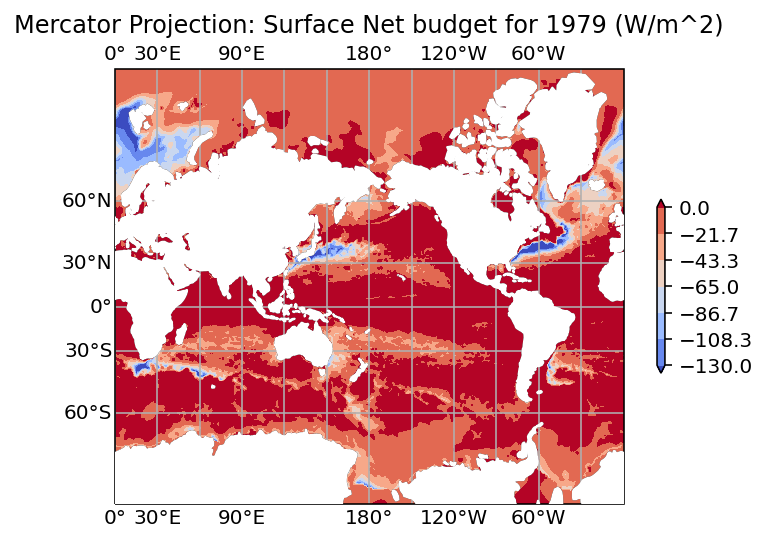

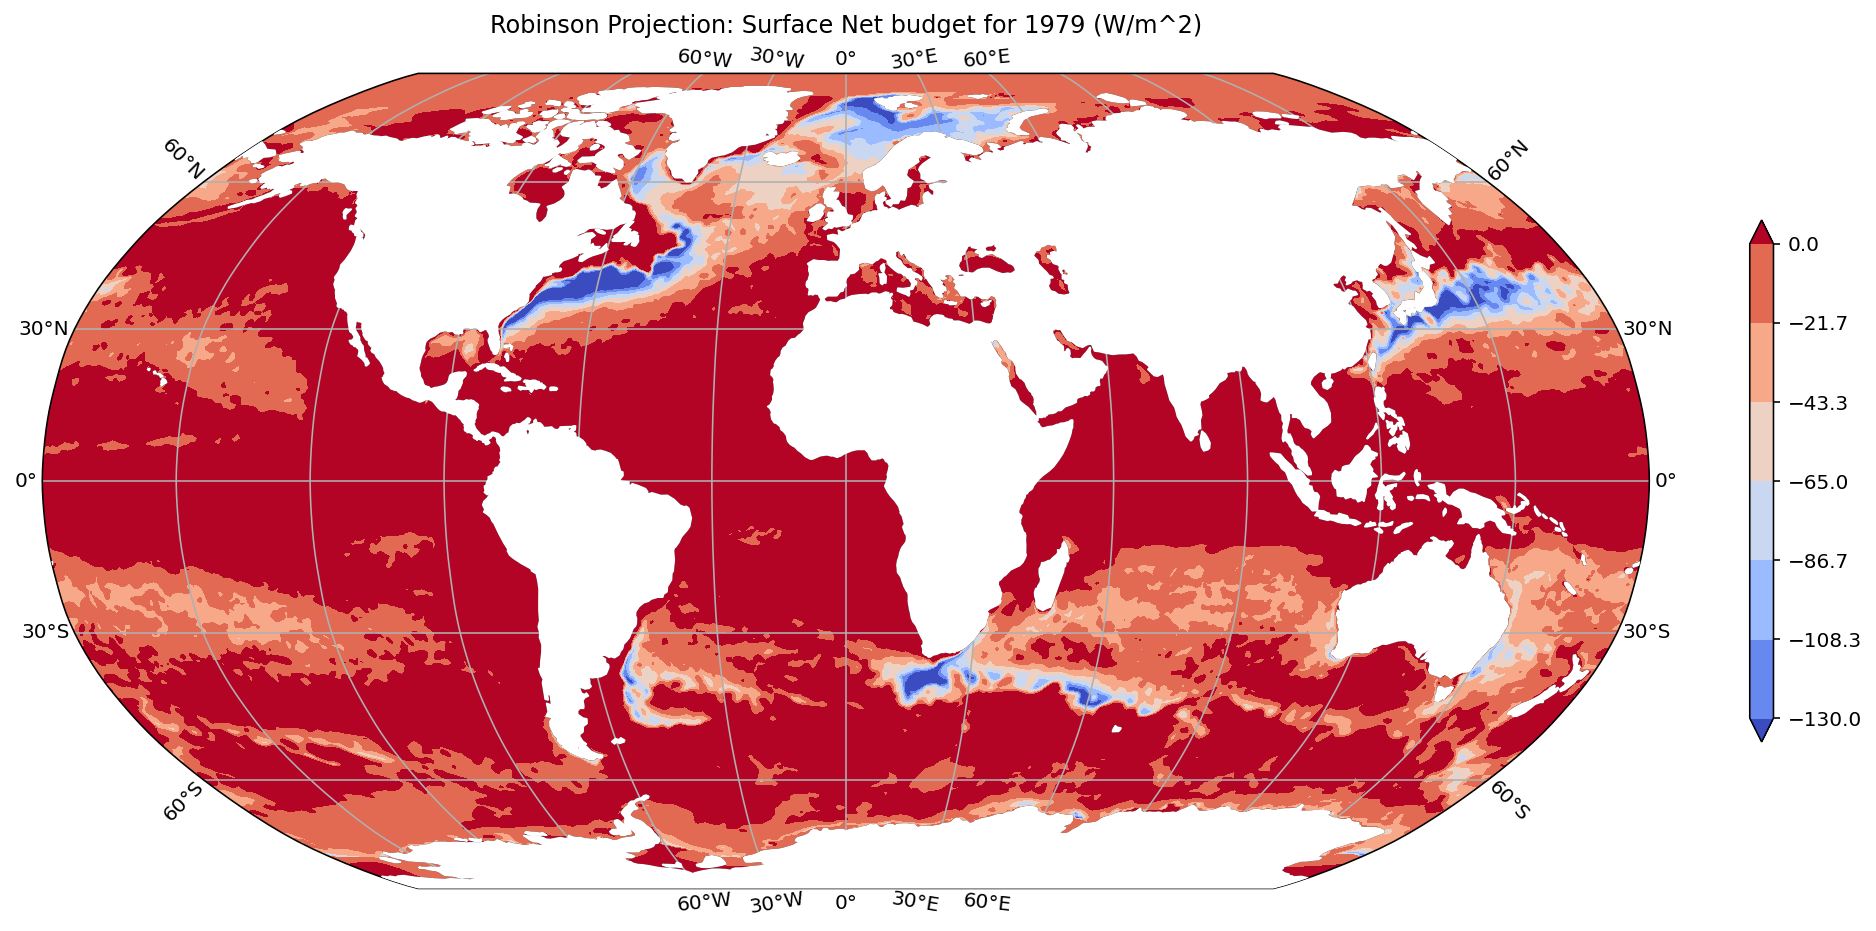

In [39]:
#plot data on other projections
plt.clf()

field_test2=ds_1979.str.mean(dim='time')+ds_1979.ssr.mean(dim='time')+ds_1979.sshf.mean(dim='time')+ds_1979.slhf.mean(dim='time')
plt.figure()
ax = plt.axes(projection=ccrs.Mercator(central_longitude=180))
ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, color='white', edgecolor='k',)
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-130, vmax=0, cbar_kwargs={'shrink': 0.4})

ax.set_title('Mercator Projection: Surface Net budget for 1979 (W/m^2)')

biasContDist=10
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-iMinMax,iMinMax+0.0001,biasContDist)

fig = plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines(draw_labels=True, xlocs=np.arange(-180,180,30))
ax.add_feature(cart.feature.LAND, zorder=100, color='white', edgecolor='k',)
(field_test/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-130, vmax=0, cbar_kwargs={'shrink': 0.4})


ax.set_title('Robinson Projection: Surface Net budget for 1979 (W/m^2)')



Text(0.5, 1.0, 'Difference in Surface Net budget 2019 - 1979 (W/m^2)')

<Figure size 432x288 with 0 Axes>

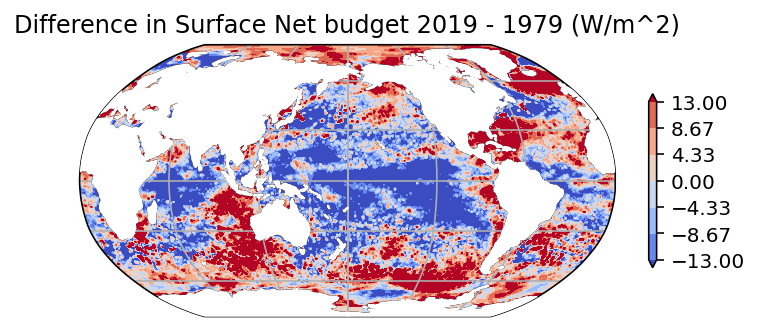

<Figure size 1296x864 with 0 Axes>

In [40]:
#plot data on other projections
plt.clf()
field_test=ds_2019.str.mean(dim='time')+ds_2019.ssr.mean(dim='time')+ds_2019.sshf.mean(dim='time')+ds_2019.slhf.mean(dim='time')
field_test2=ds_1979.str.mean(dim='time')+ds_1979.ssr.mean(dim='time')+ds_1979.sshf.mean(dim='time')+ds_1979.slhf.mean(dim='time')

plt.figure()
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()

biasContDist=2
iMinMax=12.*biasContDist/2.+biasContDist/2.
clevsTD=np.arange(-iMinMax,iMinMax+0.0001,biasContDist)

fig = plt.figure(figsize=(18,12))
ax.coastlines()
ax.gridlines()
ax.add_feature(cart.feature.LAND, zorder=100, color='white', edgecolor='k',)
((field_test-field_test2)/86400.).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), clevel=clevsTD, extend='both', cmap='coolwarm', vmin=-13, vmax=13, cbar_kwargs={'shrink': 0.4})


ax.set_title('Difference in Surface Net budget 2019 - 1979 (W/m^2)')

## Calculate area-weighted averages

Some preparation is required before we can create area-weighted averages

In [8]:
field_test=ds_2019.str.mean(dim='time')+ds_2019.ssr.mean(dim='time')+ds_2019.sshf.mean(dim='time')+ds_2019.slhf.mean(dim='time')
print(field_test)

<xarray.DataArray (latitude: 721, longitude: 1440)>
array([[-785589.06 , -785589.06 , -785589.06 , ..., -785589.06 ,
        -785589.06 , -785589.06 ],
       [-857885.4  , -857833.2  , -857607.9  , ..., -858250.75 ,
        -858143.75 , -857935.4  ],
       [-910079.94 , -909728.9  , -909421.25 , ..., -910620.75 ,
        -910498.25 , -910599.06 ],
       ...,
       [  10992.709,   10908.709,   10850.334, ...,   11013.334,
          11017.334,   11014.834],
       [   7172.416,    7219.166,    7247.416, ...,    7364.584,
           7261.166,    7289.541],
       [   3576.875,    3576.875,    3576.875, ...,    3576.875,
           3576.875,    3576.875]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0


In [9]:
weights = np.cos(np.deg2rad(ds_2019.latitude))
weights.name = "weights"

In [10]:
str_weighted = ds_2019.str.mean(dim='time').weighted(weights)
weighted_mean = str_weighted.mean(("lon", "lat"))

In [11]:
temp = np.cos(np.deg2rad(lats))
# temp = xr.DataArray(weights)
weights = xr.DataArray(temp, dims=['lats', 'lons'])
weights.attrs['stan
dard_name'] = 'weights'

In [3]:
field_test=ds_2019.str.mean(dim='time')+ds_2019.ssr.mean(dim='time')+ds_2019.sshf.mean(dim='time')+ds_2019.slhf.mean(dim='time')
# (field_test/86400.).weighted(weights).mean(dim=('longitude')).plot()
(field_test/86400.).mean(dim=('longitude')).plot()
(ds_2019.ssr.mean(dim='time')/86400.).mean(dim=('longitude')).plot()
(ds_2019.str.mean(dim='time')/86400.).mean(dim=('longitude')).plot()
(1.*weighted_mean/86400.).mean(dim=('longitude')).plot()
(ds_2019.slhf.mean(dim='time')/86400.).mean(dim=('longitude')).plot()
(ds_2019.sshf.mean(dim='time')/86400.).mean(dim=('longitude')).plot()
labels = ['ssr','str','weighted_str','slhf','sshf']
plt.legend(labels,loc='lower right')
plt.legend()

NameError: name 'ds_2019' is not defined

In [15]:
field_test=ds_2019.str.mean(dim='time')+ds_2019.ssr.mean(dim='time')+ds_2019.sshf.mean(dim='time')+ds_2019.slhf.mean(dim='time')
(field_test/86400.).weighted(weights).mean(dim=('longitude')).plot()

plt.legend(labels,loc='lower right')
ax.legend()

<span style="color:green">Code is compiling well. Maps could have better levels on the colorbar and similar dimensions. Weights don't compile. Score = 2/3</span>

# 3. Ice Tethered Profilers & Argo floats
## 3.1 ITP65
I chose to look at ITP65. ITP65 was deployed on 27 August 2012, on a 1.52m thick ice floe in the Beaufort Sea (80° 53.4 N, 137° 25.8 W). It is part of the Beaufort Gyre Observing System (BGOS).

I accessed the Level III 1-db bin-averaged processed profile data to plot the figures below. ITP88 takes full profiles from 7-760m depth every 1.5 days, and as such has 903 profiles.

## 3.1.1
In this section, I plot the temperature and salinity profiles against pressure, as well as the up profile contours.

In [0]:
# Load ITP65 MATLAB file
! wget ftp://ftp.whoi.edu/whoinet/itpdata/itp65final.mat ./ITP/

In [4]:
#Print the variables to understand how to use the data
import h5py
with h5py.File('/home/user/Assignment_20210131/itp65final.mat', 'r') as file:
    print(list(file.keys()))

['BCDOM', 'BCHLA', 'BPAR', 'BPRES', 'BSCAT', 'DO', 'E', 'I', 'J', 'N', 'P', 'S', 'T', 'V', 'Y', 'alph', 'bad', 'cshift', 'date', 'di', 'dorat', 'filts', 'idn', 'iup', 'jday', 'lag', 'lat', 'lon', 'n', 'prd', 'rat', 'sami', 'stas', 'tao']


In [5]:
#Load the data
import h5py
import numpy as np
filepath = 'itp65final.mat'
arrays = {}
f = h5py.File(filepath)
for k, v in f.items():
    arrays[k] = np.array(v)

<ipython-input-5-c7d114f49a62>:6: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(filepath)


In [3]:
#Print shape of array
arrays['P'].shape

(903, 786)

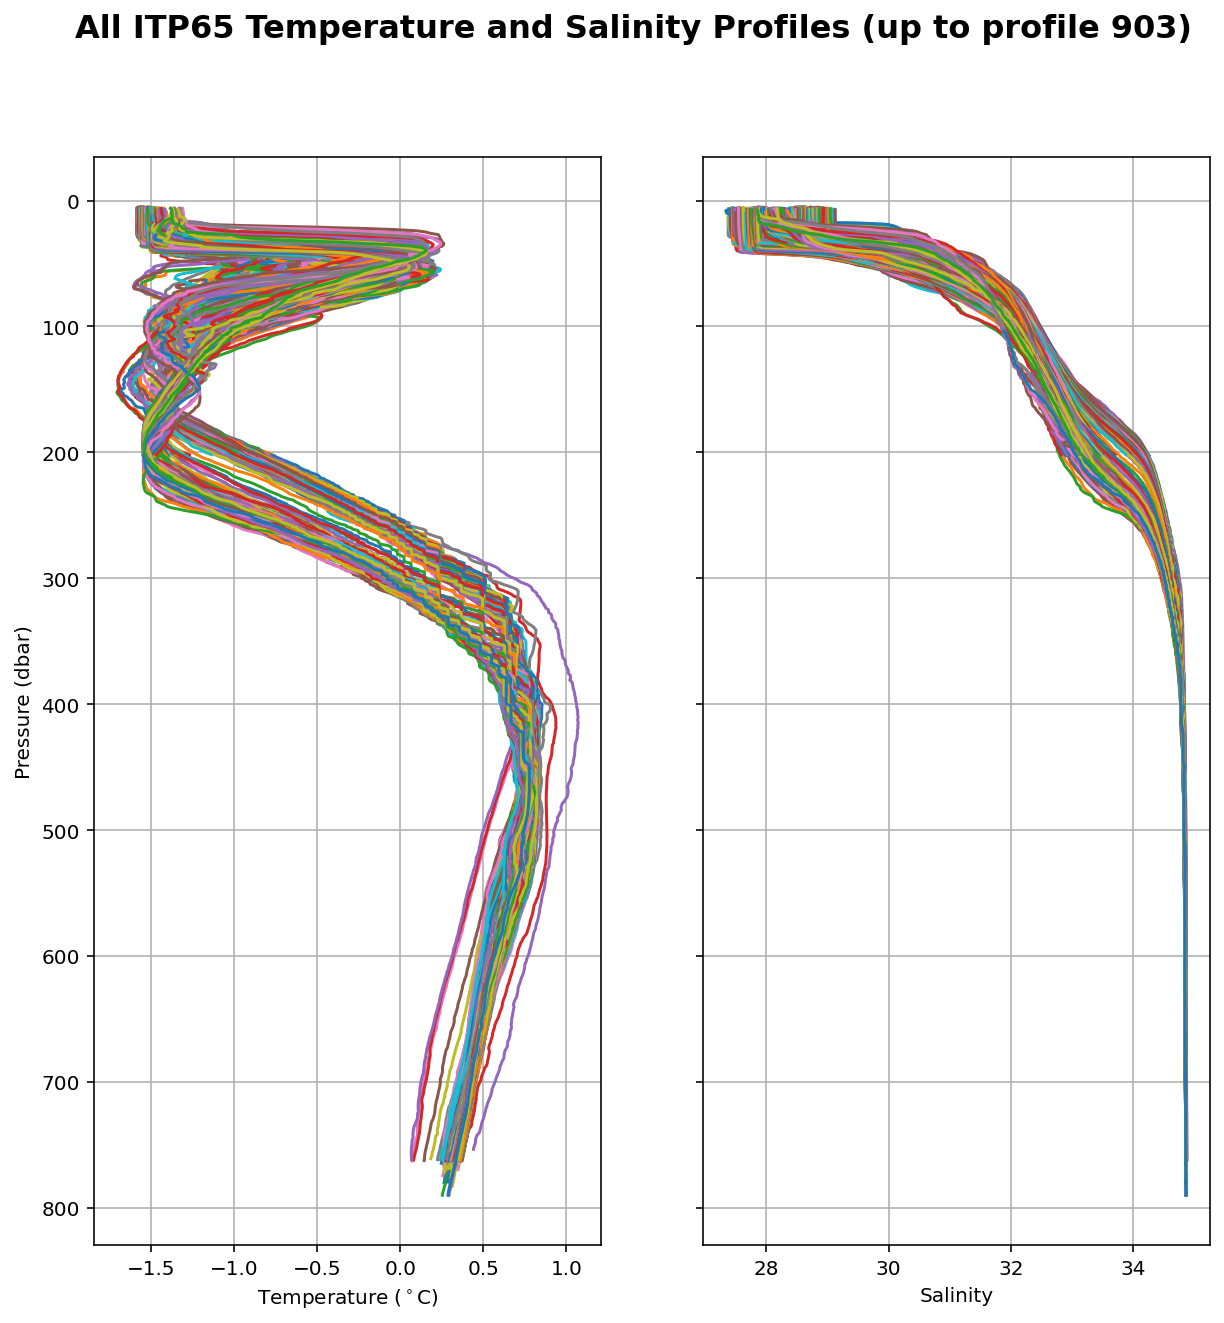

In [6]:
# Temperature and Salinity Profile Plots
import matplotlib.pyplot as plt
nprof=903

fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,10))

for x in range(nprof):
    ax1.plot(arrays['T'][x,:], arrays['P'][x,:], label=str(x))
    ax2.plot(arrays['S'][x,:], arrays['P'][x,:], label=str(x))
    ax1.set_ylabel('Pressure (dbar)')
    ax1.set_xlabel('Temperature ($^\circ$C)')
    ax2.set_xlabel('Salinity')

ax1.invert_yaxis()

# Add some gridlines
ax1.grid()
ax2.grid()

# Add a super title
fig.suptitle('All ITP65 Temperature and Salinity Profiles (up to profile 903)', fontweight='bold', fontsize=16);

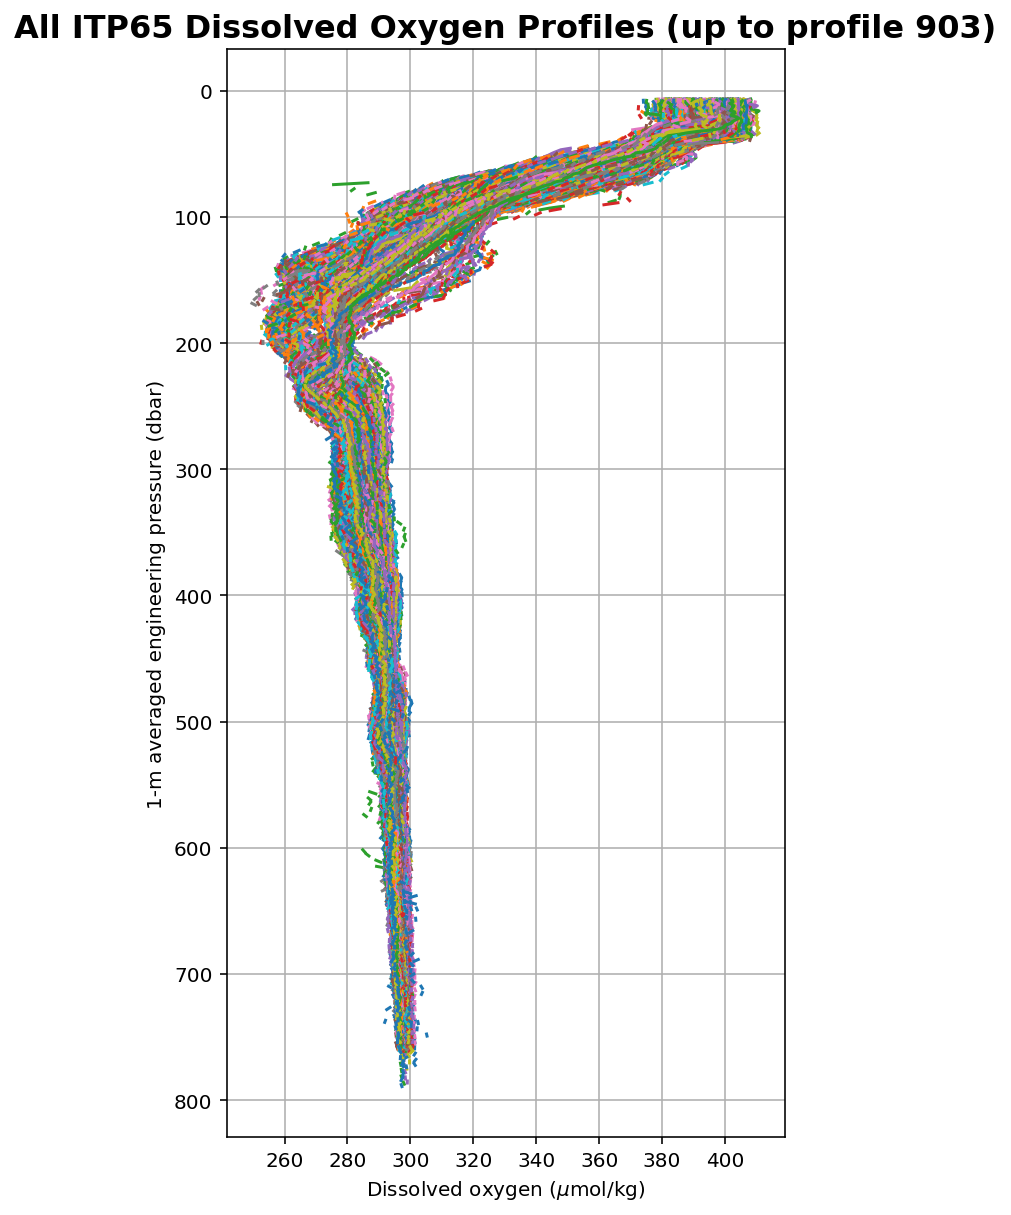

In [7]:
# Dissolved oxygen Profile Plot
nprof=903

fig, ax = plt.subplots(figsize=(5,10))

for x in range(nprof):
    ax.plot(arrays['DO'][x,:], arrays['E'][x,:], label=str(x))
    ax.set_ylabel('1-m averaged engineering pressure (dbar)')
    ax.set_xlabel('Dissolved oxygen ($\mu$mol/kg)')

ax.invert_yaxis()

# Add some gridlines
ax.grid()

# Add a title
ax.set_title('All ITP65 Dissolved Oxygen Profiles (up to profile 903)', fontweight='bold', fontsize=16);

Text(0.5, 1.0, 'Dissolved Oxygen ($\\mu$mol/kg)')

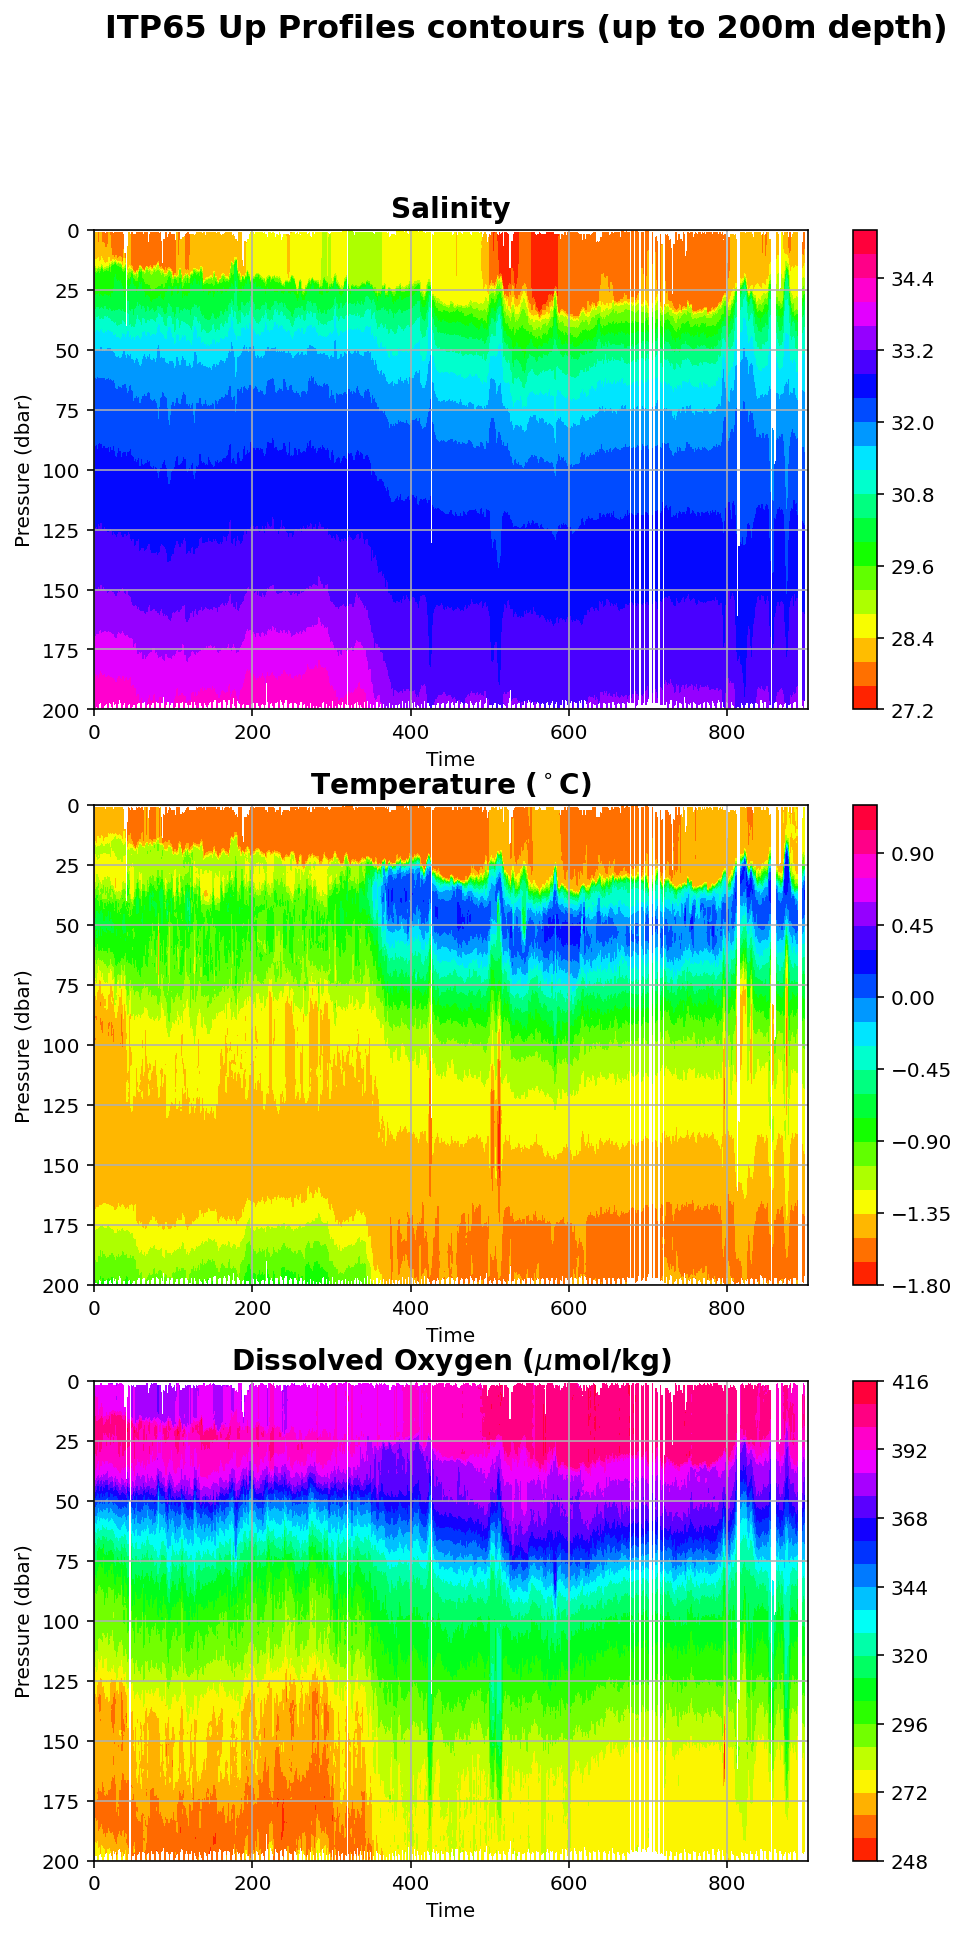

In [8]:
# Plot up contour profiles
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1,ax2,ax3) = plt.subplots(3,1, sharey=True, figsize=(8,15))

cf1=ax1.contourf(np.transpose(arrays['S']),20, cmap='hsv')
ax1.set_ylabel('Pressure (dbar)')
ax1.set_xlabel('Time')
fig.colorbar(cf1, ax=ax1)

cf2=ax2.contourf(np.transpose(arrays['T']),20, cmap='hsv')
ax2.set_ylabel('Pressure (dbar)')
ax2.set_xlabel('Time')
fig.colorbar(cf2, ax=ax2)

cf3=ax3.contourf(np.transpose(arrays['DO']),20, cmap='hsv')
ax3.set_ylabel('Pressure (dbar)')
ax3.set_xlabel('Time')
fig.colorbar(cf3, ax=ax3)

# Add some gridlines
ax1.grid()
ax2.grid()
ax3.grid()

# Limits
ax1.set_ylim([0,200])
ax2.set_ylim([0,200])
ax3.set_ylim([0,200])

ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

# Add a super title
fig.suptitle('ITP65 Up Profiles contours (up to 200m depth)', fontweight='bold', fontsize=16);
ax1.set_title('Salinity', fontweight='bold', fontsize=14)
ax2.set_title('Temperature ($^\circ$C)', fontweight='bold', fontsize=14)
ax3.set_title('Dissolved Oxygen ($\mu$mol/kg)', fontweight='bold', fontsize=14)

### 3.1.2 Density and Specific volume anomaly
Use the equation of state of water, $\rho(S,T,p)$, provided by Gill et al to calculate the corresponding density profiles and specific volume anomaly ($\delta v=v_s\left(S,T,p\right)-v_s\left(35,\ 0,p\right)$,where $v_s\left(S,T,p\right)={\rho(S,T,p)}^{-1}$ is the specific volume).

In [9]:
# Calculate density

Kw = 19652.21 + (148.4206*arrays['T'])-(2.327105*(arrays['T'])**2)+(1.360477*1e-2*(arrays['T'])**3)-(5.155288*1e-5*(arrays['T'])**4)

Ko = Kw +(arrays['S']*(54.6746 - (0.603459*arrays['T']) + (1.09987*arrays['T']**2) - (6.1670*1e-5*arrays['T']**3) )) + ((arrays['S'])**1.5 *((7.944*1e-2)+(1.6483*1e-2*arrays['T'])-(5.3009*1e-4*arrays['T']**2)))

K = Ko+(arrays['P']*(3.239908+(1.437138*1e-3*arrays['T']))+(1.16092*1e-4*arrays['T']**2)-(5.77905*1e-7*arrays['T']**3)) + ((arrays['P'])*arrays['S']*(2.2838*1e-3-(1.0981*1e-5*arrays['T'])-(1.6078*1e-6*arrays['T']**2)))+((arrays['P']**2) *(8.50935*1e-5  -(6.12293*1e-6*arrays['T'])+(5.2787*1e-8*arrays['T']**2)))+((10*arrays['P']**2) * arrays['S']*(-9.9348*1e-7+ (2.0816*1e-8*arrays['T'])-(9.1697*1e-10*arrays['T']**2))) 

In [11]:
# Creating a density function
def density(S, t, p):
    Kw = 19652.21 + (148.4206*t)-(2.327105*t**2)+(1.360477*1e-2*t**3)-(5.155288*1e-5*t**4)
    Ko = Kw +(S*(54.6746 - (0.603459*t) + (1.09987*t**2) - (6.1670*1e-5*t**3) )) + (S**1.5 *((7.944*1e-2)+(1.6483*1e-2*t)-(5.3009*1e-4*t**2)))
    K1 = Ko+(10*p*(3.239908+(1.437138*1e-3*t))+(1.16092*1e-4*t**2)-(5.77905*1e-7*t**3)) + (10*p*S*(2.2838*1e-3-(1.0981*1e-5*t)-(1.6078*1e-6*t**2)))+(10*p**2 *(8.50935*1e-5  -(6.12293*1e-6*t)+(5.2787*1e-8*t**2)))+(10*p**2 * S*(-9.9348*1e-7+ (2.0816*1e-8*t)-(9.1697*1e-10*t**2)))
    return K1

In [12]:
svo = density(35,0,arrays['P'])


In [13]:
# Calculate specific volume anomaly
# Since specific volume is equal to the reciprocal of density

sv = 1/K
print(sv.shape)
# The specific volume anomaly is therefore
sva = sv - (1/svo)
print(sva.shape)

(903, 786)
(903, 786)


Text(0.5, 1.0, 'Specific volume anomaly ($\\mu$mol/kg)')

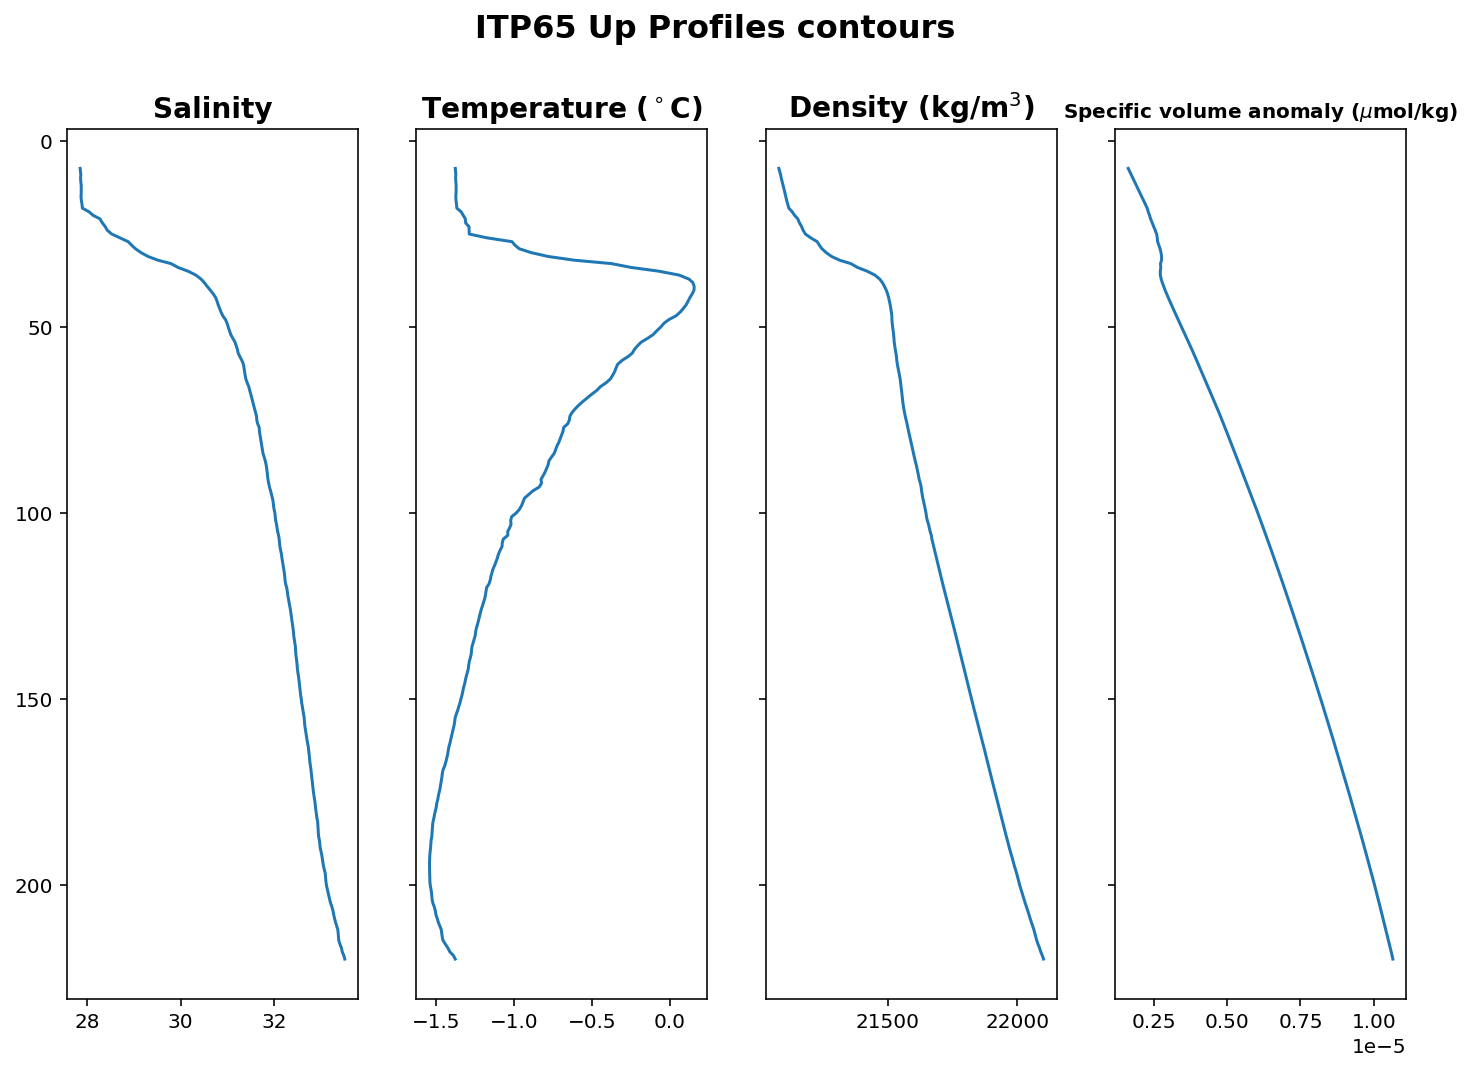

In [14]:
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, sharey=True, figsize=(12,8))

ax1.plot(arrays['S'][902,:],arrays['P'][902,:])
ax2.plot(arrays['T'][902,:],arrays['P'][902,:])
ax3.plot(K[902,:],arrays['P'][902,:])
ax4.plot(sva[902,:],arrays['P'][902,:])

ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

# Add a super title
fig.suptitle('ITP65 Up Profiles contours', fontweight='bold', fontsize=16);
ax1.set_title('Salinity', fontweight='bold', fontsize=14)
ax2.set_title('Temperature ($^\circ$C)', fontweight='bold', fontsize=14)
ax3.set_title('Density (kg/m$^3$)', fontweight='bold', fontsize=14)
ax4.set_title('Specific volume anomaly ($\mu$mol/kg)', fontweight='bold', fontsize=10)

Integrate this specific volume anomaly from the surface to a pressure $p_0=500$ dbar (~500 m) to estimate the geopotential or steric height for this profile. Discuss in line with the findings of Armitage et al (2016) and Barton et al (2020).

I attempted to integrate this and I have failed. I tried sklearn.metrics.auc, np.trapz, among other methods. I hope the effort counts for something...

In [13]:
import scipy.integrate as integrate

# define components for integral calculation
lower_bound = arrays['P'][902,2]
upper_bound = arrays['P'][902,200]

f = sva

# calculate integral
integral, error = integrate.quad(f, lower_bound, upper_bound)
print(integral)

ValueError: invalid callable given

Since I could not compute the steric height of the ITP, I will be discussing the the variation of steric height based on the two papers.

Geopotential height refers to the actual height of a pressure surface above mean sea level, whereas steric height is  affected  by changes in density of water column, such as by temperature and salinity. Geopotential height is calculated from the ITP data, as the integration of specific volume anomaly by pressure. Steric height, on the other hand, is estimated from altimeters.

Armitrage et al saw that there was good agreement of steric height with geopotential height from ITP data. Steric height also varies seasonally, and steric heigh variations account for the majority of the Arctic SSH seasonal cycle.

## 3.2 Argo float

Unfortunately, the drifter data do not include sufficient data to plot the graphs below, and thus the sample dataset (nodc_5906017_prof.nc) was used for this section. This Argo float data is taken from the Pacific Ocean, near the Tropic of Cancer.

In [15]:
# Notebook setup
import xarray as xr
# !pip install netcdf4

import matplotlib.pyplot as plt

In [16]:
# We download a datafile to our server
!wget https://data.nodc.noaa.gov/argo/gadr/data/aoml/5906017/nodc_5906017_prof.nc

--2021-03-28 16:50:52--  https://data.nodc.noaa.gov/argo/gadr/data/aoml/5906017/nodc_5906017_prof.nc
Resolving data.nodc.noaa.gov (data.nodc.noaa.gov)... 205.167.25.167, 205.167.25.177, 205.167.25.172, ...
Connecting to data.nodc.noaa.gov (data.nodc.noaa.gov)|205.167.25.167|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ncei.noaa.gov/data/oceans/argo/gadr/data/aoml/5906017/nodc_5906017_prof.nc [following]
--2021-03-28 16:50:53--  https://www.ncei.noaa.gov/data/oceans/argo/gadr/data/aoml/5906017/nodc_5906017_prof.nc
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.172, 205.167.25.171, 205.167.25.167, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1412680 (1.3M) [application/x-netcdf]
Saving to: ‘nodc_5906017_prof.nc’

nodc_5906017_prof.n 100%[===================>]   1.35M  6.68MB/s    in 0.2s    

2021-03-28 16:50:53 (6.68

In [17]:
# Load the dataset using xarray
data = xr.open_dataset('Argo/nodc_5906017_prof.nc')
data

<xarray.Dataset>
Dimensions:                       (n_calib: 1, n_history: 0, n_levels: 511, n_param: 3, n_prof: 66)
Dimensions without coordinates: n_calib, n_history, n_levels, n_param, n_prof
Data variables:
    data_type                     object ...
    format_version                object ...
    handbook_version              object ...
    reference_date_time           object ...
    date_creation                 object ...
    date_update                   object ...
    platform_number               (n_prof) object ...
    project_name                  (n_prof) object ...
    pi_name                       (n_prof) object ...
    station_parameters            (n_prof, n_param) object ...
    cycle_number                  (n_prof) float64 ...
    direction                     (n_prof) object ...
    data_centre                   (n_prof) object ...
    dc_reference                  (n_prof) object ...
    data_state_indicator          (n_prof) object ...
    data_mode                     (n_prof) object ...
    platform_type                 (n_prof) object ...
    float_serial_no               (n_prof) object ...
    firmware_version              (n_prof) object ...
    wmo_inst_type                 (n_prof) object ...
    juld                          (n_prof) datetime64[ns] ...
    juld_qc                       (n_prof) object ...
    juld_location                 (n_prof) datetime64[ns] ...
    latitude                      (n_prof) float64 ...
    longitude                     (n_prof) float64 ...
    position_qc                   (n_prof) object ...
    positioning_system            (n_prof) object ...
    profile_pres_qc               (n_prof) object ...
    profile_temp_qc               (n_prof) object ...
    profile_psal_qc               (n_prof) object ...
    vertical_sampling_scheme      (n_prof) object ...
    config_mission_number         (n_prof) float64 ...
    pres                          (n_prof, n_levels) float32 ...
    pres_qc                       (n_prof, n_levels) object ...
    pres_adjusted                 (n_prof, n_levels) float32 ...
    pres_adjusted_qc              (n_prof, n_levels) object ...
    pres_adjusted_error           (n_prof, n_levels) float32 ...
    temp                          (n_prof, n_levels) float32 ...
    temp_qc                       (n_prof, n_levels) object ...
    temp_adjusted                 (n_prof, n_levels) float32 ...
    temp_adjusted_qc              (n_prof, n_levels) object ...
    temp_adjusted_error           (n_prof, n_levels) float32 ...
    psal                          (n_prof, n_levels) float32 ...
    psal_qc                       (n_prof, n_levels) object ...
    psal_adjusted                 (n_prof, n_levels) float32 ...
    psal_adjusted_qc              (n_prof, n_levels) object ...
    psal_adjusted_error           (n_prof, n_levels) float32 ...
    parameter                     (n_prof, n_calib, n_param) object ...
    scientific_calib_equation     (n_prof, n_calib, n_param) object ...
    scientific_calib_coefficient  (n_prof, n_calib, n_param) object ...
    scientific_calib_comment      (n_prof, n_calib, n_param) object ...
    scientific_calib_date         (n_prof, n_calib, n_param) object ...
    history_institution           (n_history, n_prof) object ...
    history_step                  (n_history, n_prof) object ...
    history_software              (n_history, n_prof) object ...
    history_software_release      (n_history, n_prof) object ...
    history_reference             (n_history, n_prof) object ...
    history_date                  (n_history, n_prof) object ...
    history_action                (n_history, n_prof) object ...
    history_parameter             (n_history, n_prof) object ...
    history_start_pres            (n_history, n_prof) float32 ...
    history_stop_pres             (n_history, n_prof) float32 ...
    history_previous_value        (n_history, n_prof) float32 ...
    history_qctest                (n_hi

### 3.2.1 Temperature, salinity and density profiles as a function of depth/pressure


Text(0.5, 1.0, 'Timeseries profile plot of temperature ($^\\circ$C)')

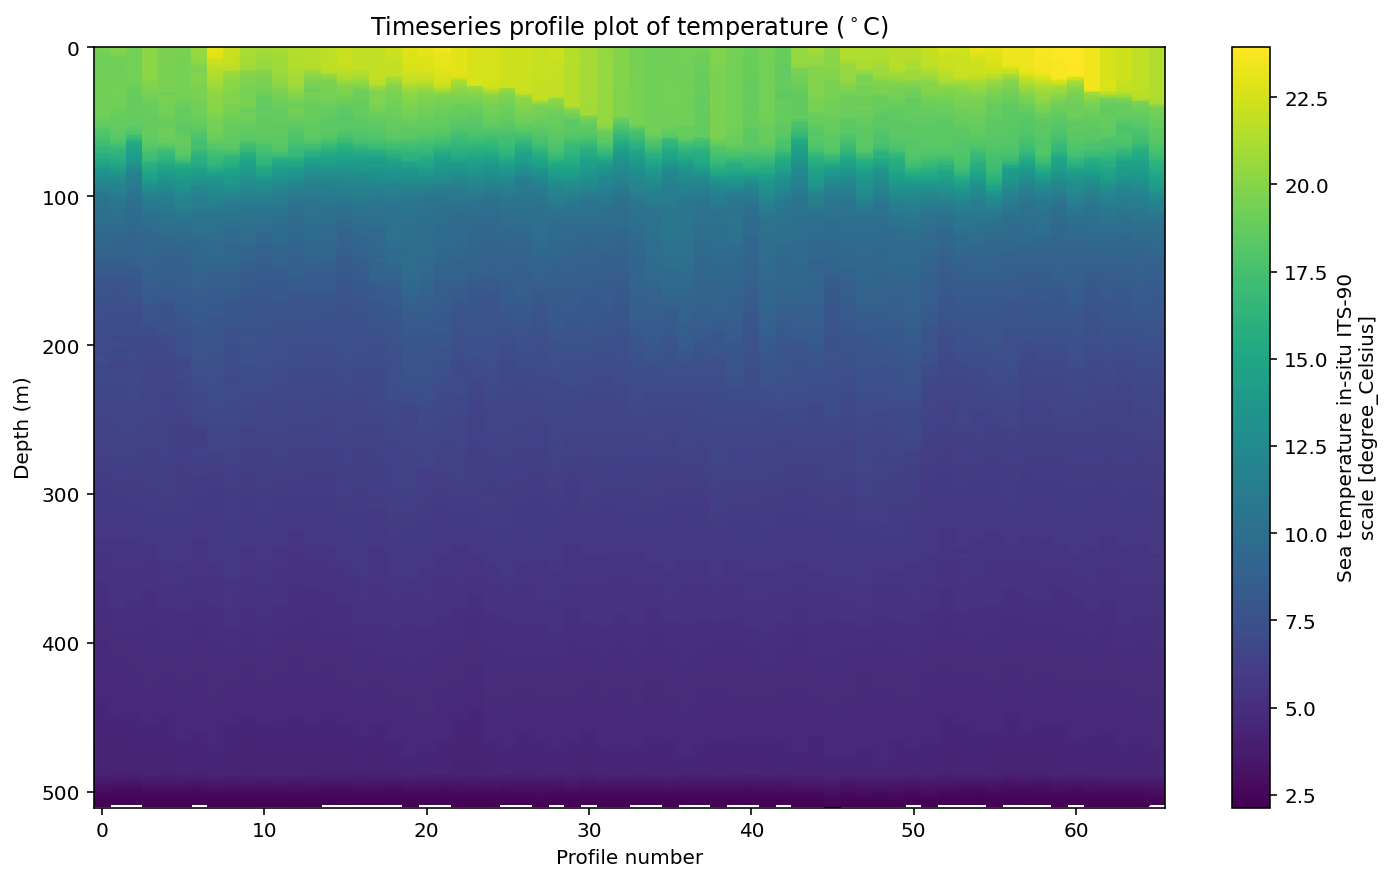

In [18]:
# Quick Timeseries Profile plot of Temperature
data.temp.T.plot()
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Profile number')
plt.title('Timeseries profile plot of temperature ($^\circ$C)')

The graph above shows that the temperature profile with pressure/depth remained generally unchanged over the float's time coverage (23 March 2019 to 12 December 2020).
However, the most variation occurs in the top 100m of the ocean. The ocean surface appears to increase in temperature to $>22.5^\circ$ twice, corresponding to the second half of the year. It then drops abruptly to about less than 20$^\circ$. 

This is probably attributed to the seasonal sea surface temperature variation. The ocean absorbs heat in the summertime (June-Aug), and continues to warm the surface layer. Over time, the surface temperatures drop, cooling the surface layer rapidly from the top-down (as seen in the figure).

Text(0.5, 1.0, 'Timeseries profile plot of salinity')

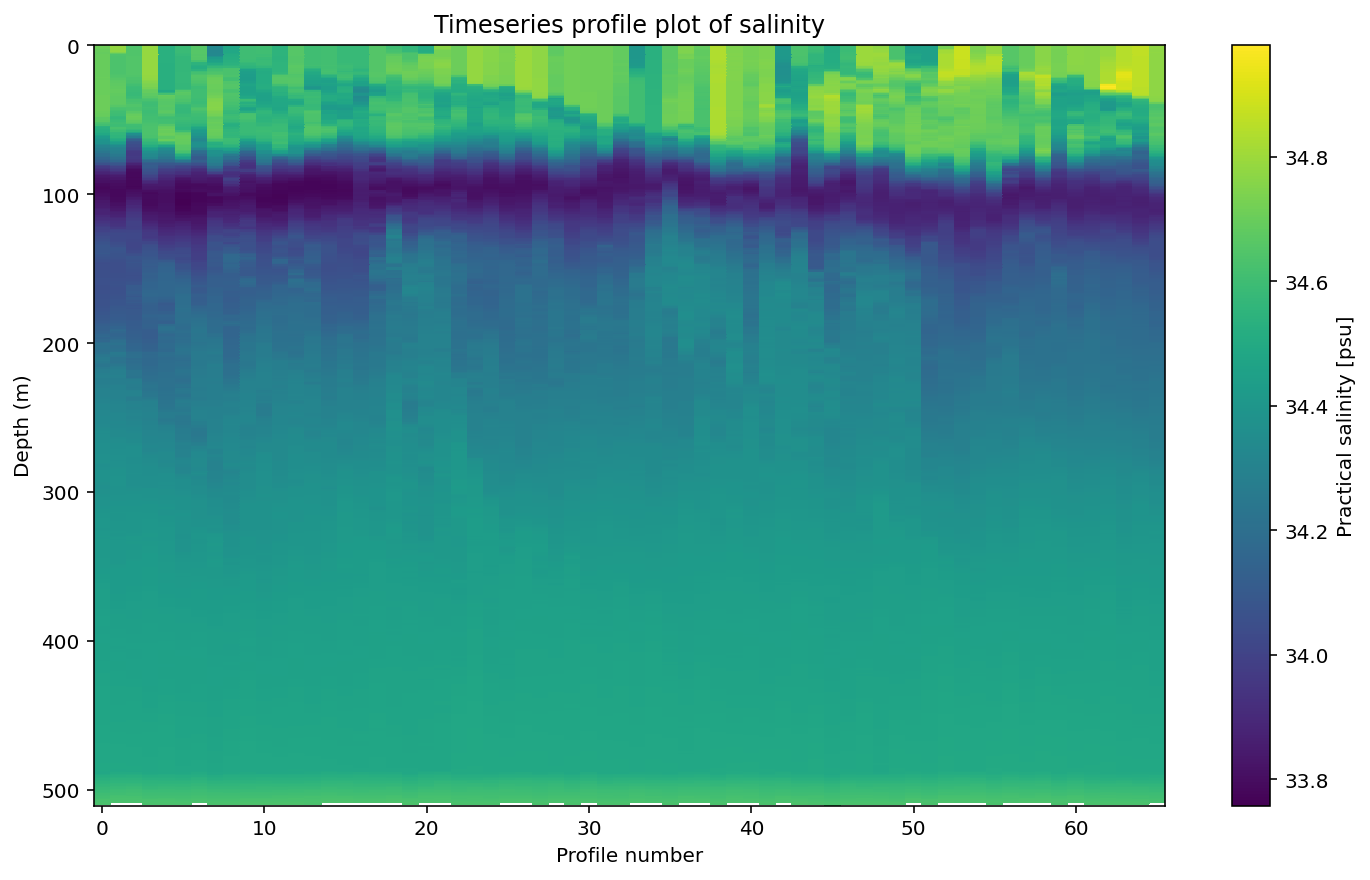

In [19]:
# Quick Timeseries Profile plot of Salinity
data.psal.T.plot()
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Profile number')
plt.title('Timeseries profile plot of salinity')

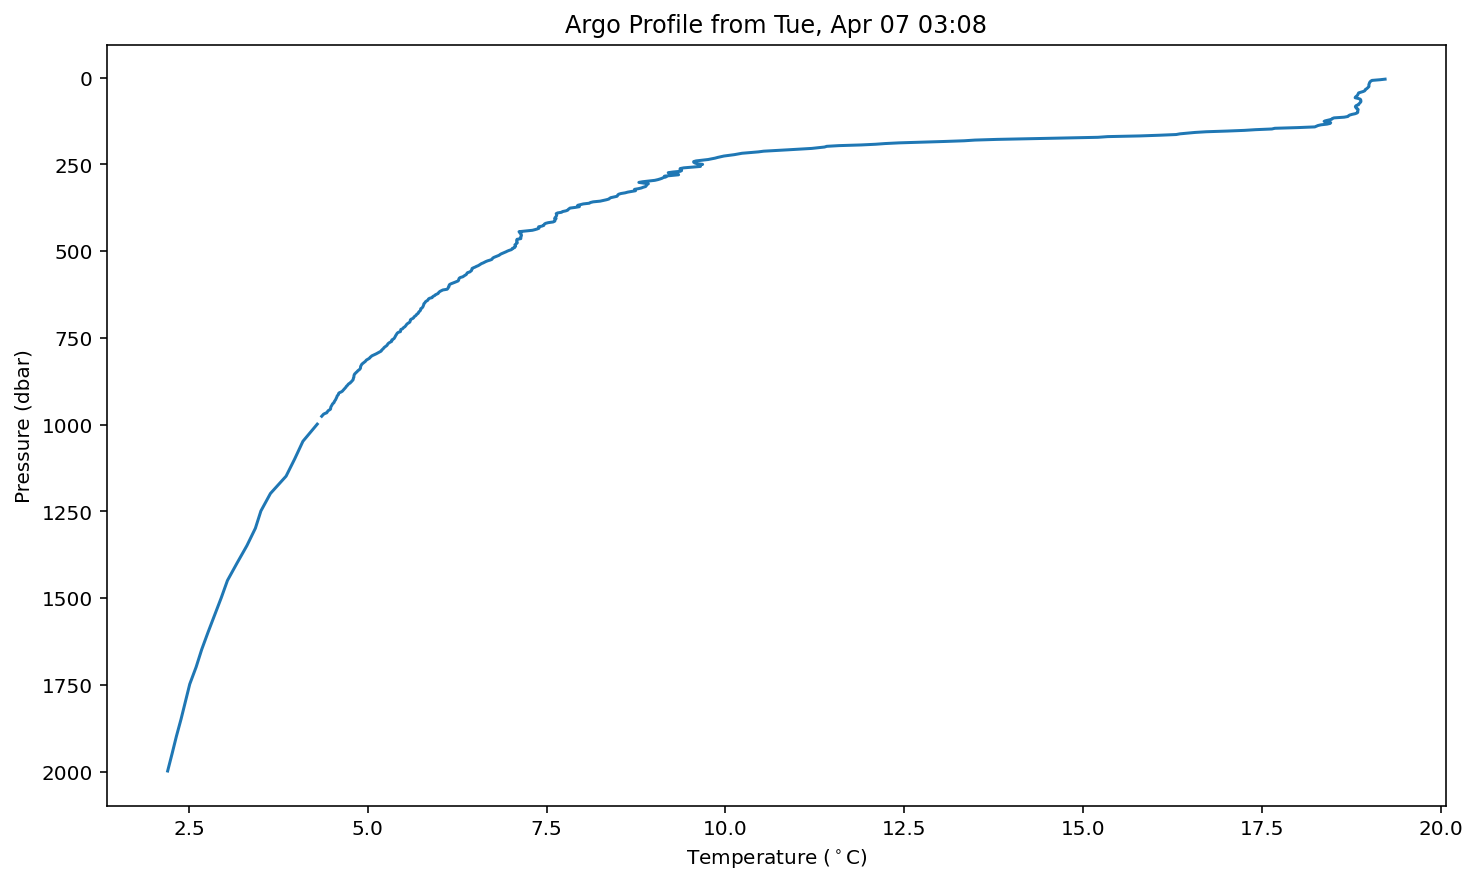

In [20]:
# Profile Plot
nprof = 40 #Specify a profile to plot
plt.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof])

plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Pressure (dbar)')
plt.title('Argo Profile from %s' % data.juld[nprof].dt.strftime('%a, %b %d %H:%M').values)

plt.gca().invert_yaxis()

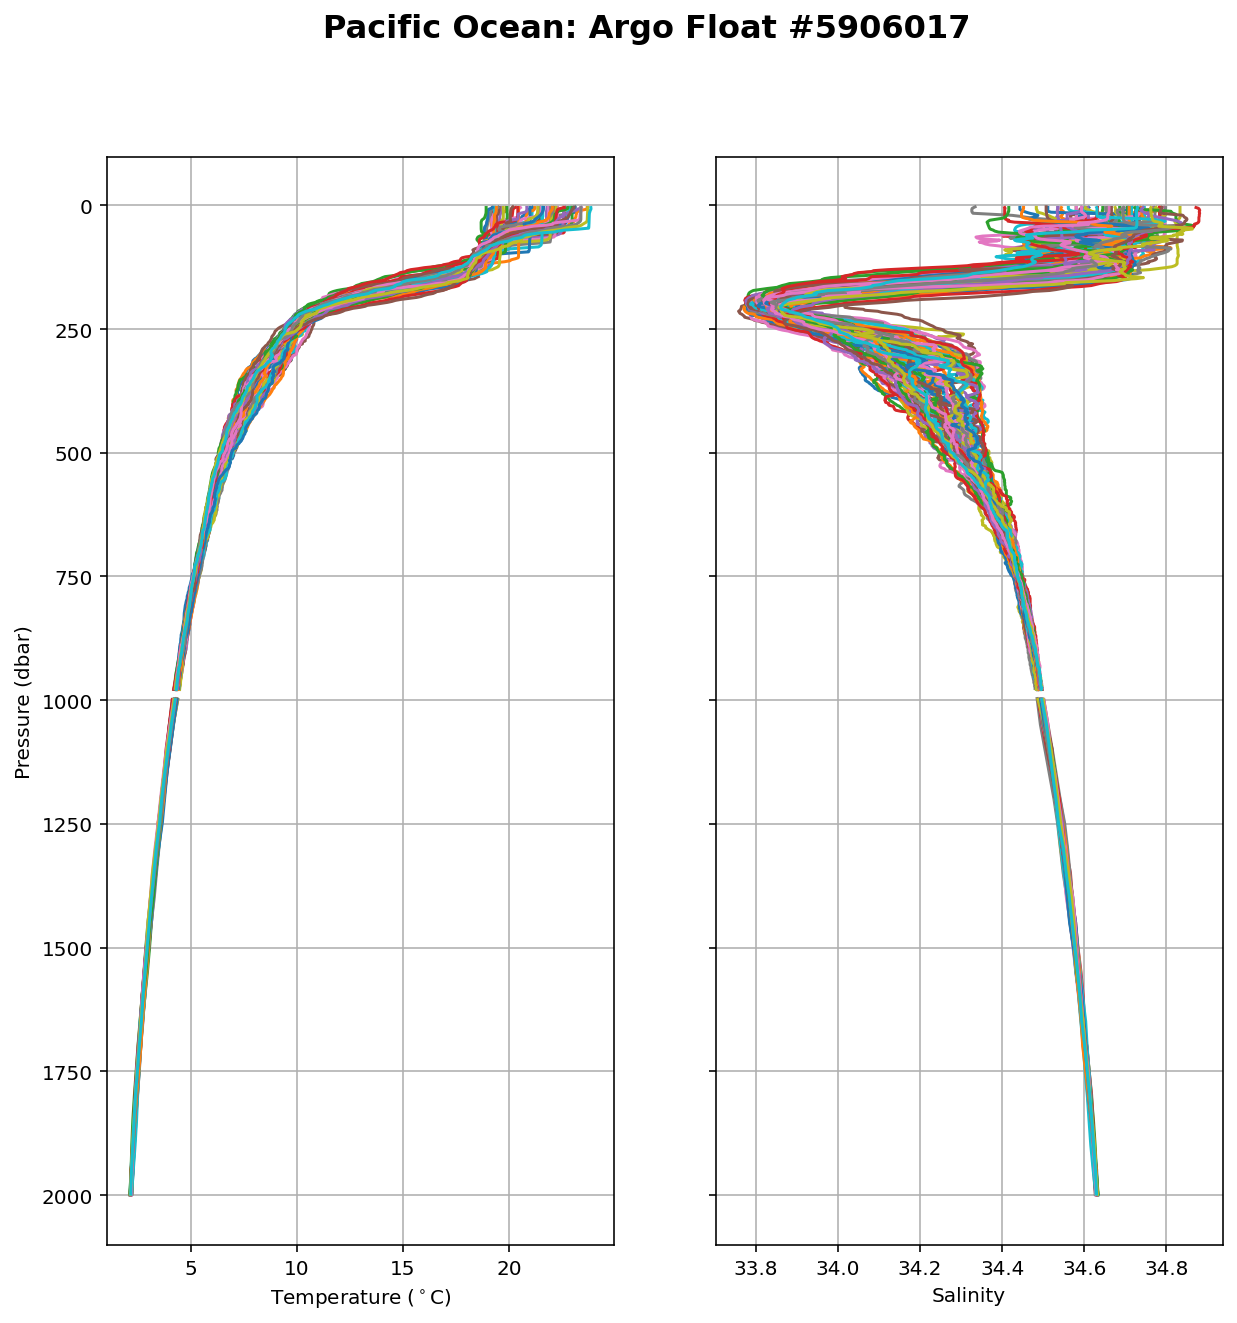

In [21]:
# Temperature and Salinity profiles of Pacific Ocean
nprof=60

fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,10))

for x in range(nprof):
    ax1.plot(data.temp_adjusted[x], data.pres_adjusted[x],
    label=data.juld[x].dt.strftime('%Y-%m-%d').values)
    ax2.plot(data.psal_adjusted[x], data.pres_adjusted[x])
    ax1.set_ylabel('Pressure (dbar)')
    ax1.set_xlabel('Temperature ($^\circ$C)')
    ax2.set_xlabel('Salinity')

ax1.invert_yaxis()

# Add some gridlines
ax1.grid()
ax2.grid()

# Add a super title
fig.suptitle('Pacific Ocean: Argo Float #%d' % data.platform_number[nprof].values, fontweight='bold', fontsize=16);

#### Now let's plot the same graphs in the other oceans.

•	Plot the T-S profiles in different oceans and discuss in line with what we learned in class

Here I plot the T-S profiles in the Atlantic, Indian and Southern Oceans. As shown in the figures below, the temperature profiles follow the same general shape. The Atlantic, Pacific and Indian oceans have a sea surface temperature of around $20-25^o$C. The ocean temperature then dips rapidly to asymptote to about $2.5^o$C. However, the Southern ocean surface temperature ranges from $-2$ to $3^o$C, and the ocean temperature at 100-250m is approximately $2^o$C. Then it gradually decreases to $1^o$C at 2000m depth. This sea surface temperature range is probably due to seasonal variation.

The values of salinity vary in the different oceans, and the salinity profiles differ.

The stark difference between ocean surface T-S conditions at the T-S conditions at depth reveals ocean stratification.

### Atlantic Ocean

In [22]:
# Retrieve data from Argo Float #5905986 (Atlantic Ocean)
!wget https://nrlgodae1.nrlmry.navy.mil/pub/outgoing/argo/dac/aoml/5905986/5905986_prof.nc

--2021-02-06 23:26:38--  https://nrlgodae1.nrlmry.navy.mil/pub/outgoing/argo/dac/aoml/5905986/5905986_prof.nc
Resolving nrlgodae1.nrlmry.navy.mil (nrlgodae1.nrlmry.navy.mil)... 199.9.2.160, 2001:480:200:22::2:160
Connecting to nrlgodae1.nrlmry.navy.mil (nrlgodae1.nrlmry.navy.mil)|199.9.2.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3287406 (3.1M) [application/x-netcdf]
Saving to: ‘5905986_prof.nc.2’

5905986_prof.nc.2   100%[===================>]   3.13M  1.68MB/s    in 1.9s    

2021-02-06 23:26:40 (1.68 MB/s) - ‘5905986_prof.nc.2’ saved [3287406/3287406]



In [23]:
atl = xr.open_dataset('5905986_prof.nc')

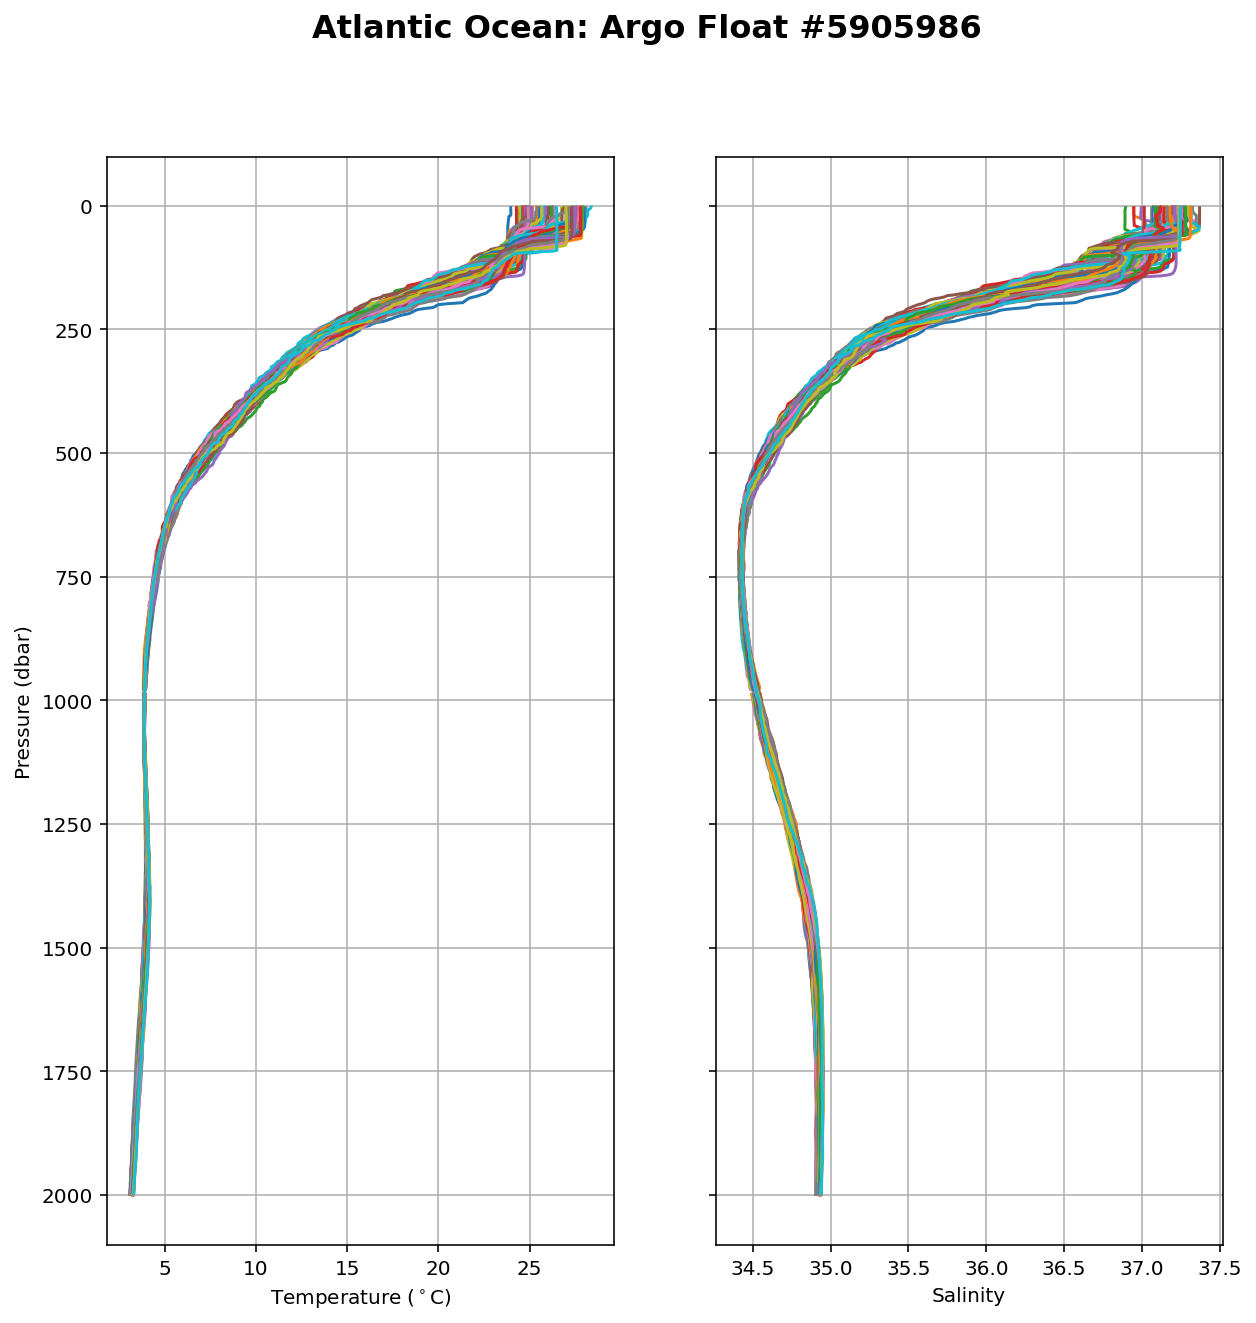

In [24]:
# To prevent using up memory space, I restrict the range to a maximum of 90 profiles.

NPROF=90

fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,10))

for x in range(NPROF):
    ax1.plot(atl.TEMP_ADJUSTED[x], atl.PRES_ADJUSTED[x],
    label=atl.JULD[x].dt.strftime('%Y-%m-%d').values)
    ax2.plot(atl.PSAL_ADJUSTED[x], atl.PRES_ADJUSTED[x])
    ax1.set_ylabel('Pressure (dbar)')
    ax1.set_xlabel('Temperature ($^\circ$C)')
    ax2.set_xlabel('Salinity')

ax1.invert_yaxis()

# Add some gridlines
ax1.grid()
ax2.grid()

# Add a super title
fig.suptitle('Atlantic Ocean: Argo Float #%d' % atl.PLATFORM_NUMBER[NPROF].values, fontweight='bold', fontsize=16);

### Indian Ocean

In [0]:
# Retrieve data from Argo Float #5906281 (Indian Ocean)
!wget https://nrlgodae1.nrlmry.navy.mil/pub/outgoing/argo/dac/aoml/5906281/5906281_prof.nc

In [25]:
ind = xr.open_dataset('5906281_prof.nc')

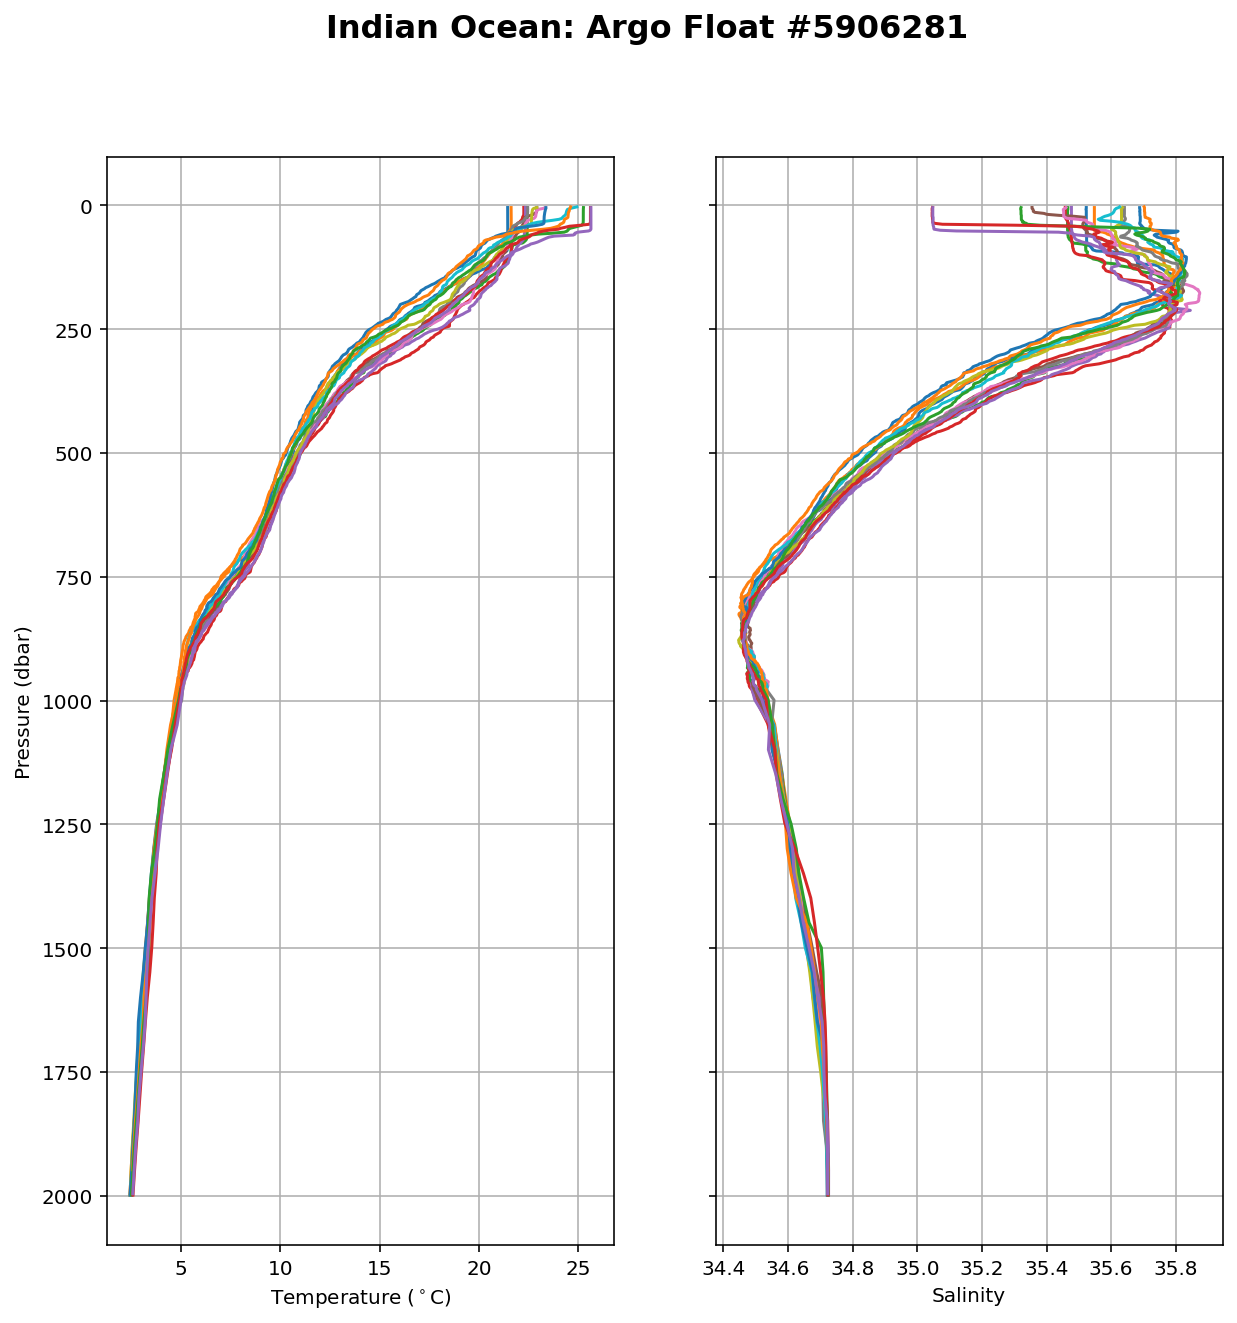

In [26]:
NPROF=15

fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,10))

for x in range(NPROF):
    ax1.plot(ind.TEMP_ADJUSTED[x], ind.PRES_ADJUSTED[x],
    label=ind.JULD[x].dt.strftime('%Y-%m-%d').values)
    ax2.plot(ind.PSAL_ADJUSTED[x], ind.PRES_ADJUSTED[x])
    ax1.set_ylabel('Pressure (dbar)')
    ax1.set_xlabel('Temperature ($^\circ$C)')
    ax2.set_xlabel('Salinity')

ax1.invert_yaxis()

# Add some gridlines
ax1.grid()
ax2.grid()

# Add a super title
fig.suptitle('Indian Ocean: Argo Float #%d' % ind.PLATFORM_NUMBER[NPROF].values, fontweight='bold', fontsize=16);

### Southern Ocean

In [0]:
# Retrieve data from Argo Float #7900067 (Southern Ocean)
!wget https://nrlgodae1.nrlmry.navy.mil/pub/outgoing/argo/dac/aoml/7900067/7900067_prof.nc

In [31]:
sou = xr.open_dataset('7900067_prof.nc')

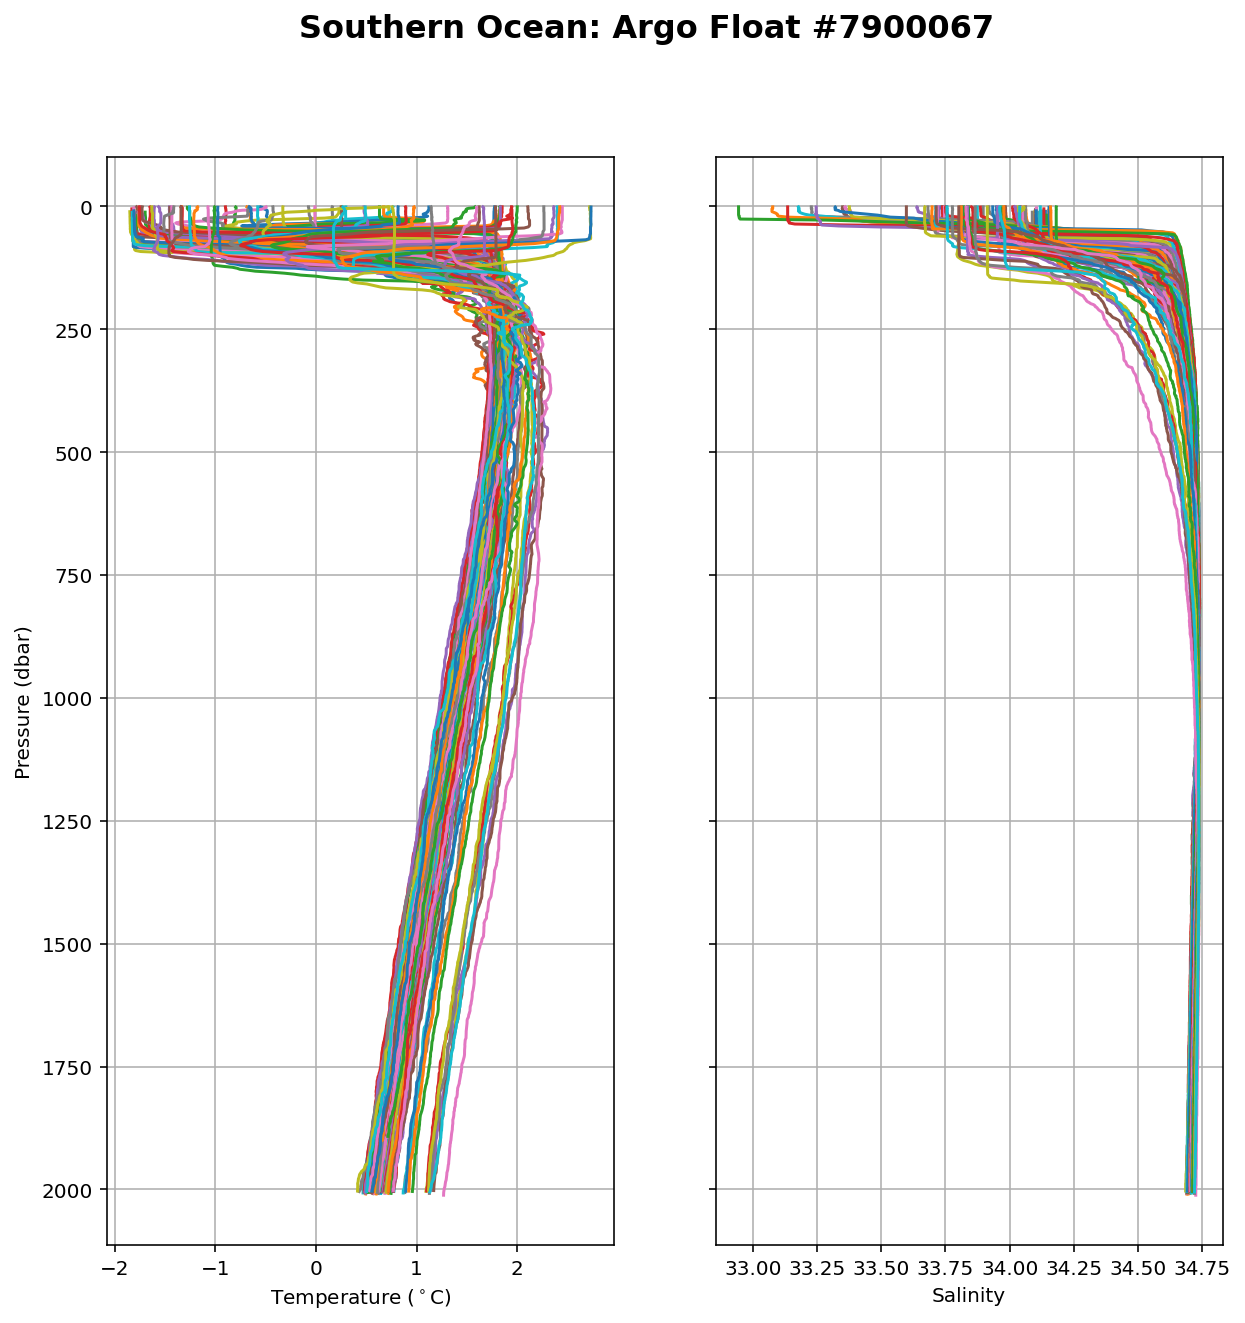

In [32]:
# To prevent using up memory space, I restrict the range to a maximum of 90 profiles.

NPROF=90

fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,10))

for x in range(NPROF):
    ax1.plot(sou.TEMP_ADJUSTED[x], sou.PRES_ADJUSTED[x],
    label=sou.JULD[x].dt.strftime('%Y-%m-%d').values)
    ax2.plot(sou.PSAL_ADJUSTED[x], sou.PRES_ADJUSTED[x])
    ax1.set_ylabel('Pressure (dbar)')
    ax1.set_xlabel('Temperature ($^\circ$C)')
    ax2.set_xlabel('Salinity')
    
ax1.invert_yaxis()

# Add some gridlines
ax1.grid()
ax2.grid()

# Add a super title
fig.suptitle('Southern Ocean: Argo Float #%d' % sou.PLATFORM_NUMBER[NPROF].values, fontweight='bold', fontsize=16);

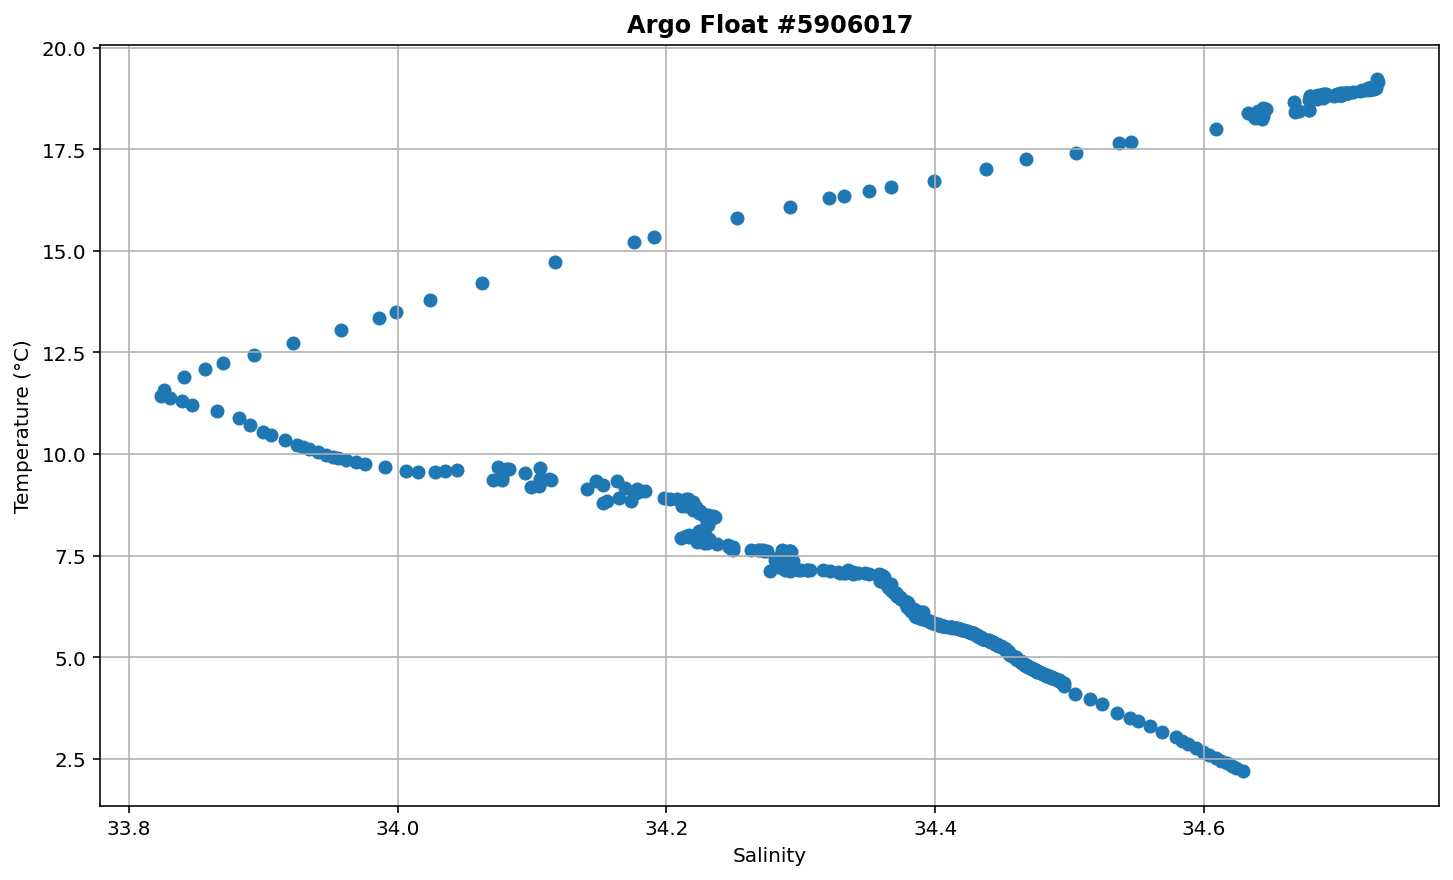

In [34]:
# TS Diagram
nprof = 40 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof])
plt.xlabel('Salinity')
plt.ylabel('Temperature (°C)')
plt.grid()

plt.title('Argo Float #%d' % data.platform_number[nprof].values, fontweight='bold');

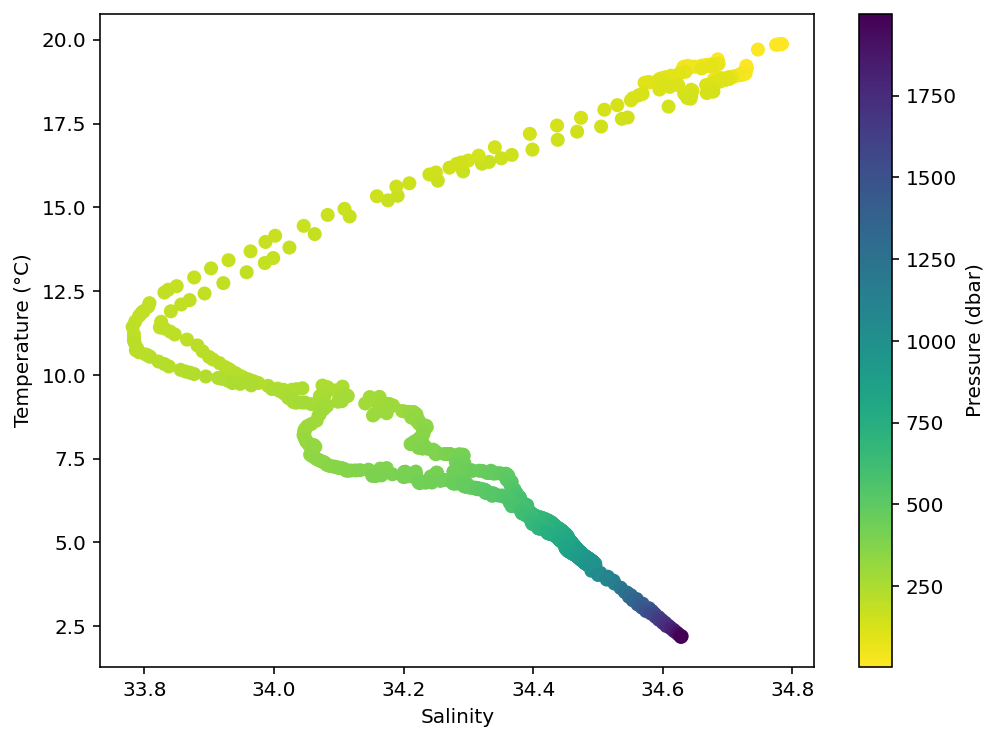

In [36]:
# T-S Diagram with depth
plt.figure(figsize=(8,6))

nprof = 40 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof], c=data.pres_adjusted[nprof], cmap='viridis_r')
plt.xlabel('Salinity');
plt.ylabel('Temperature (°C)')


nprof = 1 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof], c=data.pres_adjusted[nprof], cmap='viridis_r')
plt.xlabel('Salinity');
plt.ylabel('Temperature (°C)')


cbh = plt.colorbar();
cbh.set_label('Pressure (dbar)')

<span style="color:green">Code is compiling well. Good discussion of main results. Super work with the densities (shame for the integrations). Score = 2.6/3</span>

# 6. Shallow water waves

6.a) Make sure you are able to run the python codes in Waves and copy into your assignment the parts that are relevant. Part6.ipynb contains some further information on how to execute some of this code. Note that for this practical I am following questions taken from here http://www.met.reading.ac.uk/~swrhgnrj/shallow_water_model/swe_notes.pdf. Test the model as discussed in swe_notes.pdf section 3.

6.b) Look at the model formulation Section 2 in swe_notes.pdf and compare with the description seen in class. Modify the code in Waves/shallow_water_model.py to retrieve the equations seen in class and compare your two results with plots of the transient and stationary solution to the non-rotating and rotating cases.

6.c) Answer the questions of section 4 of swe_notes.pdf (Gravity waves). Illustrate your answers with plots. How do your results look like in the non-rotating case (f=0)?

6.d) Answer the questions of section 5 of swe_notes.pdf (Orographic Rossby waves). Illustrate your answers with plots.


In [44]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

#### To create an animation, we have to take the following steps:
1. Key in the data for the plot
2. Create an empty figure to plot our data
3. Create a function animate
4. Use FuncAnimation to run an animation

In [45]:
def lax_wendroff(dx, dy, dt, g, u, v, h, u_tendency, v_tendency):

   # This function performs one timestep of the Lax-Wendroff scheme
   # applied to the shallow water equations

   # First work out mid-point values in time and space
   uh = u*h;
   vh = v*h;

   h_mid_xt = 0.5*(h[1:,:]+h[0:-1,:]) \
      -(0.5*dt/dx)*(uh[1:,:]-uh[0:-1,:]);
   h_mid_yt = 0.5*(h[:,1:]+h[:,0:-1]) \
      -(0.5*dt/dy)*(vh[:,1:]-vh[:,0:-1]);

   Ux = uh*u+0.5*g*h**2.;
   Uy = uh*v;
   uh_mid_xt = 0.5*(uh[1:,:]+uh[0:-1,:]) \
      -(0.5*dt/dx)*(Ux[1:,:]-Ux[0:-1,:]);
   uh_mid_yt = 0.5*(uh[:,1:]+uh[:,0:-1]) \
      -(0.5*dt/dy)*(Uy[:,1:]-Uy[:,0:-1]);

   Vx = Uy;
   Vy = vh*v+0.5*g*h**2.;
   vh_mid_xt = 0.5*(vh[1:,:]+vh[0:-1,:]) \
      -(0.5*dt/dx)*(Vx[1:,:]-Vx[0:-1,:]);
   vh_mid_yt = 0.5*(vh[:,1:]+vh[:,0:-1]) \
      -(0.5*dt/dy)*(Vy[:,1:]-Vy[:,0:-1]);

   # Now use the mid-point values to predict the values at the next
   # timestep
   h_new = h[1:-1,1:-1] \
      - (dt/dx)*(uh_mid_xt[1:,1:-1]-uh_mid_xt[0:-1,1:-1]) \
      - (dt/dy)*(vh_mid_yt[1:-1,1:]-vh_mid_yt[1:-1,0:-1]);


   Ux_mid_xt = uh_mid_xt*uh_mid_xt/h_mid_xt + 0.5*g*h_mid_xt**2.;
   Uy_mid_yt = uh_mid_yt*vh_mid_yt/h_mid_yt;
   uh_new = uh[1:-1,1:-1] \
      - (dt/dx)*(Ux_mid_xt[1:,1:-1]-Ux_mid_xt[0:-1,1:-1]) \
      - (dt/dy)*(Uy_mid_yt[1:-1,1:]-Uy_mid_yt[1:-1,0:-1]) \
      + dt*u_tendency*0.5*(h[1:-1,1:-1]+h_new);


   Vx_mid_xt = uh_mid_xt*vh_mid_xt/h_mid_xt;
   Vy_mid_yt = vh_mid_yt*vh_mid_yt/h_mid_yt + 0.5*g*h_mid_yt**2.;
   vh_new = vh[1:-1,1:-1] \
      - (dt/dx)*(Vx_mid_xt[1:,1:-1]-Vx_mid_xt[0:-1,1:-1]) \
      - (dt/dy)*(Vy_mid_yt[1:-1,1:]-Vy_mid_yt[1:-1,0:-1]) \
      + dt*v_tendency*0.5*(h[1:-1,1:-1]+h_new);
   u_new = uh_new/h_new;
   v_new = vh_new/h_new;
   
   return (u_new, v_new, h_new)

In [46]:
# SHALLOW WATER MODEL
# Copyright (c) 2017 by Paul Connolly
#
# Copying and distribution of this file, with or without modification,
# are permitted in any medium without royalty provided the copyright
# notice and this notice are preserved.  This file is offered as-is,
# without any warranty.
#
# This model integrates the shallow water equations in conservative form
# in a channel using the Lax-Wendroff method.  It can be used to
# illustrate a number of meteorological phenomena.

# ------------------------------------------------------------------
import numpy as np
import sys
from scipy.special import erfcinv as erfcinv
import tqdm as tqdm
import time
import scipy.io as sio
#import lax_wendroff as lw

# SECTION 0: Definitions (normally don't modify this section)

# Possible initial conditions of the height field
UNIFORM_WESTERLY=1;
ZONAL_JET=2;
REANALYSIS=3;
GAUSSIAN_BLOB=4;
STEP=5;
CYCLONE_IN_WESTERLY=6;
SHARP_SHEAR=7;
EQUATORIAL_EASTERLY=8;
SINUSOIDAL=9;

# Possible orographies
FLAT=0;
SLOPE=1;
GAUSSIAN_MOUNTAIN=2;
EARTH_OROGRAPHY=3;
SEA_MOUNT=4;

# ------------------------------------------------------------------
# SECTION 1: Configuration
g    = 9.81;                # Acceleration due to gravity (m/s2)
f    = 1e-4;              # Coriolis parameter (s-1)
#f=0.;
beta = 1.6e-11;             # Meridional gradient of f (s-1m-1)
#beta=0.;
#beta=5e-10;

dt_mins              = 1.;   # Timestep (minutes)
output_interval_mins = 60.;  # Time between outputs (minutes)
forecast_length_days = 4.;   # Total simulation length (days)

orography = FLAT
initial_conditions = GAUSSIAN_BLOB;
initially_geostrophic = True;   # Can be "True" or "False"
add_random_height_noise = False; # Can be "True" or "False"

# If you change the number of gridpoints then orography=EARTH_OROGRAPHY
# or initial_conditions=REANALYSIS won't work
nx=254; # Number of zonal gridpoints
ny=50;  # Number of meridional gridpoints

dx=100.0e3; # Zonal grid spacing (m)
dy=dx;      # Meridional grid spacing

# Specify the range of heights to plot in metres
plot_height_range = np.array([9500., 10500.]);

In [47]:
# SECTION 2: Act on the configuration information
dt = dt_mins*60.0; # Timestep (s)
output_interval = output_interval_mins*60.0; # Time between outputs (s)
forecast_length = forecast_length_days*24.0*3600.0; # Forecast length (s)
nt = int(np.fix(forecast_length/dt)+1); # Number of timesteps
timesteps_between_outputs = np.fix(output_interval/dt);
noutput = int(np.ceil(nt/timesteps_between_outputs)); # Number of output frames

x=np.mgrid[0:nx]*dx; # Zonal distance coordinate (m)
y=np.mgrid[0:ny]*dy; # Meridional distance coordinate (m)
[Y,X] = np.meshgrid(y,x); # Create matrices of the coordinate variables

# animation function. This is called sequentially
# i is the number of the frame, which leads to one full "circle"
def animate(i):
    dt = dt_mins*60.0; # Timestep (s)
    output_interval = output_interval_mins*60.0; # Time between outputs (s)
    forecast_length = forecast_length_days*24.0*3600.0; # Forecast length (s)
    nt = int(np.fix(forecast_length/dt)+1); # Number of timesteps
    timesteps_between_outputs = np.fix(output_interval/dt);
    noutput = int(np.ceil(nt/timesteps_between_outputs)); # Number of output frames
    
    x=np.mgrid[0:nx]*dx; # Zonal distance coordinate (m)
    y=np.mgrid[0:ny]*dy; # Meridional distance coordinate (m)
    [Y,X] = np.meshgrid(y,x); # Create matrices of the coordinate variables
    plot_height_range = np.array([9500., 10500.]);
    return plt.show()

# Create the orography field "H"
if orography == FLAT:
   H = np.zeros((nx, ny));
elif orography == SLOPE:
   H = 9000.*2.*np.abs((np.mean(x)-X)/np.max(x));
elif orography == GAUSSIAN_MOUNTAIN:
   std_mountain_x = 5.*dx; # Std. dev. of mountain in x direction (m)
   std_mountain_y = 5.*dy; # Std. dev. of mountain in y direction (m)
   H = 4000.*np.exp(-0.5*((X-np.mean(x))/std_mountain_x)**2. \
                  -0.5*((Y-np.mean(y))/std_mountain_y)**2.);
elif orography == SEA_MOUNT:
   std_mountain = 40.0*dy; # Standard deviation of mountain (m)
   H = 9250.*np.exp(-((X-np.mean(x))**2.+(Y-0.5*np.mean(y))**2.)/(2.*std_mountain**2.));
elif orography == EARTH_OROGRAPHY:
   mat_contents = sio.loadmat('digital_elevation_map.mat')
   H = mat_contents['elevation'];
   # Enforce periodic boundary conditions in x
   H[[0, -1],:]=H[[-2, 1],:];
else:
   print('Don''t know what to do with orography=' + np.num2str(orography)); 
   sys.exit()

# Create the initial height field 
if initial_conditions == UNIFORM_WESTERLY:
   mean_wind_speed = 20.; # m/s
   height = 10000.-(mean_wind_speed*f/g)*(Y-np.mean(y)); 
elif initial_conditions == SINUSOIDAL:
   height = 10000.-350.*np.cos(Y/np.max(y)*4.*np.pi);
elif initial_conditions == EQUATORIAL_EASTERLY:
   height = 10000. - 50.*np.cos((Y-np.mean(y))*4.*np.pi/np.max(y));
elif initial_conditions == ZONAL_JET:
   height = 10000. - np.tanh(20.0*((Y-np.mean(y))/np.max(y)))*400.;
elif initial_conditions == REANALYSIS:
   mat_contents = sio.loadmat('reanalysis.mat')
   pressure = mat_contents['pressure'];
   height = 0.99*pressure/g;
elif initial_conditions == GAUSSIAN_BLOB:
   std_blob = 8.0*dy; # Standard deviation of blob (m)
   height = 9750. + 1000.*np.exp(-((X-0.25*np.mean(x))**2.+(Y-np.mean(y))**2.)/(2.* \
                                                     std_blob**2.));
elif initial_conditions == STEP:
   height = 9750.*np.ones((nx, ny));
   height[where((X<np.max(x)/5.) & (Y>np.max(y)/10.) & (Y<np.max(y)*0.9))] = 10500.;
elif initial_conditions == CYCLONE_IN_WESTERLY:
   mean_wind_speed = 20.; # m/s
   std_blob = 7.0*dy; # Standard deviation of blob (m)
   height = 10000.-(mean_wind_speed*f/g)*(Y-np.mean(y)) \
       - 500.*np.exp(-((X-0.5*np.mean(x))**2.+(Y-np.mean(y))**2.)/(2.*std_blob**2.));
   max_wind_speed = 20.; # m/s
   height = 10250.-(max_wind_speed*f/g)*(Y-np.mean(y))**2./np.max(y) \
       - 1000.*np.exp(-(0.25*(X-1.5*np.mean(x))**2.+(Y-0.5*np.mean(y))**2.)/(2.*std_blob**2.));
elif initial_conditions == SHARP_SHEAR:
   mean_wind_speed = 50.; # m/s
   height = (mean_wind_speed*f/g)*np.abs(Y-np.mean(y));
   height = 10000.+height-np.mean(height[:]);
else:
   print("Don't know what to do with initial_conditions=%f" % initial_conditions); 
   sys.exit()


# Coriolis parameter as a matrix of values varying in y only
F = f+beta*(Y-np.mean(y));

# Initialize the wind to rest
u=np.zeros((nx, ny));
v=np.zeros((nx, ny));

# We may need to add small-amplitude random noise in order to initialize 
# instability
if add_random_height_noise:
   r,c=np.shape(height)
   height = height + 1.0*np.random.randn(r,c)*(dx/1.0e5)*(np.abs(F)/1e-4);


if initially_geostrophic:

   # Centred spatial differences to compute geostrophic wind
   u[:,1:-1] = -(0.5*g/(F[:,1:-1]*dx)) \
       * (height[:,2:]-height[:,0:-2]);
   v[1:-1,:] = (0.5*g/(F[1:-1,:]*dx)) \
       * (height[2:,:]-height[0:-2,:]);
   # Zonal wind is periodic so set u(1) and u(end) as dummy points that
   # replicate u(end-1) and u(2), respectively
   u[[0 ,-1],:] = u[[1 ,-2],:];
   # Meridional wind must be zero at the north and south edges of the
   # channel 
   v[:,[0, -1]] = 0.;

   # Don't allow the initial wind speed to exceed 200 m/s anywhere
   max_wind = 200.;
   u[np.where(u>max_wind)] = max_wind;
   u[np.where(u<-max_wind)] = -max_wind;
   v[np.where(v>max_wind)] = max_wind;
   v[np.where(v<-max_wind)] = -max_wind;


# Define h as the depth of the fluid (whereas "height" is the height of
# the upper surface)
h = height - H;

# Initialize the 3D arrays where the output data will be stored
u_save = np.zeros((nx, ny, noutput));
v_save = np.zeros((nx, ny, noutput));
h_save = np.zeros((nx, ny, noutput));
t_save = np.zeros((noutput,1));

# Index to stored data
i_save = 0;

In [48]:
# SECTION 3: Main loop

for n in range(0,nt):
   # Every fixed number of timesteps we store the fields
   if np.mod(n,timesteps_between_outputs) == 0:
   
      max_u = np.sqrt(np.max(u[:]*u[:]+v[:]*v[:]));
      
      print("Time = %f hours (max %f); max(|u|) = %f"  
          % ((n)*dt/3600., forecast_length_days*24., max_u) )
		   
      u_save[:,:,i_save] = u;
      v_save[:,:,i_save] = v;
      h_save[:,:,i_save] = h;
      t_save[i_save] = (n)*dt;
      i_save = i_save+1;
  

   # Compute the accelerations
   u_accel = F[1:-1,1:-1]*v[1:-1,1:-1] \
              - (g/(2.*dx))*(H[2:,1:-1]-H[0:-2,1:-1]);
   v_accel = -F[1:-1,1:-1]*u[1:-1,1:-1] \
              - (g/(2.*dy))*(H[1:-1,2:]-H[1:-1,0:-2]);

   # Call the Lax-Wendroff scheme to move forward one timestep
   (unew, vnew, h_new) = lax_wendroff(dx, dy, dt, g, u, v, h, u_accel, v_accel);

   # Update the wind and height fields, taking care to enforce 
   # boundary conditions    
   u[1:-1,1:-1] = unew;
   v[1:-1,1:-1] = vnew;
   
   # first x-slice
   u[0,1:-1]=unew[-1,:]
   u[0,0]=unew[-1,0]
   u[0,-1]=unew[-1,-1]
   v[0,1:-1]=vnew[-1,:]
   v[0,0]=vnew[-1,0]
   v[0,-1]=vnew[-1,-1]
   # last x-slice
   u[-1,1:-1]=unew[1,:]
   u[-1,0]=unew[1,0]
   u[-1,-1]=unew[1,-1]
   v[-1,1:-1]=vnew[1,:]
   v[-1,0]=vnew[1,0]
   v[-1,-1]=vnew[1,-1]
   
   # no flux from north / south
   v[:,[0,-1]]=0.;
   # interior
   h[1:-1,1:-1] = h_new;
   # first x-slice
   h[0,1:-1]=h_new[-1,:]
   # last x-slice
   h[-1,1:-1]=h_new[1,:]

Time = 0.000000 hours (max 96.000000); max(|u|) = 85.325938
Time = 1.000000 hours (max 96.000000); max(|u|) = 77.871492
Time = 2.000000 hours (max 96.000000); max(|u|) = 75.561925
Time = 3.000000 hours (max 96.000000); max(|u|) = 76.555844
Time = 4.000000 hours (max 96.000000); max(|u|) = 76.621998
Time = 5.000000 hours (max 96.000000); max(|u|) = 76.262959
Time = 6.000000 hours (max 96.000000); max(|u|) = 75.595360
Time = 7.000000 hours (max 96.000000); max(|u|) = 74.945431
Time = 8.000000 hours (max 96.000000); max(|u|) = 74.361359
Time = 9.000000 hours (max 96.000000); max(|u|) = 73.795897
Time = 10.000000 hours (max 96.000000); max(|u|) = 73.191420
Time = 11.000000 hours (max 96.000000); max(|u|) = 72.549669
Time = 12.000000 hours (max 96.000000); max(|u|) = 71.863972
Time = 13.000000 hours (max 96.000000); max(|u|) = 71.147836
Time = 14.000000 hours (max 96.000000); max(|u|) = 70.437992
Time = 15.000000 hours (max 96.000000); max(|u|) = 69.678944
Time = 16.000000 hours (max 96.000

In [49]:
# If you change the number of gridpoints then orography=EARTH_OROGRAPHY
# or initial_conditions=REANALYSIS won't work
nx=254; # Number of zonal gridpoints
ny=50;  # Number of meridional gridpoints

dx=100.0e3; # Zonal grid spacing (m)
dy=dx;      # Meridional grid spacing

x=np.mgrid[0:nx]*dx; # Zonal distance coordinate (m)
y=np.mgrid[0:ny]*dy; # Meridional distance coordinate (m)
[Y,X] = np.meshgrid(y,x); # Create matrices of the coordinate variables

# Axis units are thousands of kilometers (x and y are in metres)
x_1000km = x * 1.e-6
y_1000km = y * 1.e-6

# Set colormap to have 64 entries
ncol=64;

# Interval between arrows in the velocity vector plot
interval = 6;

# Decide whether to show height in metres or km
if np.mean(plot_height_range) > 1000:
   height_scale = 0.001;
   height_title = 'Height (km)';
else:
   height_scale = 1;
   height_title = 'Height (m)';

In [50]:
# initialization function: plot the background of each frame
def init():
    im.set_clim((plot_height_range*height_scale));
    im2.set_clim((-3e-4,3e-4));
    ax1.axis((0., np.max(x_1000km), 0., np.max(y_1000km)));
    ax2.axis((0., np.max(x_1000km), 0., np.max(y_1000km)));
    return (ax1, ax2)

Maximum orography height = 0.000000 m


<ipython-input-51-d98df28cc15d>:56: UserWarning: No contour levels were found within the data range.
  cs=ax1.contour(x_1000km,y_1000km,np.transpose(H),levels=range(1,11001,1000),colors='k')


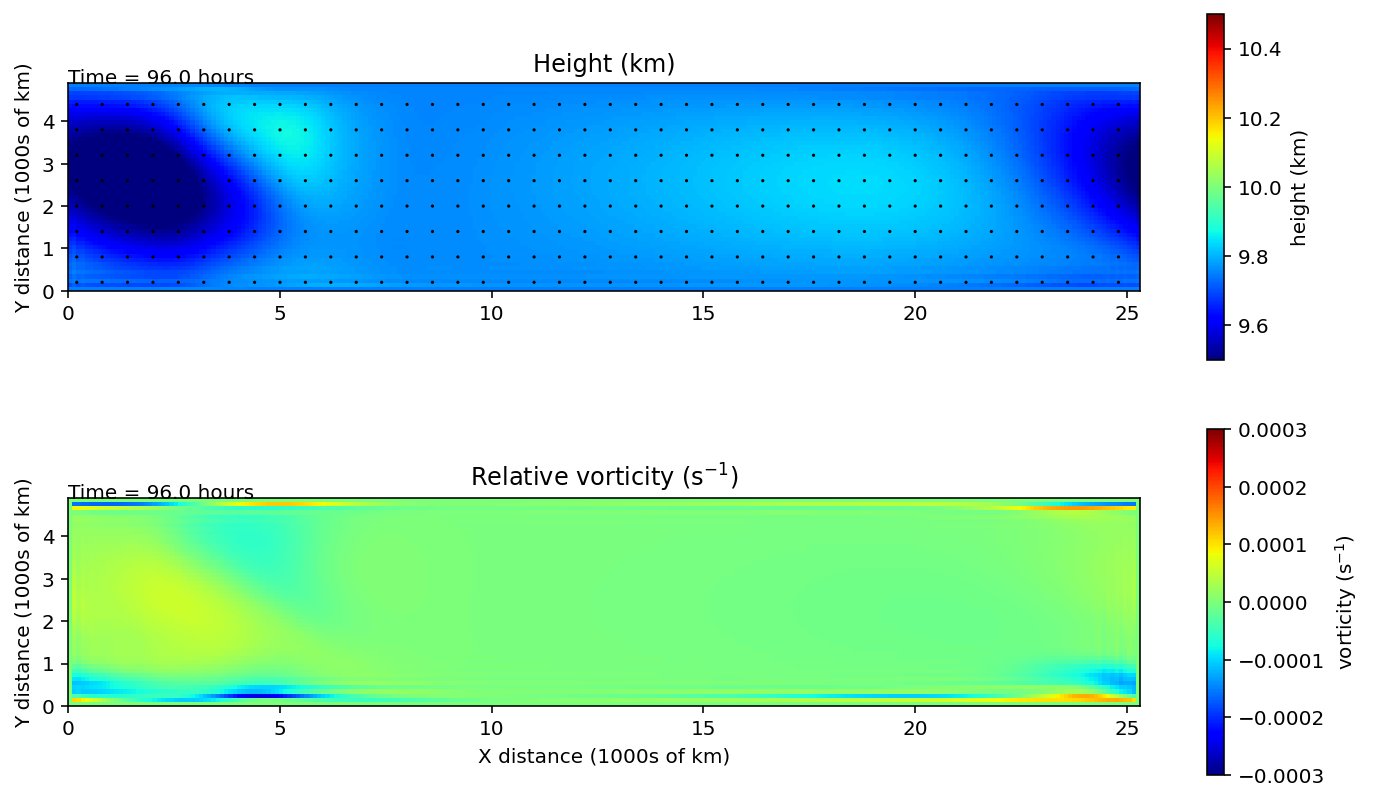

In [51]:
f=plt.figure()
ax1=f.add_subplot(211)
ax2=f.add_subplot(212)

ax1.autoscale(enable=True, axis='y', tight=True)

# Axis units are thousands of kilometers (x and y are in metres)
x_1000km = x * 1.e-6
y_1000km = y * 1.e-6

# Set colormap to have 64 entries
ncol=64;

# Interval between arrows in the velocity vector plot
interval = 6;

# Set this to "True" to save each frame as a png file
plot_frames = True;

# Decide whether to show height in metres or km
if np.mean(plot_height_range) > 1000:
   height_scale = 0.001;
   height_title = 'Height (km)';
else:
   height_scale = 1;
   height_title = 'Height (m)';


print('Maximum orography height = %f m' % np.max(H[:]));
u = np.squeeze(u_save[:,:,0]);
vorticity = np.zeros(np.shape(u));

# Loop through the frames of the animation
for it in range(0,noutput):

   # Extract the height and velocity components for this frame
   h = np.squeeze(h_save[:,:,it]);
   u = np.squeeze(u_save[:,:,it]);
   v = np.squeeze(v_save[:,:,it]);

   # Compute the vorticity
   vorticity[1:-1,1:-1] = (1./dy)*(u[1:-1,0:-2]-u[1:-1,2:]) \
     + (1./dx)*(v[2:,1:-1]-v[0:-2,1:-1]);
   # First plot the height field

   if it==0:

      # Plot the height field
      im=ax1.imshow(np.transpose(h+H)*height_scale, \
        extent=[np.min(x_1000km),np.max(x_1000km),np.min(y_1000km),np.max(y_1000km)], \
        cmap='jet',origin='lower')
      # Set other axes properties and plot a colorbar
      cb1=f.colorbar(im,ax=ax1)
      cb1.set_label('height (km)')
      # Contour the terrain:
      cs=ax1.contour(x_1000km,y_1000km,np.transpose(H),levels=range(1,11001,1000),colors='k')

      # Plot the velocity vectors
      Q = ax1.quiver(x_1000km[2::interval],y_1000km[2::interval], \
         np.transpose(u[2::interval,2::interval]), \
         np.transpose(v[2::interval,2::interval]), scale=5e2,scale_units='xy',pivot='mid')
      ax1.set_ylabel('Y distance (1000s of km)');
      ax1.set_title(height_title);
      tx1=ax1.text(0, np.max(y_1000km), 'Time = %.1f hours' % (t_save[it]/3600.));


      # Now plot the vorticity
      im2=ax2.imshow(np.transpose(vorticity), \
        extent=[np.min(x_1000km),np.max(x_1000km),np.min(y_1000km),np.max(y_1000km)], \
        cmap='jet',origin='lower')
      # Set other axes properties and plot a colorbar
      cb2=f.colorbar(im2,ax=ax2)
      cb2.set_label('vorticity (s$^{-1}$)')
      ax2.set_xlabel('X distance (1000s of km)');
      ax2.set_ylabel('Y distance (1000s of km)');
      ax2.set_title('Relative vorticity (s$^{-1}$)');
      tx2=ax2.text(0, np.max(y_1000km), 'Time = %.1f hours' % (t_save[it]/3600.));

   else:
      # top plot:
      im.set_data(np.transpose(H+h)*height_scale)
      cs.set_array(np.transpose(h))
      Q.set_UVC(np.transpose(u[2::interval,2::interval]), \
             np.transpose(v[2::interval,2::interval]))
      tx1.set_text('Time = %.1f hours' % (t_save[it]/3600.));

      # bottom plot:
      im2.set_data(np.transpose(vorticity))
      tx2.set_text('Time = %.1f hours' % (t_save[it]/3600.));
   
   im.set_clim((plot_height_range*height_scale));
   im2.set_clim((-3e-4,3e-4));
   ax1.axis((0., np.max(x_1000km), 0., np.max(y_1000km)));
   ax2.axis((0., np.max(x_1000km), 0., np.max(y_1000km)));

   # To make an animation we can save the frames as a sequence of images
   if plot_frames:
    plt.savefig('frame%03d.png' % it,format='png') 


In [52]:
# animation function. This is called sequentially
# i is the number of the frame, which leads to one full "circle"
def animate(i):
    dt = dt_mins*60.0; # Timestep (s)
    output_interval = output_interval_mins*60.0; # Time between outputs (s)
    forecast_length = forecast_length_days*24.0*3600.0; # Forecast length (s)
    nt = int(np.fix(forecast_length/dt)+1); # Number of timesteps
    timesteps_between_outputs = np.fix(output_interval/dt);
    noutput = int(np.ceil(nt/timesteps_between_outputs)); # Number of output frames
    
    x=np.mgrid[0:nx]*dx; # Zonal distance coordinate (m)
    y=np.mgrid[0:ny]*dy; # Meridional distance coordinate (m)
    [Y,X] = np.meshgrid(y,x); # Create matrices of the coordinate variables
    plot_height_range = np.array([9500., 10500.]);
    return plt.show()

In [53]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# call the animator. blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(f, animate, init_func=init, frames=20, repeat = False)

In [54]:
anim

# this doesn't need this rc('animation', html='html5') parameter setting
HTML(anim.to_html5_video())

#### Gravity Waves

The following changes were made to the parameters:
• orography = FLAT

• initial conditions = GAUSSIAN BLOB

• initially geostrophic = false

In [3]:
from IPython.display import Video

Video("gravity.mp4")

#### Orographic Rossby waves

The following changes were made to the parameters:

• orography = GAUSSIAN MOUNTAIN

• initial conditions = UNIFORM WESTERLY

• initially geostrophic = true

In [5]:
from IPython.display import Video

Video("orographic.mp4")

Re-running the simulation with $\beta=0$. The simulation ends abruptly and the waves are not prpagated from one end of the basin to the other.

In [4]:
from IPython.display import Video

Video("orographic_0.mp4")

# 7. Stommel's model 

In this practical, I illustrate the steps in solving the Stommel model.

The Stommel model comprises two well mixed boxes (1 of high-latitude; 2: low-latitude) of equal volume, each characterized by its own uniform temperature $T_i$ and salinity $S_i$ (Fig. 2).

#### Characterising the temperature-density and salinity-density relationship
The density of ocean water can be approximated via its linear dependencies on temperature and salinity:
$\rho = \rho_0 − \alpha(T − T_0) + \beta(S − S_0)$

We can show the linear relationship of salinity and temperature with density in simple plots:

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
rho0=1027 #kg/m3
alpha=2e-4 #K-1
beta=2e-4 #psu-1
T0=20 #Celsius, reference temperature
S0=35 #Reference salinity

# For a change in temperature
S=35
T=np.linspace(0, 35, 101)

rho=rho0 - alpha*(T-T0)+ beta*(S-S0)

# Plot
plt.plot(T,rho*1e3)
plt.xlabel('Temperature ($^\circ C$)')
plt.ylabel('Density ($10^3$ kg/m$^3$)')
plt.title('Density against temperature')

In [0]:
# For a change in salinity
T=20
S=np.linspace(32, 38, 101)

rho=rho0 - alpha*(T-T0)+ beta*(S-S0)

# Plot
plt.plot(S,rho*1e3)
plt.xlabel('Salinity')
plt.ylabel('Density ($10^3$ kg/m$^3$)')
plt.title('Density against salinity')

Temperature has a negative linear relationship with density. Therefore, an increase in temperature results in a proportional decrease in density, and vice versa.

Salinity has a positive linear relationship with density, whereby and increase in salinity results in a proportional increase in density.

#### Introducing flow strength, q

The flow strength, q, between the boxes can be related to the density difference by a linear law. It is given by

$q = k(\rho_1 − \rho_2)$

$= k(\alpha(T_2 − T_1) − \beta(S_2 − S_1))$

$= k(\alpha\Delta T − \beta\Delta S)$

where k is a hydraulic constant.

In [0]:
k=5e9
T2=25
S2=35

T1=np.linspace(-2, 25, 101)
S1=np.linspace(32, 38, 101)

dT=T2-T1
dS=S2-S1

qt=k*((alpha*dT) - (beta*0))
qs=k*((alpha*0) - (beta*dS))

plt.plot(dT,qt/1e6)
plt.plot(dS,qs/1e6)
plt.xlabel('Change')
plt.ylabel('Flow strength ($10^{-6}$s$^{-1}$)')
plt.legend(['dT','dS'])

If $q>0$, there is poleward surface flow, this means that the high latitude density is greater than the low latitude density. When $q>0$, the temperature difference dominates the density difference, driving the circulation. In this case, the salinity difference works as a buffer to reduce the circulation.

If $q<0$, the reverse would be true. However, since the temperature differences on the ocean surface layer between high and low latitudes tend to be much larger in magnitude to salinity, the temperature difference remains a driving factor, resulting in $q>0$ and thus poleward surface flow.

#### Steady state solutions for temperature

We assume that the temperatures of the boxes relax to reference temperatures imposed by the atmosphere, with
a timescale $\gamma^{-1}$, and that $H > 0$ is the salinity flux out of the high latitude box. The conservation equations governing the system can thus be written as:

$\dfrac{dT_1}{dt}=−\vert q\vert \Delta T + \gamma(\overline{T_1} − T_1)$

$\dfrac{dT_2}{dt}=\vert q\vert \Delta T + \gamma(\overline{T_2} − T_2)$

$\dfrac{dS_1}{dt}=\vert q\vert \Delta S - H$

$\dfrac{dS_2}{dt}=−\vert q\vert \Delta S + H$

We assume that the temperature relaxation time-scale $\gamma^{−1} \ll \vert q\vert ^{-1}$. This is equivalent to assuming that the temperature relaxation time scale is fast compared to the time scale of the overturning circulation. If we also assume that in a plausible limiting case the surface freshwater exchange (expressed through an equivalent surface salinity flux H) is imposed by the atmosphere. The conservation equations governing the system then are only those for salinity:

$\dfrac{dS_2}{dt}-\dfrac{dS_1}{dt}=\dfrac{d\Delta S}{dt}=-2\vert q\vert \Delta S +2H$

The time evolution of the circulation q is goverened by:
$\dfrac{dq}{dt}=-k\beta \dfrac{d\Delta S}{dt}$


Substitute eq. 9 in eq. (10) and use ∆S = (−q + kα∆T)/(kβ). Show that the resulting steady state solutions of
the equation are:

$q_{1/2}=\dfrac{k\alpha \Delta \overline{T}}{2}\pm\sqrt{\left(\dfrac{k\alpha\Delta \overline{T}}{2}\right)^2 - Hk\beta}$         for $q>0$

$q_{3/4}=\dfrac{k\alpha \Delta \overline{T}}{2}\pm\sqrt{\left(\dfrac{k\alpha\Delta \overline{T}}{2}\right)^2 + Hk\beta}$         for $q<0$

The solution $q_3$ is discarded, because it contradicts the assumption that $q < 0$. Further it can be readily shown that solution $q_2$ is unstable. This simplest possible model of the THC has two stable equilibria, with sinking either at high ($q_1 > 0$, thermally dominated, poleward near-surface flow) or at low latitudes ($q_4 < 0$, salinity dominated, equatorward near-surface flow).

#### Plotting $q_1$, $q_2$ and $q_4$ solutions

Assuming that $\Delta \overline{T}$ is given, the solutions for q depend on the value of the salinity flux, H only. Here, we plot the $q_1$, $q_2$ and $q_4$ solutions for $H>0$.

In [0]:
# q1
To=20.0 # to represent delta T-overline
k=5e9
alpha=2e-4
beta=2e-4
gamma=8e-4
S0=35.0

H=np.linspace(0, 1e8, 101) #kg m-2 s-1

q1 = (k*alpha*To*0.5)+np.sqrt((k*alpha*To*0.5)**2 - k*beta*H)

In [0]:
# q2

q2 = (k*alpha*To*0.5)-np.sqrt((k*alpha*To*0.5)**2 - H*k*beta)

In [0]:
plt.plot(H/1e6,q1/1e6)
plt.plot(H/1e6,q2/1e6)
plt.xlabel('H [$10^6$ kg m$^{-2}$ s$^{-1}$]')
plt.ylabel('q [s$^{-1}$]')
plt.title('Solutions $q_1$ and $q_2$ against salinity flux (H)')
plt.legend(['$q_1$','$q_2$'])

In [0]:
# first value where sqrt becomes complex
H=np.linspace(0, 2e8, 101) #kg m-2 s-1
H[k*beta*H > (k*alpha*To*0.5)**2][0]

As shown above, the critical value of H where $q_1=q_2$, known as the bifurcation point, occurs at $H=10^8$.

Beyond the bifurcation point, the expression in the square root becomes negative and therefore does not compute.

In [0]:
# q4

q4 = (k*alpha*To*0.5)-np.sqrt((k*alpha*To*0.5)**2 + H*k*beta)

In [0]:
plt.plot(H/1e6,q4/1e6)
plt.xlabel('H [$10^6$ kg m$^{-2}$ s$^{-1}$]')
plt.ylabel('q [s$^{-1}$]')
plt.title('Solution $q_4$ against salinity flux (H)')

In [0]:
rho=1020.0
cp=3993
plt.plot(H/1e6,rho*cp*q1*T)
plt.xlabel('H [$10^6$ kg m$^{-2}$ s$^{-1}$]')
plt.ylabel('Heat flux  by $q_1$ [$J.s^{-1}$]')
plt.title('Heat flux by $q_1$ against salinity flux')

In [0]:
hv = 2.26e6
plt.plot(E/1e6,rho*hv*E)
plt.xlabel('E [Sv]')
plt.ylabel('Heat flux  by $E$ [$J.s^{-1}$]')
plt.title('Heat flux by E against E')